# UKRN Open and Transparent Research Practices (OTRP) Survey Analysis Script: UKRN-wide Data (anonymised)

**AUTHOR**

Dr Lukas Hughes-Noehrer, Department of Computer Science, University of Manchester

## About

Welcome to the UKRN OTRP Survey analysis notebook!

We assume that you found this notebook in our GitHub repo and you are familiar with what this is all about and the necessary requirements to run this notebook written in Python! No? Please have a look at: https://github.com/LukasNoe/ukrn_otrp or run the binderised version here: https://mybinder.org/v2/gh/LukasNoe/ukrn_otrp/HEAD

This notebook can be used to analyse various data collected through the first run of the OTRP survey between December 2022 and April 2023. To get the relevant data and any other study-related info, please head to our Figshare repository and pull the dataset(s) you want to use: https://doi.org/10.48420/22094216.v3

Feel free to use our code for whatever reasons you like and you deem it useful for, unless it's illegal or discriminatory. Always respect the **GNU General Public License v3.0** this notebook and everything else related to it is released under.




In [1]:
%%capture
#Import libraries necessary to run this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%capture
#Read the relevant csv file
df = pd.read_csv('ukrn_otrp_survey_data.csv')


#Inspect the csv
shape = df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])

#Print the first 5 rows of df
print(df.head())

In [3]:
#%%capture
df = df.drop(index=[0, 1]).reset_index(drop=True)
df.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,ResponseId,RecipientLastName,DistributionChannel,UserLanguage,...,Q14.7_8_TEXT,Q14.8,Q14.9,Q14.10,Q14.11,Q14.12,Q14.13,Q15_1,Q16,Q16_11_TEXT
0,20/01/2023 16:36,20/01/2023 21:08,IP Address,9,16310,FALSE,R_3Ny5xNQQFtX0QVf,NaN,anonymous,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03/02/2023 09:13,03/02/2023 09:43,IP Address,100,1797,TRUE,R_xF8UHYZFnqSbeCd,NaN,anonymous,EN,...,NaN,No,NaN,Monitoring and compliance,I do not know,NaN,always done,6,Lack of time,NaN
2,29/01/2023 11:35,29/01/2023 12:01,IP Address,14,1561,FALSE,R_u1FBewhzW3SiK1r,NaN,anonymous,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03/02/2023 11:06,03/02/2023 11:25,IP Address,24,1145,FALSE,R_3oHh8b5hwJUlW0E,NaN,anonymous,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,03/02/2023 11:36,03/02/2023 11:39,IP Address,16,167,FALSE,R_12GaCkG8zIHqDOW,NaN,anonymous,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Drop all test and none consented rows
df = df[df['Consent'] == 'Yes']

In [5]:
#Calculate number of responses
responses = (df.shape[0])
print((responses), 'have responded')

2567 have responded


In [6]:
#Print the number of complete responses
print((sum(df['Progress'] == '100')), 'have completed the survey')

511 have completed the survey


## Demographics

### Demographics_2: Duration of employment 

In [7]:
#Count all answers and list them descending
'N=' + (df['Q2'].value_counts(sort=True)).astype(str)

under 2 years    N=774
over 10 years    N=703
2 - 5 years      N=624
5 - 10 years     N=466
Name: Q2, dtype: object

In [8]:
#Normalise the count to represent answers in percent
(df['Q2'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

under 2 years    30.15%
over 10 years    27.39%
2 - 5 years      24.31%
5 - 10 years     18.15%
Name: Q2, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

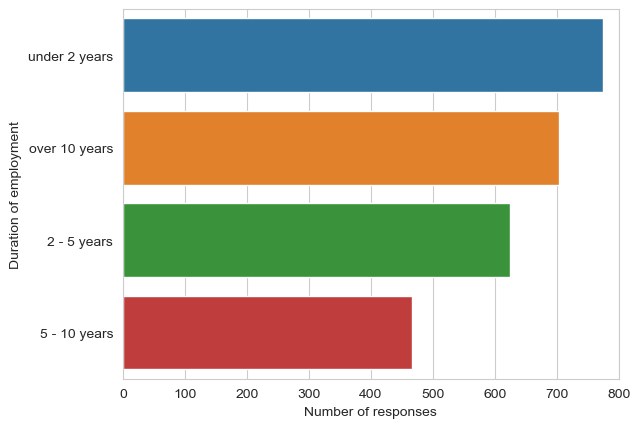

In [9]:
#Plot question two as a bar plot
sns.set_style('whitegrid')

countplot = sns.countplot(data=df, y="Q2", order = df['Q2'].value_counts().index)
#countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, ha="right")
countplot.set(xlabel="Number of responses", ylabel="Duration of employment")

#plt.show()
plt.xlim(0, 800)
plt.show
#plt.savefig('../data/plots_test/duration_employment.png', bbox_inches='tight', dpi = 300)

In [10]:
#Display how many particpants haven't given an answer
count = df["Q2"].isna().sum()
print(count, "participants have not answered.")

0 participants have not answered.


### Demographics_3: Research discipline

In [11]:
#Count all answers and list them descending
'N=' + (df['Q3'].value_counts(sort=True)).astype(str)

(CAH02) Subjects allied to medicine (e.g., nursing, pharmacology, health sciences)    N=291
(CAH03) Biological and sport sciences                                                 N=256
(CAH10)Engineering and technology                                                     N=253
(CAH15) Social sciences                                                               N=252
(CAH04) Psychology                                                                    N=215
(CAH01) Medicine and dentistry                                                        N=193
(CAH07) Physical sciences                                                             N=151
(CAH11) Computing                                                                      N=93
(CAH17) Business and management                                                        N=79
(CAH22) Education and teaching                                                         N=79
(CAH20) Historical, philosophical, and religious studies                        

In [12]:
#Normalise the count to represent answers in percent
(df['Q3'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

(CAH02) Subjects allied to medicine (e.g., nursing, pharmacology, health sciences)    12.72%
(CAH03) Biological and sport sciences                                                 11.19%
(CAH10)Engineering and technology                                                     11.06%
(CAH15) Social sciences                                                               11.02%
(CAH04) Psychology                                                                      9.4%
(CAH01) Medicine and dentistry                                                         8.44%
(CAH07) Physical sciences                                                               6.6%
(CAH11) Computing                                                                      4.07%
(CAH17) Business and management                                                        3.45%
(CAH22) Education and teaching                                                         3.45%
(CAH20) Historical, philosophical, and religious studies              

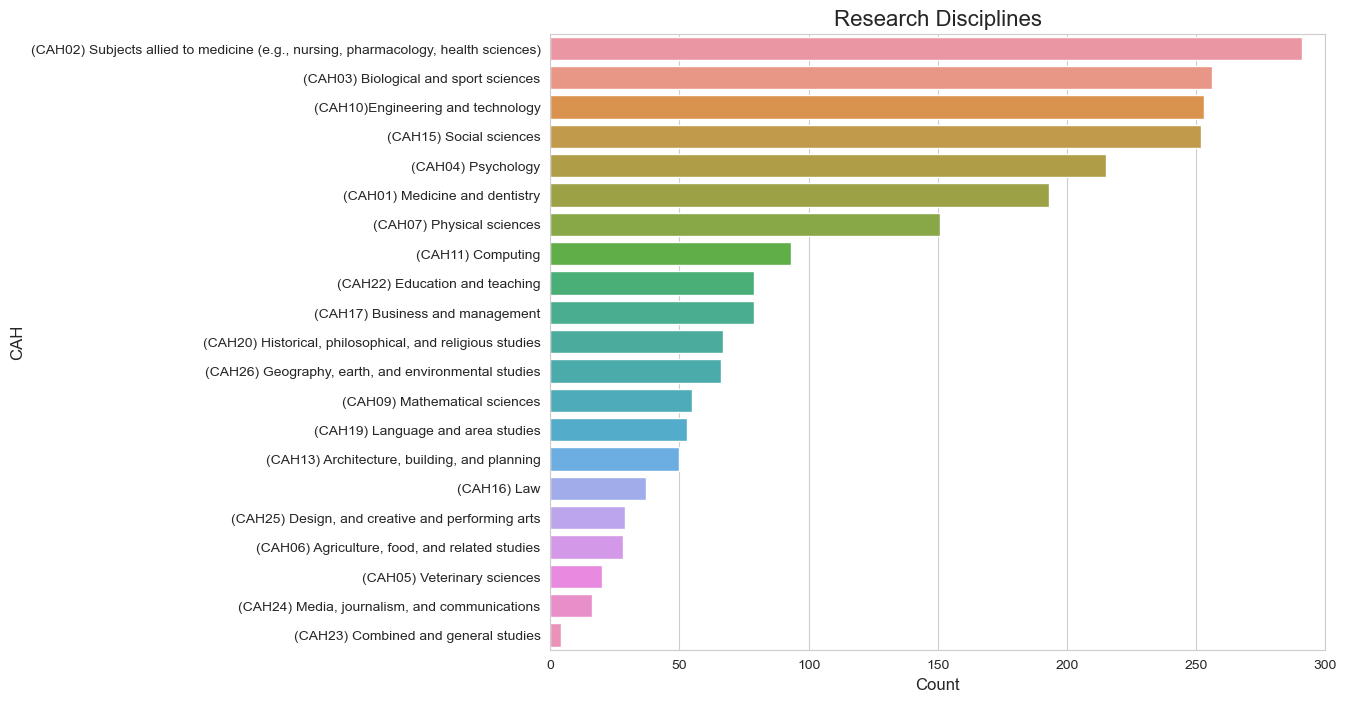

In [586]:
#Plot question three as a pie chart
# Group the data by a categorical column
# Group the data by the column
grouped_data = df.groupby('Q3').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q3', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('CAH', fontsize=12)
plt.title('Research Disciplines', fontsize=16)

# Show the chart
plt.xlim(0, 300)
plt.show()
#Save the plot
#plt.savefig('../data/plots_test/research_discipline.png', bbox_inches='tight', dpi = 300)

In [14]:
#Display how many particpants haven't given an answer
count = df["Q3"].isna().sum()
print(count, "participants have not answered.")

280 participants have not answered.


### Demographics_4: Job role

In [15]:
#Count all answers and list them descending
'N=' + (df['Q4'].value_counts(sort=True)).astype(str)

Professor                                                                    N=189
Lecturer                                                                     N=153
Research Fellow                                                              N=114
PhD student                                                                  N=101
Senior Lecturer                                                               N=86
                                                                             ...  
Professor of Hepatology                                                        N=1
Questions like this make me worry about my privacy and confidentiality...      N=1
Professor of Cell Biology                                                      N=1
Researcher and teacher/Associate Professor                                     N=1
trainee clinical psychologist                                                  N=1
Name: Q4, Length: 827, dtype: object

In [16]:
#Normalise the count to represent answers in percent
(df['Q4'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Professor                                                                    8.02%
Lecturer                                                                     6.49%
Research Fellow                                                              4.83%
PhD student                                                                  4.28%
Senior Lecturer                                                              3.65%
                                                                             ...  
Professor of Hepatology                                                      0.04%
Questions like this make me worry about my privacy and confidentiality...    0.04%
Professor of Cell Biology                                                    0.04%
Researcher and teacher/Associate Professor                                   0.04%
trainee clinical psychologist                                                0.04%
Name: Q4, Length: 827, dtype: object

In [17]:
#Display how many particpants haven't given an answer
count = df["Q4"].isna().sum()
print(count, "participants have not answered.")

209 participants have not answered.


### Demographics_5: Current career stage

In [18]:
#Count all answers and list them descending
'N=' + (df['Q5'].value_counts(sort=True)).astype(str)

Phase 2: Early (e.g., Research Associate, first grant holder, Lecturer)                N=731
Phase 1: Junior (e.g., PhD candidate, Research Assistant)                              N=648
Phase 3: Mid/Recognised (e.g., Senior Lecturer, Reader, Senior Researcher)             N=459
Phase 4: Established/Experienced (e.g., Professor, Principal Fellows or Scientists)    N=449
Name: Q5, dtype: object

In [19]:
#Normalise the count to represent answers in percent
(df['Q5'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Phase 2: Early (e.g., Research Associate, first grant holder, Lecturer)                31.96%
Phase 1: Junior (e.g., PhD candidate, Research Assistant)                              28.33%
Phase 3: Mid/Recognised (e.g., Senior Lecturer, Reader, Senior Researcher)             20.07%
Phase 4: Established/Experienced (e.g., Professor, Principal Fellows or Scientists)    19.63%
Name: Q5, dtype: object

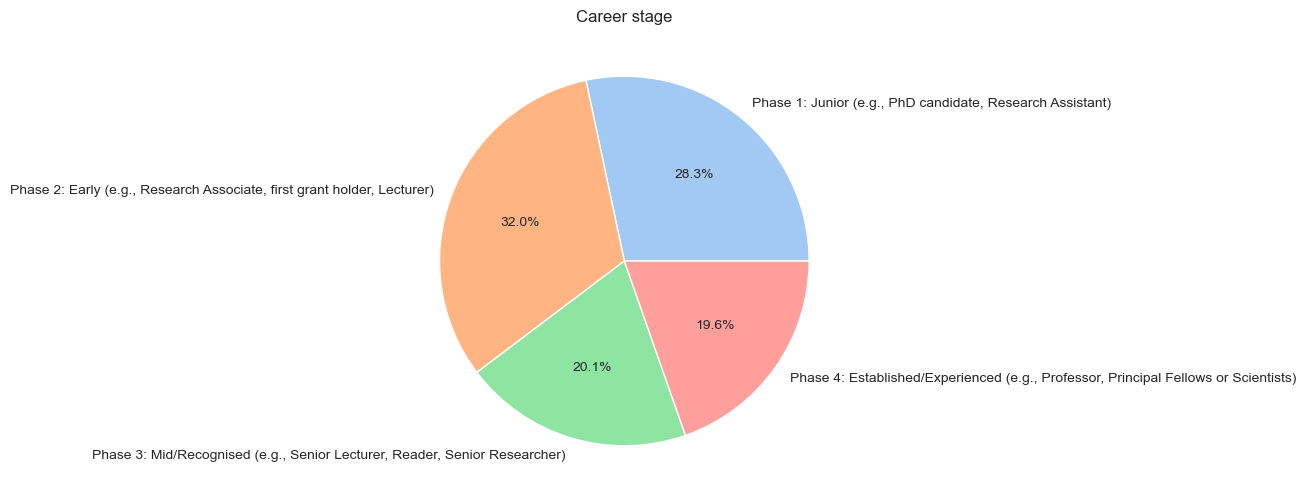

In [20]:
# Group the data by the column
grouped_data = df.groupby('Q5').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q5'], autopct='%1.1f%%')

# Add a title
plt.title('Career stage')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/career_stage.png', bbox_inches='tight', dpi = 300, transparent=True)

In [21]:
#Display how many particpants haven't given an answer
count = df["Q5"].isna().sum()
print(count, "participants have not answered.")

280 participants have not answered.


### Demographics_6: Research methods

In [22]:
#Count all answers and list them descending
df['Q6'].value_counts(sort=True)

Quantitative    1025
Mixed            852
Qualitative      467
Other:            64
Name: Q6, dtype: int64

In [23]:
#Display the text answers in "Other:"
df['Q6_4_TEXT'].value_counts(sort=True)

Theoretical                                                                                                                                                             2
Philosophical                                                                                                                                                           2
I dont currently do much research                                                                                                                                       1
proofs give an absolute truth                                                                                                                                           1
historical/archival                                                                                                                                                     1
Mathematics                                                                                                                                           

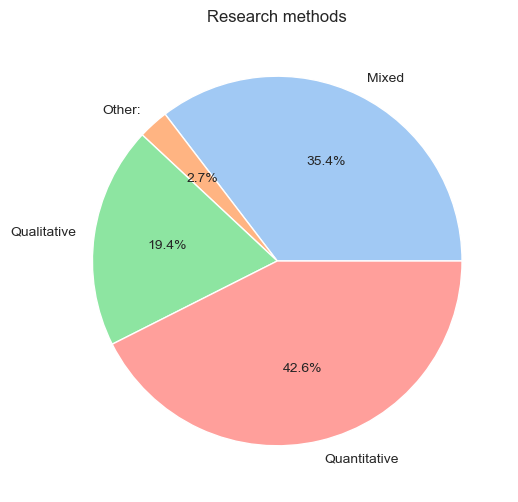

In [24]:
#Plot research methods

# Group the data by the column
grouped_data = df.groupby('Q6').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q6'], autopct='%1.1f%%')

# Add a title
plt.title('Research methods')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/methods.png', bbox_inches='tight', dpi = 300, transparent=True)

In [25]:
#Display how many particpants haven't given an answer
count = df["Q6"].isna().sum()
print(count, "participants have not answered.")

159 participants have not answered.


### Demographics_7: Gender

In [26]:
#Count all answers and list them descending
df['Q7'].value_counts(sort=True)

Woman                       1204
Man                         1064
Prefer to not disclose        84
Non-binary                    27
Prefer to self-describe:      20
Name: Q7, dtype: int64

In [27]:
#Display gender in percentages
(df['Q7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Woman                       50.19%
Man                         44.35%
Prefer to not disclose        3.5%
Non-binary                   1.13%
Prefer to self-describe:     0.83%
Name: Q7, dtype: object

In [28]:
#Display the answers of those who prefer to self-describe
df['Q7_5_TEXT'].value_counts(sort=True)

I don’t “identify” as a gender, but I am a man (and this is a silly question; and trans women are MEN).     1
none                                                                                                        1
Female - woman is not a gender                                                                              1
Attack chopper                                                                                              1
Animal and plants                                                                                           1
this question should be about sex                                                                           1
Queer                                                                                                       1
agender                                                                                                     1
I find this question troubling. I don't "identify" with a gender. I am female.                              1
I identify

In [29]:
#Display how many particpants haven't given an answer
count = df["Q7"].isna().sum()
print(count, "participants have not answered.")

168 participants have not answered.


### Demographics_8: Ethnic group

In [30]:
#Count all answers and list them descending
df['Q8'].value_counts(sort=True)

White                                         1821
Asian or Asian-British                         297
Other ethnic group                             141
Mixed or multiple ethnic groups                 88
Black, Black-British, Caribbean or African      52
Name: Q8, dtype: int64

In [31]:
#Display ethnic groups in pecentages
(df['Q8'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

White                                         75.91%
Asian or Asian-British                        12.38%
Other ethnic group                             5.88%
Mixed or multiple ethnic groups                3.67%
Black, Black-British, Caribbean or African     2.17%
Name: Q8, dtype: object

In [32]:
#Display how many particpants haven't given an answer
count = df["Q8"].isna().sum()
print(count, "participants have not answered.")

168 participants have not answered.


# MAIN PART QUESTIONNAIRE

## 1. Research Co-production

### Q1.1 Research co-production is something I think has a [low, medium, high] priority in my field of research:

In [33]:
#Count all answers and list them descending
df['Q1.1'].value_counts(sort=True)

High                      804
Medium                    734
Low                       518
I am not aware of this    230
Name: Q1.1, dtype: int64

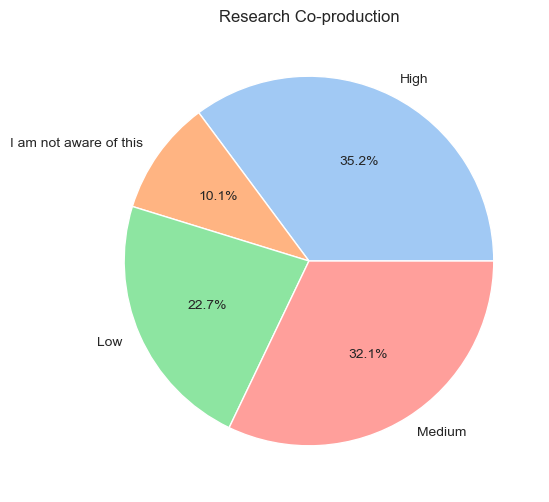

In [34]:
# Group the data by the column
grouped_data = df.groupby('Q1.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q1.1'], autopct='%1.1f%%')

# Add a title
plt.title('Research Co-production')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/coproduction.png', bbox_inches='tight', dpi = 300, transparent=True)

In [35]:
#Display how many particpants haven't given an answer
count = df["Q1.1"].isna().sum()
print(count, "participants have not answered.")

281 participants have not answered.


### Q1.2 I do this type of activity in my field of research (0 - Never to 6 - Very often):

In [36]:
print(df['Q1.2_1'].dtype)

object


In [37]:
df['Q1.2_1'] = pd.to_numeric(df['Q1.2_1'], errors='coerce').astype('Int64')

In [38]:
#Count all answers and list them
likert_data = df['Q1.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    491
1    398
2    265
3    302
4    334
5    254
6    242
Name: Q1.2_1, dtype: Int64


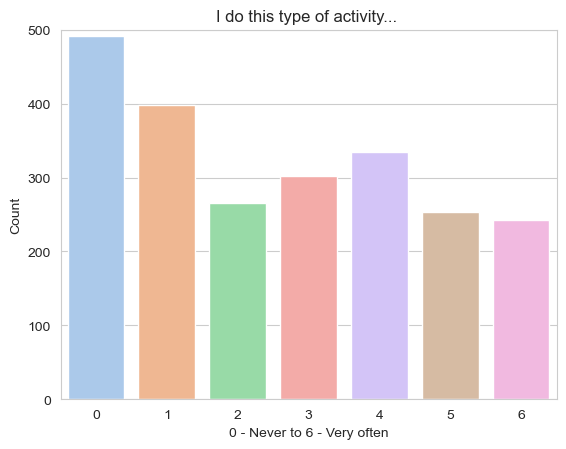

In [39]:
likert_data = df['Q1.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 500)
plt.show()

#plt.savefig('../data/plots_test/coprod_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [40]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode()

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.57742782152231
Median: 2.0
Mode: 0    0
Name: Q1.2_1, dtype: Int64
Standard Deviation: 2.0277932379839347
Interquartile Range: 3


In [41]:
#Display how many particpants haven't given an answer
count = df["Q1.2_1"].isna().sum()
print(count, "participants have not answered.")

281 participants have not answered.


### Q1.3 For me, training in this topic is:

In [42]:
print(df['Q1.3_1'].dtype)

object


In [43]:
df['Q1.3_1'] = pd.to_numeric(df['Q1.3_1'], errors='coerce').astype('Int64')

In [44]:
#Count all answers and list them
likert_data = df['Q1.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    281
1    248
2    220
3    361
4    390
5    372
6    413
Name: Q1.3_1, dtype: Int64


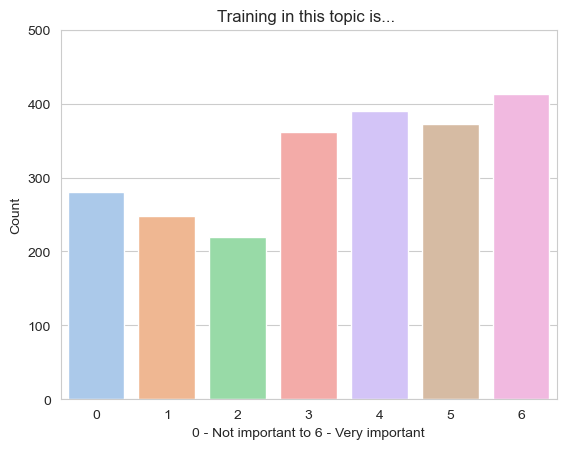

In [45]:
likert_data = df['Q1.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 500)
plt.show()
#plt.savefig('../data/plots_test/coprod_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [46]:
###### calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.3562363238512036
Median: 4.0
Mode: 6
Standard Deviation: 1.9901270797397903
Interquartile Range: 3


In [47]:
#Display how many particpants haven't given an answer
count = df["Q1.3_1"].isna().sum()
print(count, "participants have not answered.")

282 participants have not answered.


### Q1.4 I have looked for training and support in this topic at my institution:

In [48]:
#Count all answers and list them descending
df['Q1.4'].value_counts(sort=True)

No                    1622
Yes                    517
Yes, but not found     147
Name: Q1.4, dtype: int64

In [49]:
#Display how many particpants haven't given an answer
count = df["Q1.4"].isna().sum()
print(count, "participants have not answered.")

281 participants have not answered.


### Q1.5 (if Q1.4 was yes) Training at my institution is:

In [50]:
#Show type of df column
print(df['Q1.5_1'].dtype)

object


In [51]:
df['Q1.5_1'] = pd.to_numeric(df['Q1.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q1.5_1']

In [52]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.242424242424242
Median: 4.0
Mode: 4
Standard Deviation: 1.2931057678265536
Interquartile Range: 2


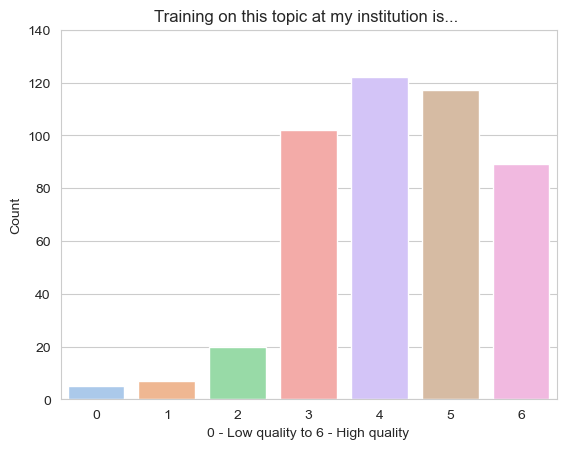

In [53]:
likert_data = df['Q1.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 140)
plt.show()
#plt.savefig('../data/plots_test/coprod_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [54]:
#Display how many particpants haven't given an answer
count = df["Q1.5_1"].isna().sum()
print(count, "participants have not answered.")

2105 participants have not answered.


### Q1.6 Training in this topic at my institution:

In [55]:
#Count all answers and list them descending
'N=' + (df['Q1.6'].value_counts(sort=True)).astype(str)

At the right level                                    N=124
Infrequent                                            N=111
Frequent,At the right level                            N=69
Frequent                                               N=56
Infrequent,At the right level                          N=43
At too basic a level                                   N=26
Infrequent,At too basic a level                        N=17
At too complex a level                                 N=10
Frequent,At too basic a level                           N=7
Infrequent,At too complex a level                       N=2
Frequent,At too complex a level                         N=2
Frequent,Infrequent                                     N=2
Frequent,At too complex a level,At the right level      N=1
At too complex a level,At the right level               N=1
Infrequent,At the right level,At too basic a level      N=1
Name: Q1.6, dtype: object

In [56]:
#Normalise the count to represent answers in percent
(df['Q1.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                                    26.27%
Infrequent                                            23.52%
Frequent,At the right level                           14.62%
Frequent                                              11.86%
Infrequent,At the right level                          9.11%
At too basic a level                                   5.51%
Infrequent,At too basic a level                         3.6%
At too complex a level                                 2.12%
Frequent,At too basic a level                          1.48%
Infrequent,At too complex a level                      0.42%
Frequent,At too complex a level                        0.42%
Frequent,Infrequent                                    0.42%
Frequent,At too complex a level,At the right level     0.21%
At too complex a level,At the right level              0.21%
Infrequent,At the right level,At too basic a level     0.21%
Name: Q1.6, dtype: object

In [57]:
#Display how many particpants haven't given an answer
count = df["Q1.6"].isna().sum()
print(count, "participants have not answered.")

2095 participants have not answered.


### Q1.7 The help at my institution on this topic is mainly:

In [58]:
#Count all answers and list them descending
'N=' + (df['Q1.7'].value_counts(sort=True)).astype(str)

Good                                                  N=136
Available                                              N=73
At the right level                                     N=51
Good,At the right level,Available                      N=34
I do not know                                          N=31
Good,Available                                         N=25
Hard to access                                         N=23
Too basic                                              N=19
Good,At the right level                                N=13
Non-existent                                           N=11
At the right level,Available                           N=11
Other. Please explain:                                  N=9
Too basic,Hard to access                                N=6
Good,Hard to access                                     N=5
Non-existent,Hard to access                             N=3
Good,Other. Please explain:                             N=3
At the right level,Hard to access       

In [59]:
#Normalise the count to represent answers in percent
(df['Q1.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                  28.57%
Available                                             15.34%
At the right level                                    10.71%
Good,At the right level,Available                      7.14%
I do not know                                          6.51%
Good,Available                                         5.25%
Hard to access                                         4.83%
Too basic                                              3.99%
Good,At the right level                                2.73%
Non-existent                                           2.31%
At the right level,Available                           2.31%
Other. Please explain:                                 1.89%
Too basic,Hard to access                               1.26%
Good,Hard to access                                    1.05%
Non-existent,Hard to access                            0.63%
Good,Other. Please explain:                            0.63%
At the right level,Hard 

In [60]:
#Display how many particpants haven't given an answer
count = df["Q1.7"].isna().sum()
print(count, "participants have not answered.")

2091 participants have not answered.


### Q1.7_TEXT

In [61]:
#Count all answers and list them descending
df['Q1.7_8_TEXT'].value_counts(sort=True)

Something I've delivered                                                                                                                                                                                                                                                                                                                                                                                                                                                                 1
Variable in quality - some very good, some disappointing                                                                                                                                                                                                                                                                                                                                                                                                                                 1
Some available, certainly not non-existent, but no

### Q1.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [62]:
#Count all answers and list them descending
df['Q1.8'].value_counts(sort=True)

No     1840
Yes     394
Name: Q1.8, dtype: int64

### Q1.9 Where have you looked for training and support?

In [63]:
#Count all answers and list them descending
df['Q1.9'].value_counts(sort=True)

NIHR                                                                               12
Online                                                                              9
NCRM                                                                                5
online                                                                              4
NIHR                                                                                3
                                                                                   ..
Google. McPin foundation                                                            1
Training on subject background, computing methods, programming languages, etc.      1
Timberlake consultants                                                              1
BRC / NHLI                                                                          1
Cupid cost European alliance                                                        1
Name: Q1.9, Length: 287, dtype: int64

### Q1.10 My institution takes mainly the following approach to this topic:

In [64]:
#Count all answers and list them descending
'N=' + (df['Q1.10'].value_counts(sort=True)).astype(str)

I do not know                N=1184
Passive                       N=295
Recognition and reward        N=244
Monitoring and compliance     N=223
Name: Q1.10, dtype: object

In [65]:
#Normalise the count to represent answers in percent
(df['Q1.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                60.84%
Passive                      15.16%
Recognition and reward       12.54%
Monitoring and compliance    11.46%
Name: Q1.10, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

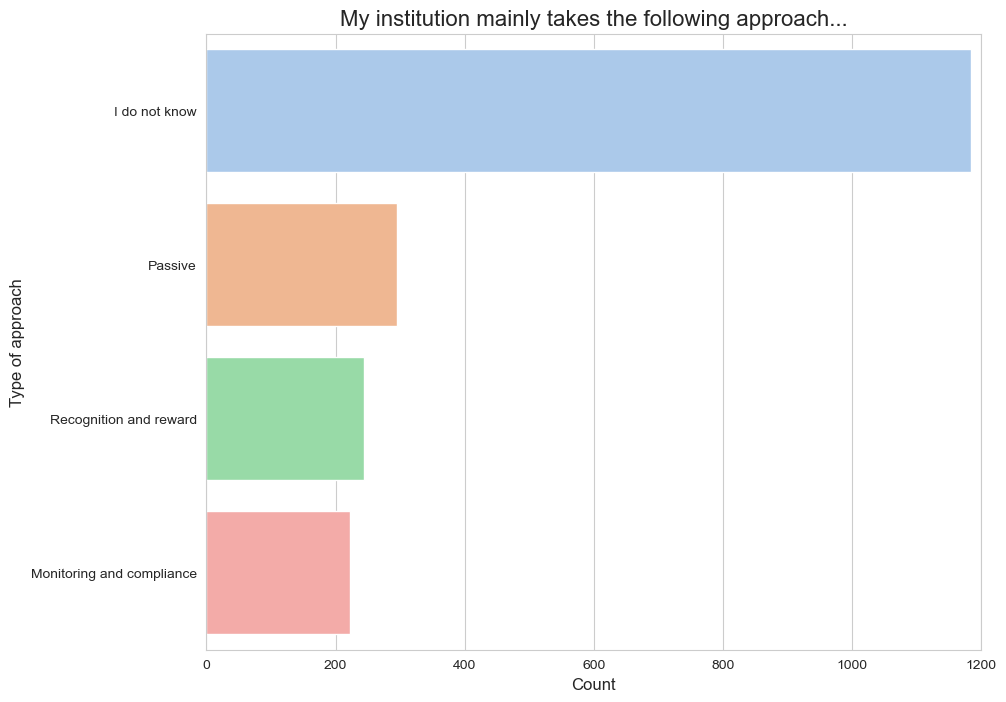

In [66]:
grouped_data = df.groupby('Q1.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q1.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
#plt.show()
#Save the plot
plt.xlim(0, 1200)
plt.show
#plt.savefig('../data/plots_test/coprod_approach.png', bbox_inches='tight', dpi = 300)

In [67]:
#Display how many particpants haven't given an answer
count = df["Q1.10"].isna().sum()
print(count, "participants have not answered.")

621 participants have not answered.


### Q1.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [68]:
#Count all answers and list them descending
'N=' + (df['Q1.11'].value_counts(sort=True)).astype(str)

I do not know    N=1246
Ok                N=394
Not very well     N=166
Very well         N=137
Name: Q1.11, dtype: object

In [69]:
#Display how many particpants haven't given an answer
count = df["Q1.11"].isna().sum()
print(count, "participants have not answered.")

624 participants have not answered.


### Q1.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [70]:
#Count all answers and list them descending
df['Q1.12'].value_counts(sort=True)

None                                                                                                                                                                                                                           53
na                                                                                                                                                                                                                             48
No                                                                                                                                                                                                                             46
-                                                                                                                                                                                                                              43
N/a                                                                                             

### Q1.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [71]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q1.13'].value_counts(sort=True)

no                                                                                              83
No                                                                                              83
None                                                                                            78
-                                                                                               54
na                                                                                              54
                                                                                                ..
A sense that working methods are (very) hard won and therefore become protected                  1
Evolve?                                                                                          1
very important to my field, but hard to find connections, especially in the post covid world     1
Co-production is not an item in our promotions framework.                                        1
not aware 

## 2. OR Legal and Ethical

### Q2.1 Conducting open research consistent with relevant legal, ethical, and regulatory constraints is something I think has a [low, medium, high] priority in my field of research:

In [72]:
#Count all answers and list them descending
df['Q2.1'].value_counts(sort=True)

High                      1224
Medium                     359
Low                        158
I am not aware of this      74
Name: Q2.1, dtype: int64

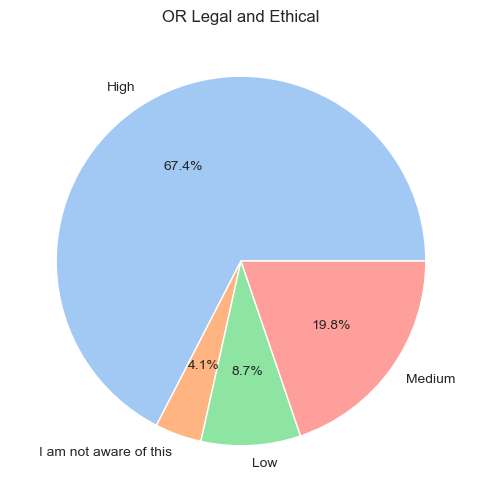

In [73]:
#Plot OR Legal and Ethica

# Group the data by the column
grouped_data = df.groupby('Q2.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q2.1'], autopct='%1.1f%%')

# Add a title
plt.title('OR Legal and Ethical')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/legal.png', bbox_inches='tight', dpi = 300, transparent=True)

In [74]:
#Display how many particpants haven't given an answer
count = df["Q1.1"].isna().sum()
print(count, "participants have not answered.")

281 participants have not answered.


### Q2.2 I do this type of activity in my field of research:

In [75]:
print(df['Q2.2_1'].dtype)

object


In [76]:
df['Q2.2_1'] = pd.to_numeric(df['Q2.2_1'], errors='coerce').astype('Int64')

In [77]:
#Count all answers and list them
likert_data = df['Q2.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    164
1    144
2    116
3    198
4    218
5    313
6    662
Name: Q2.2_1, dtype: Int64


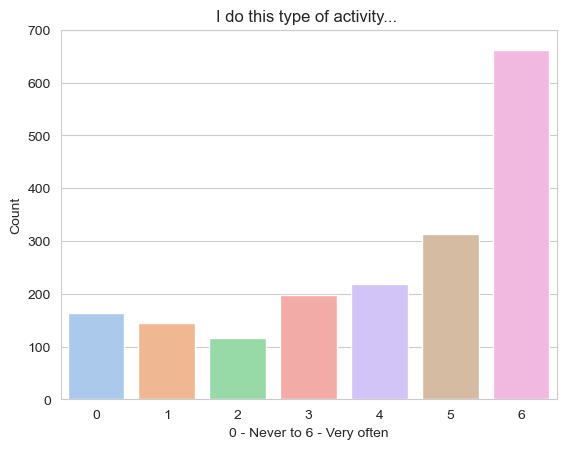

In [78]:
likert_data = df['Q2.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 700)
plt.show()
#plt.savefig('../data/plots_test/legal_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [79]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.065564738292011
Median: 5.0
Mode: 6
Standard Deviation: 2.0381150083568773
Interquartile Range: 3


In [80]:
#Display how many particpants haven't given an answer
count = df["Q2.2_1"].isna().sum()
print(count, "participants have not answered.")

752 participants have not answered.


### Q2.3 For me, training in this topic is:

In [81]:
print(df['Q2.3_1'].dtype)

object


In [82]:
df['Q2.3_1'] = pd.to_numeric(df['Q2.3_1'], errors='coerce').astype('Int64')

In [83]:
#Count all answers and list them
likert_data = df['Q2.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    134
1    120
2     96
3    263
4    256
5    322
6    624
Name: Q2.3_1, dtype: Int64


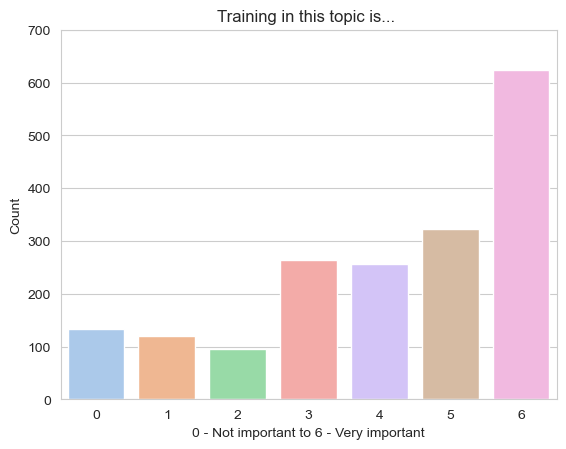

In [84]:
likert_data = df['Q2.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 700)
plt.show()
#plt.savefig('../data/plots_test/legal_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [85]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.120661157024793
Median: 5.0
Mode: 6
Standard Deviation: 1.9164717453495177
Interquartile Range: 3


In [86]:
#Display how many particpants haven't given an answer
count = df["Q2.3_1"].isna().sum()
print(count, "participants have not answered.")

752 participants have not answered.


### Q2.4 I have looked for training and support in this topic at my institution:

In [87]:
#Count all answers and list them descending
'N=' + (df['Q2.4'].value_counts(sort=True)).astype(str)

No                    N=886
Yes                   N=860
Yes, but not found     N=69
Name: Q2.4, dtype: object

In [88]:
#Display how many particpants haven't given an answer
count = df["Q1.4"].isna().sum()
print(count, "participants have not answered.")

281 participants have not answered.


### Q2.5 (if Q2.4 was yes) Training at my institution is:

In [89]:
#Show type of df column
print(df['Q2.5_1'].dtype)

object


In [90]:
df['Q2.5_1'] = pd.to_numeric(df['Q2.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q2.5_1']

In [91]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.348394768133175
Median: 4.0
Mode: 5
Standard Deviation: 1.2662845599744703
Interquartile Range: 1


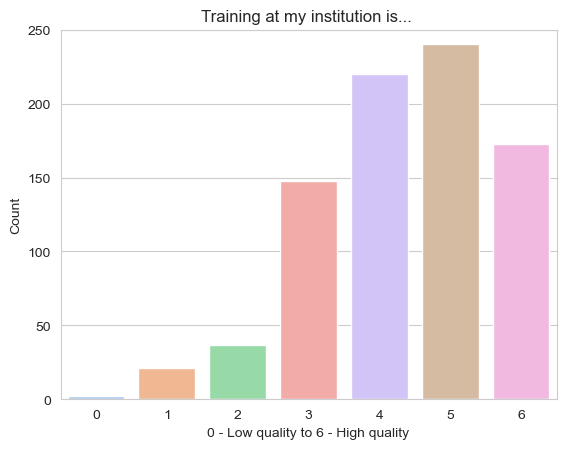

In [92]:
likert_data = df['Q2.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training at my institution is... ')

# Display the plot
plt.ylim(0, 250)
plt.show()
#plt.savefig('../data/plots_test/legal_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [93]:
#Display how many particpants haven't given an answer
count = df["Q2.5_1"].isna().sum()
print(count, "participants have not answered.")

1726 participants have not answered.


### Q2.6 Training in this topic at my institution:

In [94]:
#Count all answers and list them descending
'N=' + (df['Q2.6'].value_counts(sort=True)).astype(str)

At the right level                                                                    N=227
Frequent                                                                              N=165
Frequent,At the right level                                                           N=163
Infrequent                                                                            N=136
Infrequent,At the right level                                                          N=55
At too basic a level                                                                   N=38
Infrequent,At too basic a level                                                        N=31
Frequent,At too basic a level                                                          N=12
At too complex a level                                                                  N=5
Infrequent,At too complex a level                                                       N=4
Frequent,At too complex a level                                                 

In [95]:
#Normalise the count to represent answers in percent
(df['Q2.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                                                                    26.99%
Frequent                                                                              19.62%
Frequent,At the right level                                                           19.38%
Infrequent                                                                            16.17%
Infrequent,At the right level                                                          6.54%
At too basic a level                                                                   4.52%
Infrequent,At too basic a level                                                        3.69%
Frequent,At too basic a level                                                          1.43%
At too complex a level                                                                 0.59%
Infrequent,At too complex a level                                                      0.48%
Frequent,At too complex a level                                       

In [96]:
#Display how many particpants haven't given an answer
count = df["Q2.6"].isna().sum()
print(count, "participants have not answered.")

1726 participants have not answered.


### Q2.7 The help at my institution on this topic is mainly:

In [97]:
#Count all answers and list them descending
'N=' + (df['Q2.7'].value_counts(sort=True)).astype(str)

Good                                                             N=245
Available                                                        N=105
At the right level                                                N=85
Good,Available                                                    N=66
Good,At the right level,Available                                 N=63
I do not know                                                     N=44
Hard to access                                                    N=43
At the right level,Available                                      N=36
Too basic                                                         N=33
Good,At the right level                                           N=31
Other. Please explain:                                            N=26
Too basic,Available                                               N=12
Too basic,Hard to access                                           N=7
Non-existent                                                       N=6
Good,O

In [98]:
#Normalise the count to represent answers in percent
(df['Q2.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                             29.13%
Available                                                        12.49%
At the right level                                               10.11%
Good,Available                                                    7.85%
Good,At the right level,Available                                 7.49%
I do not know                                                     5.23%
Hard to access                                                    5.11%
At the right level,Available                                      4.28%
Too basic                                                         3.92%
Good,At the right level                                           3.69%
Other. Please explain:                                            3.09%
Too basic,Available                                               1.43%
Too basic,Hard to access                                          0.83%
Non-existent                                                    

In [99]:
#Display how many particpants haven't given an answer
count = df["Q2.7"].isna().sum()
print(count, "participants have not answered.")

1726 participants have not answered.


### Q2.7_TEXT

In [100]:
#Count all answers and list them descending
df['Q2.7_8_TEXT'].value_counts(sort=True)

good, but very complex and timeconsuming to digest. Therefore lucky to have CTU with folks were versed in all the procedures                                                                                                          1
Accessible but superfluous                                                                                                                                                                                                            1
on a general basis                                                                                                                                                                                                                    1
At a global level, e.g. GitHub provision                                                                                                                                                                                              1
Too frequent - too many required/mandatory training courses on GDPR     

### Q2.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [101]:
#Count all answers and list them descending
df['Q2.8'].value_counts(sort=True)

No     1458
Yes     334
Name: Q2.8, dtype: int64

### Q2.9 Where have you looked for training and support?

In [102]:
#Count all answers and list them descending
df['Q2.9'].value_counts(sort=True)

Internet                                                                               8
online                                                                                 8
Online                                                                                 5
NIHR                                                                                   5
Google                                                                                 3
                                                                                      ..
Commercial courses                                                                     1
UCL doctoral school courses                                                            1
please see answer below about being confused about what the initial statement means    1
Sci-Hub articles                                                                       1
Scuola Normale Superiore di Pisa, Italy                                                1
Name: Q2.9, Length: 2

### Q2.10 My institution takes mainly the following approach to this topic:

In [103]:
#Count all answers and list them descending
'N=' + (df['Q2.10'].value_counts(sort=True)).astype(str)

Monitoring and compliance    N=746
I do not know                N=563
Passive                      N=207
Recognition and reward       N=171
Name: Q2.10, dtype: object

In [104]:
#Normalise the count to represent answers in percent
(df['Q2.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Monitoring and compliance    44.22%
I do not know                33.37%
Passive                      12.27%
Recognition and reward       10.14%
Name: Q2.10, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

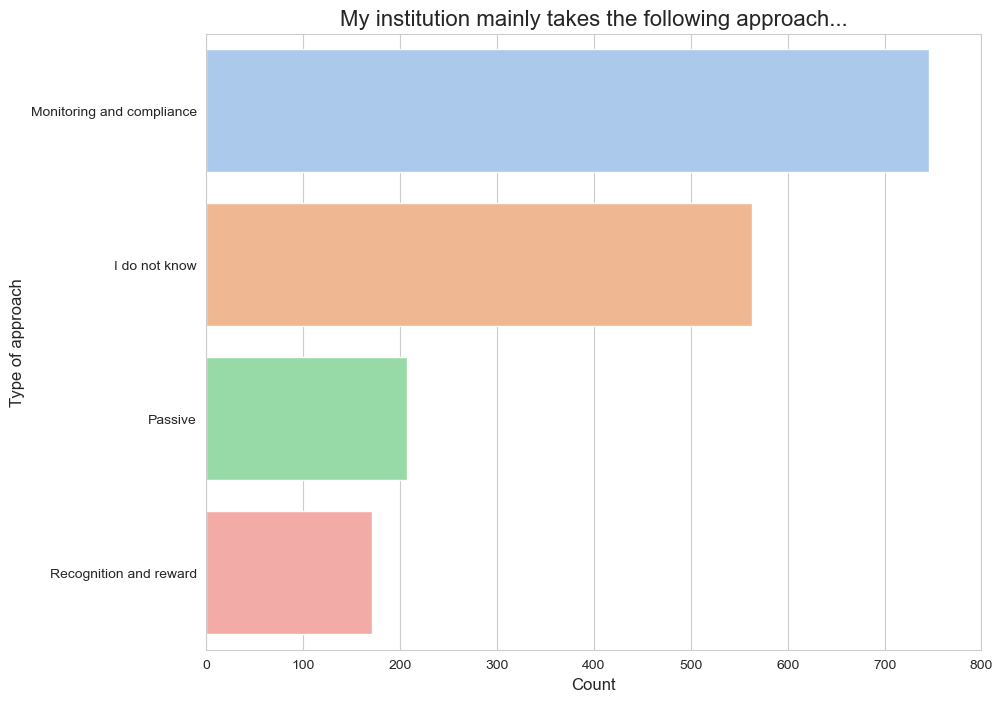

In [105]:
grouped_data = df.groupby('Q2.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q2.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)


#Save the plot
plt.xlim(0, 800)
plt.show
#plt.savefig('../data/plots_test/legal_approach.png', bbox_inches='tight', dpi = 300)

In [106]:
#Display how many particpants haven't given an answer
count = df["Q2.10"].isna().sum()
print(count, "participants have not answered.")

880 participants have not answered.


### Q2.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [107]:
#Count all answers and list them descending
'N=' + (df['Q2.11'].value_counts(sort=True)).astype(str)

I do not know    N=701
Ok               N=573
Very well        N=245
Not very well    N=168
Name: Q2.11, dtype: object

In [108]:
#Display how many particpants haven't given an answer
count = df["Q2.11"].isna().sum()
print(count, "participants have not answered.")

880 participants have not answered.


### Q2.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [109]:
#Count all answers and list them descending
df['Q2.12'].value_counts(sort=True)

None                                                                                 73
no                                                                                   61
No                                                                                   57
-                                                                                    56
na                                                                                   53
                                                                                     ..
cumbersome processes with little obvious rationale or support constitute barriers     1
Legal requirements/data sharing agreements can become very complex                    1
abc                                                                                   1
Barriers: data storage                                                                1
not aware of this at all                                                              1
Name: Q2.12, Length: 698, dtype:

### Q2.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [110]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q2.13'].value_counts(sort=True)

No                                                                                                                                                                                                                                 85
no                                                                                                                                                                                                                                 83
None                                                                                                                                                                                                                               76
-                                                                                                                                                                                                                                  57
none                                                                            

## 3. Transparent Qualitative Data Practices

### Q3.1 Transparent qualitative data practices are something I think have a [low, medium, high] priority in my field of research:

In [111]:
#Count all answers and list them descending
df['Q3.1'].value_counts(sort=True)

High                      661
Medium                    353
Low                       317
I am not aware of this    226
Name: Q3.1, dtype: int64

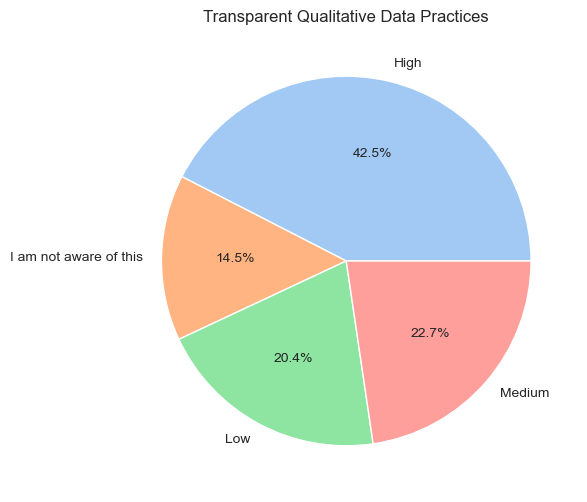

In [112]:
#Plot Transparent Qual

# Group the data by the column
grouped_data = df.groupby('Q3.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q3.1'], autopct='%1.1f%%')

# Add a title
plt.title('Transparent Qualitative Data Practices')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/qual.png', bbox_inches='tight', dpi = 300, transparent=True)

In [113]:
#Display how many particpants haven't given an answer
count = df["Q3.1"].isna().sum()
print(count, "participants have not answered.")

1010 participants have not answered.


### Q3.2 I do this type of activity in my field of research:

In [114]:
print(df['Q3.2_1'].dtype)

object


In [115]:
df['Q3.2_1'] = pd.to_numeric(df['Q3.2_1'], errors='coerce').astype('Int64')

In [116]:
#Count all answers and list them
likert_data = df['Q3.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    405
1    179
2    117
3    163
4    169
5    209
6    315
Name: Q3.2_1, dtype: Int64


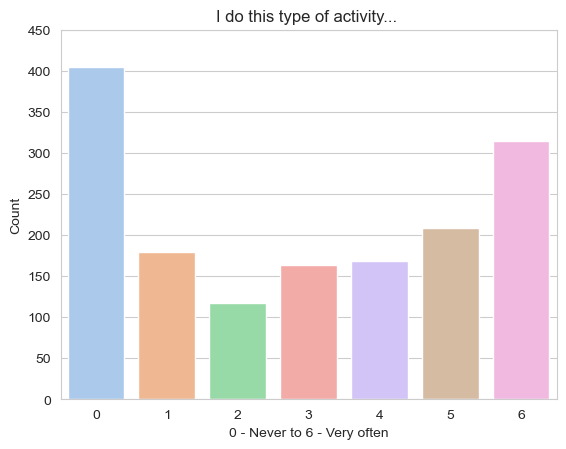

In [117]:
likert_data = df['Q3.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 450)
plt.show()
#plt.savefig('../data/plots_test/qual_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [118]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.898522800256904
Median: 3.0
Mode: 0
Standard Deviation: 2.309860193751787
Interquartile Range: 5


In [119]:
#Display how many particpants haven't given an answer
count = df["Q3.2_1"].isna().sum()
print(count, "participants have not answered.")

1010 participants have not answered.


### Q3.3 For me, training in this topic is:

In [120]:
print(df['Q3.3_1'].dtype)

object


In [121]:
df['Q3.3_1'] = pd.to_numeric(df['Q3.3_1'], errors='coerce').astype('Int64')

In [122]:
#Count all answers and list them
likert_data = df['Q3.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    326
1    151
2     99
3    209
4    196
5    189
6    387
Name: Q3.3_1, dtype: Int64


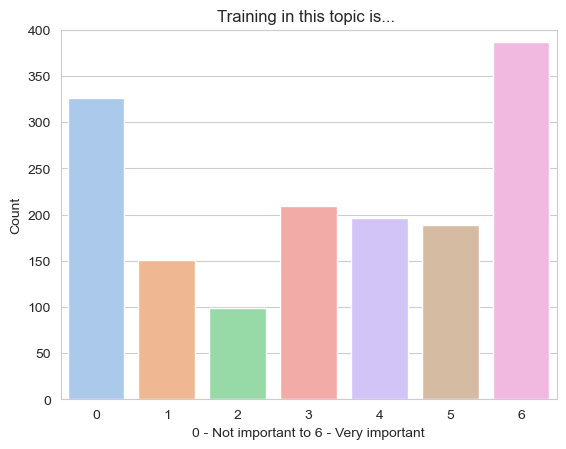

In [123]:
likert_data = df['Q3.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 400)
plt.show()
#plt.savefig('../data/plots_test/qual_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [124]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.228644829800899
Median: 3.0
Mode: 6
Standard Deviation: 2.2661307579671868
Interquartile Range: 4


In [125]:
#Display how many particpants haven't given an answer
count = df["Q3.3_1"].isna().sum()
print(count, "participants have not answered.")

1010 participants have not answered.


### Q3.4 I have looked for training and support in this topic at my institution:

In [126]:
#Count all answers and list them descending
df['Q3.4'].value_counts(sort=True)

No                    1164
Yes                    320
Yes, but not found      73
Name: Q3.4, dtype: int64

In [127]:
#Display how many particpants haven't given an answer
count = df["Q3.4"].isna().sum()
print(count, "participants have not answered.")

1010 participants have not answered.


### Q3.5 (if Q3.4 was yes) Training at my institution is:

In [128]:
#Show type of df column
print(df['Q3.5_1'].dtype)

object


In [129]:
df['Q3.5_1'] = pd.to_numeric(df['Q3.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q3.5_1']

In [130]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.275974025974026
Median: 4.0
Mode: 5
Standard Deviation: 1.347626950130224
Interquartile Range: 2


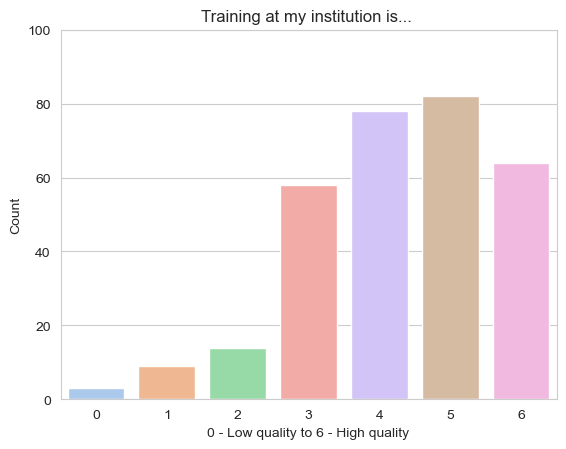

In [131]:
likert_data = df['Q3.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training at my institution is... ')

# Display the plot
plt.ylim(0, 100)
plt.show()
#plt.savefig('../data/plots_test/qual_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [132]:
#Display how many particpants haven't given an answer
count = df["Q3.5_1"].isna().sum()
print(count, "participants have not answered.")

2259 participants have not answered.


### Q3.6 Training in this topic at my institution:

In [133]:
#Count all answers and list them descending
'N=' + (df['Q3.6'].value_counts(sort=True)).astype(str)

At the right level                                        N=80
Infrequent                                                N=66
Frequent                                                  N=56
Frequent,At the right level                               N=52
Infrequent,At the right level                             N=15
At too basic a level                                      N=14
Infrequent,At too basic a level                            N=7
Frequent,At too basic a level                              N=5
Infrequent,At too complex a level                          N=4
At too complex a level                                     N=4
At the right level,At too basic a level                    N=2
Infrequent,At too complex a level,At too basic a level     N=1
Frequent,Infrequent                                        N=1
Frequent,At too complex a level                            N=1
Frequent,At too complex a level,At the right level         N=1
Name: Q3.6, dtype: object

In [134]:
#Normalise the count to represent answers in percent
(df['Q3.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                                        25.89%
Infrequent                                                21.36%
Frequent                                                  18.12%
Frequent,At the right level                               16.83%
Infrequent,At the right level                              4.85%
At too basic a level                                       4.53%
Infrequent,At too basic a level                            2.27%
Frequent,At too basic a level                              1.62%
Infrequent,At too complex a level                          1.29%
At too complex a level                                     1.29%
At the right level,At too basic a level                    0.65%
Infrequent,At too complex a level,At too basic a level     0.32%
Frequent,Infrequent                                        0.32%
Frequent,At too complex a level                            0.32%
Frequent,At too complex a level,At the right level         0.32%
Name: Q3.6, dtype: object

In [135]:
#Display how many particpants haven't given an answer
count = df["Q3.6"].isna().sum()
print(count, "participants have not answered.")

2258 participants have not answered.


### Q3.7 The help at my institution on this topic is mainly:

In [136]:
#Count all answers and list them descending
'N=' + (df['Q3.7'].value_counts(sort=True)).astype(str)

Good                                                        N=87
Available                                                   N=45
Good,Available                                              N=28
At the right level                                          N=25
Good,At the right level,Available                           N=20
Good,At the right level                                     N=16
I do not know                                               N=16
Too basic                                                   N=13
Hard to access                                              N=12
Non-existent                                                 N=8
Other. Please explain:                                       N=7
At the right level,Available                                 N=7
Too basic,Available                                          N=4
Hard to access,Other. Please explain:                        N=3
Hard to access,I do not know                                 N=2
Good,At the right level,A

In [137]:
#Normalise the count to represent answers in percent
(df['Q3.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        28.16%
Available                                                   14.56%
Good,Available                                               9.06%
At the right level                                           8.09%
Good,At the right level,Available                            6.47%
Good,At the right level                                      5.18%
I do not know                                                5.18%
Too basic                                                    4.21%
Hard to access                                               3.88%
Non-existent                                                 2.59%
Other. Please explain:                                       2.27%
At the right level,Available                                 2.27%
Too basic,Available                                          1.29%
Hard to access,Other. Please explain:                        0.97%
Hard to access,I do not know                                 0

In [138]:
#Display how many particpants haven't given an answer
count = df["Q3.7"].isna().sum()
print(count, "participants have not answered.")

2258 participants have not answered.


### Q3.7_TEXT

In [139]:
#Count all answers and list them descending
df['Q3.7_8_TEXT'].value_counts(sort=True)

See my answers to the previous (Open Science) question. Issues of uneven application are the same.                                                                                              1
Too complex for the majority of cases, and needs to be separated from the medical sciences                                                                                                      1
The training is wrong and often contradictory to much of the other training i have received.                                                                                                    1
available through formal study                                                                                                                                                                  1
as before                                                                                                                                                                                       1
Problematic as there is instit

### Q3.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [140]:
#Count all answers and list them descending
df['Q3.8'].value_counts(sort=True)

No     1328
Yes     214
Name: Q3.8, dtype: int64

### Q3.9 Where have you looked for training and support?

In [141]:
#Count all answers and list them descending
df['Q3.9'].value_counts(sort=True)

Online                                                   9
online                                                   9
UK Data Service                                          3
NIHR                                                     3
NCRM                                                     3
                                                        ..
NOT SURE                                                 1
twitter, google                                          1
prior institution                                        1
national websites and relevant national organisations    1
Department of Civil and Environmental Engineering        1
Name: Q3.9, Length: 178, dtype: int64

### Q3.10 My institution takes mainly the following approach to this topic:

In [142]:
#Count all answers and list them descending
'N=' + (df['Q3.10'].value_counts(sort=True)).astype(str)

I do not know                N=891
Monitoring and compliance    N=268
Passive                      N=238
Recognition and reward       N=112
Name: Q3.10, dtype: object

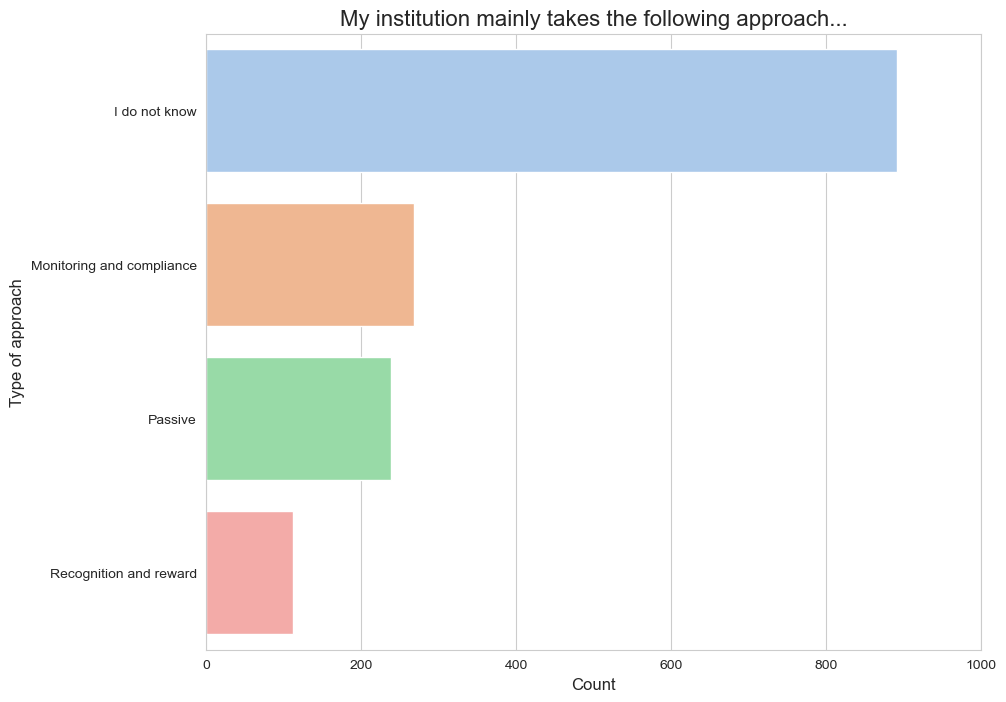

In [143]:
grouped_data = df.groupby('Q3.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q3.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)


#Save the plot
plt.xlim(0, 1000)
plt.show()
#plt.savefig('../data/plots_test/qual_approach.png', bbox_inches='tight', dpi = 300)

In [144]:
#Normalise the count to represent answers in percent
(df['Q3.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                59.05%
Monitoring and compliance    17.76%
Passive                      15.77%
Recognition and reward        7.42%
Name: Q3.10, dtype: object

In [145]:
#Display how many particpants haven't given an answer
count = df["Q3.10"].isna().sum()
print(count, "participants have not answered.")

1058 participants have not answered.


### Q3.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [146]:
#Count all answers and list them descending
'N=' + (df['Q3.11'].value_counts(sort=True)).astype(str)

I do not know    N=968
Ok               N=297
Not very well    N=129
Very well        N=115
Name: Q3.11, dtype: object

In [147]:
#Display how many particpants haven't given an answer
count = df["Q3.11"].isna().sum()
print(count, "participants have not answered.")

1058 participants have not answered.


### Q3.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [148]:
#Count all answers and list them descending
'N=' + (df['Q3.12'].value_counts(sort=True)).astype(str)

-                                                                                              N=68
no                                                                                             N=59
na                                                                                             N=51
None                                                                                           N=47
none                                                                                           N=41
                                                                                               ... 
Ensuring that the data is secure and not used for purposes outside of it's ethical approval     N=1
I do not see any risks.                                                                         N=1
I don't do qualitative data research.                                                           N=1
Anonymisation difficulties as a barrier for data sharing                                        N=1


### Q3.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [149]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q3.13'].value_counts(sort=True)

no                                                                                                                                                                                 76
No                                                                                                                                                                                 76
None                                                                                                                                                                               66
-                                                                                                                                                                                  60
na                                                                                                                                                                                 50
                                                                                          

## 4. Defining the Data, Code, or Other Evidence

### Q4.1 Defining the data, code, or other evidence on which your research findings will be based on and how this will be managed and shared before the start of data collection and analysis (e.g., Data Management Plans) is something I think has a [low, medium, high] priority in my field of research:

In [150]:
#Count all answers and list them descending
df['Q4.1'].value_counts(sort=True)

High                      815
Medium                    389
Low                       169
I am not aware of this     59
Name: Q4.1, dtype: int64

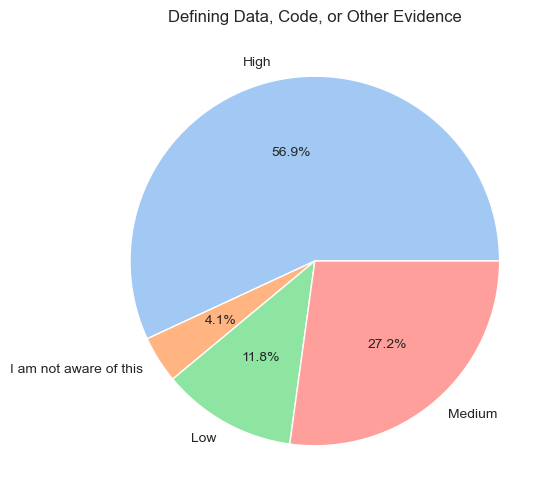

In [151]:
#Plot research methods

# Group the data by the column
grouped_data = df.groupby('Q4.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q4.1'], autopct='%1.1f%%')

# Add a title
plt.title('Defining Data, Code, or Other Evidence')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/defining.png', bbox_inches='tight', dpi = 300, transparent=True)

In [152]:
#Display how many particpants haven't given an answer
count = df["Q4.1"].isna().sum()
print(count, "participants have not answered.")

1135 participants have not answered.


### Q4.2 I do this type of activity in my field of research:

In [153]:
print(df['Q4.2_1'].dtype)

object


In [154]:
df['Q4.2_1'] = pd.to_numeric(df['Q4.2_1'], errors='coerce').astype('Int64')

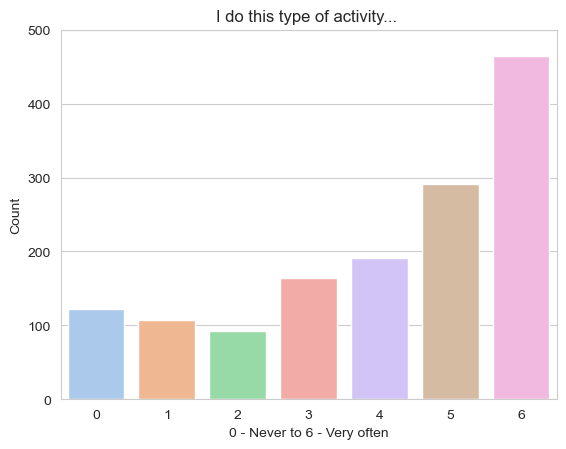

In [155]:
likert_data = df['Q4.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 500)
plt.show()
#plt.savefig('../data/plots_test/defining_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [156]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.0418994413407825
Median: 5.0
Mode: 6
Standard Deviation: 1.977420768461095
Interquartile Range: 3


In [157]:
#Display how many particpants haven't given an answer
count = df["Q4.2_1"].isna().sum()
print(count, "participants have not answered.")

1135 participants have not answered.


### Q4.3 For me, training in this topic is:

In [158]:
print(df['Q4.3_1'].dtype)

object


In [159]:
df['Q4.3_1'] = pd.to_numeric(df['Q4.3_1'], errors='coerce').astype('Int64')

In [160]:
#Count all answers and list them
likert_data = df['Q4.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    114
1     93
2     97
3    215
4    247
5    244
6    422
Name: Q4.3_1, dtype: Int64


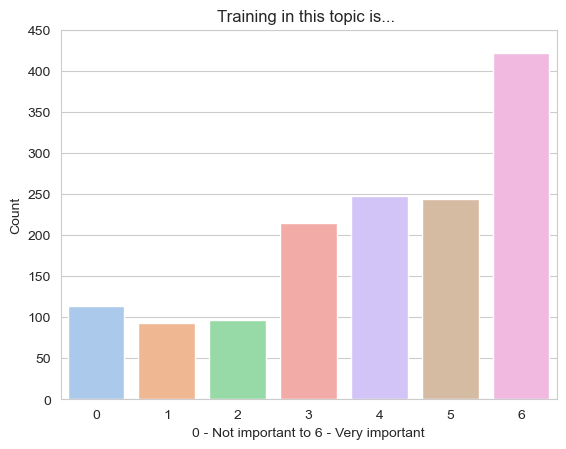

In [161]:
likert_data = df['Q4.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 450)
plt.show()
#plt.savefig('../data/plots_test/defining_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [162]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.9608938547486034
Median: 4.0
Mode: 6
Standard Deviation: 1.9051238527680265
Interquartile Range: 3


In [163]:
#Display how many particpants haven't given an answer
count = df["Q4.3_1"].isna().sum()
print(count, "participants have not answered.")

1135 participants have not answered.


### Q4.4 I have looked for training and support in this topic at my institution:

In [164]:
#Count all answers and list them descending
df['Q4.4'].value_counts(sort=True)

No                    819
Yes                   539
Yes, but not found     74
Name: Q4.4, dtype: int64

In [165]:
#Display how many particpants haven't given an answer
count = df["Q4.4"].isna().sum()
print(count, "participants have not answered.")

1135 participants have not answered.


### Q4.5 (if Q4.4 was yes) Training at my institution is:

In [166]:
#Show type of df column
print(df['Q4.5_1'].dtype)

object


In [167]:
df['Q4.5_1'] = pd.to_numeric(df['Q4.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q4.5_1']

In [168]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.099437148217636
Median: 4.0
Mode: 4
Standard Deviation: 1.3639627632177074
Interquartile Range: 2


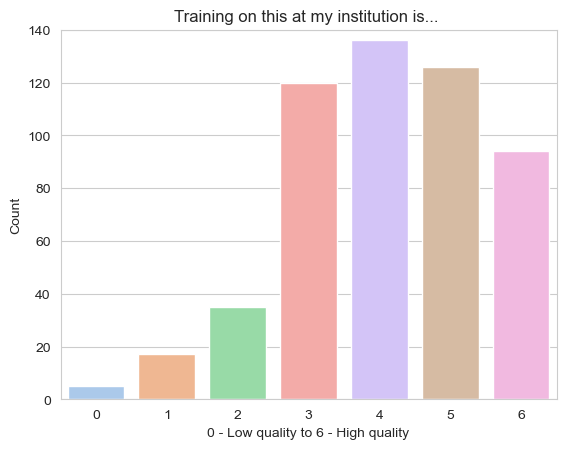

In [169]:
likert_data = df['Q4.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this at my institution is... ')

# Display the plot
plt.ylim(0, 140)
plt.show()
#plt.savefig('../data/plots_test/defining_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [170]:
#Display how many particpants haven't given an answer
count = df["Q4.5_1"].isna().sum()
print(count, "participants have not answered.")

2034 participants have not answered.


### Q4.6 Training in this topic at my institution:

In [171]:
#Count all answers and list them descending
'N=' + (df['Q4.6'].value_counts(sort=True)).astype(str)

At the right level                                    N=155
Frequent,At the right level                            N=91
Infrequent                                             N=89
Frequent                                               N=74
At too basic a level                                   N=30
Infrequent,At the right level                          N=30
Infrequent,At too basic a level                        N=25
Frequent,At too basic a level                          N=13
At too complex a level                                  N=9
Infrequent,At too complex a level                       N=7
Frequent,At too complex a level,At the right level      N=4
Frequent,At too complex a level                         N=3
At too complex a level,At too basic a level             N=1
At the right level,At too basic a level                 N=1
Frequent,Infrequent                                     N=1
Name: Q4.6, dtype: object

In [172]:
#Normalise the count to represent answers in percent
(df['Q4.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                                    29.08%
Frequent,At the right level                           17.07%
Infrequent                                             16.7%
Frequent                                              13.88%
At too basic a level                                   5.63%
Infrequent,At the right level                          5.63%
Infrequent,At too basic a level                        4.69%
Frequent,At too basic a level                          2.44%
At too complex a level                                 1.69%
Infrequent,At too complex a level                      1.31%
Frequent,At too complex a level,At the right level     0.75%
Frequent,At too complex a level                        0.56%
At too complex a level,At too basic a level            0.19%
At the right level,At too basic a level                0.19%
Frequent,Infrequent                                    0.19%
Name: Q4.6, dtype: object

In [173]:
#Display how many particpants haven't given an answer
count = df["Q4.6"].isna().sum()
print(count, "participants have not answered.")

2034 participants have not answered.


### Q4.7 The help at my institution on this topic is mainly:

In [174]:
#Count all answers and list them descending
'N=' + (df['Q4.7'].value_counts(sort=True)).astype(str)

Good                                                        N=141
Available                                                    N=70
At the right level                                           N=52
Good,Available                                               N=46
Good,At the right level,Available                            N=44
Too basic                                                    N=30
Hard to access                                               N=28
At the right level,Available                                 N=18
Good,At the right level                                      N=17
I do not know                                                N=16
Other. Please explain:                                       N=15
Non-existent                                                 N=10
Too basic,Hard to access                                      N=9
Too basic,Available                                           N=5
Hard to access,I do not know                                  N=4
Available,

In [175]:
#Normalise the count to represent answers in percent
(df['Q4.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                         26.5%
Available                                                   13.16%
At the right level                                           9.77%
Good,Available                                               8.65%
Good,At the right level,Available                            8.27%
Too basic                                                    5.64%
Hard to access                                               5.26%
At the right level,Available                                 3.38%
Good,At the right level                                       3.2%
I do not know                                                3.01%
Other. Please explain:                                       2.82%
Non-existent                                                 1.88%
Too basic,Hard to access                                     1.69%
Too basic,Available                                          0.94%
Hard to access,I do not know                                 0

In [176]:
#Display how many particpants haven't given an answer
count = df["Q4.7"].isna().sum()
print(count, "participants have not answered.")

2035 participants have not answered.


### Q4.7_TEXT

In [177]:
#Count all answers and list them descending
df['Q4.7_8_TEXT'].value_counts(sort=True)

For two previous questions I choose random options, because I didn't take the training yet but I'm aware that it is exists                                                                                                                                                               1
I do not know what applies to me, and much of the advice on institutional webpages seems geared to other discplines                                                                                                                                                                      1
There is a paradox as the typical academic response is both: "don't tell me how to record my research" and "just tell me exactly what you want us to do."                                                                                                                                1
Poor, too generic                                                                                                                                      

### Q4.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [178]:
#Count all answers and list them descending
df['Q4.8'].value_counts(sort=True)

No     1187
Yes     239
Name: Q4.8, dtype: int64

### Q4.9 Where have you looked for training and support?

In [179]:
#Count all answers and list them descending
df['Q4.9'].value_counts(sort=True)

online                                                           13
Internet                                                          4
Online                                                            4
Previous institution                                              4
NIHR                                                              3
                                                                 ..
Via my professional society or peers                              1
colleagues who were expert in preparation of these statements     1
through colleagues (informal training)                            1
MRC/UKRI, European, EDCTP                                         1
Google                                                            1
Name: Q4.9, Length: 202, dtype: int64

### Q4.10 My institution takes mainly the following approach to this topic:

In [180]:
#Count all answers and list them descending
'N=' + (df['Q4.10'].value_counts(sort=True)).astype(str)

I do not know                N=549
Monitoring and compliance    N=479
Passive                      N=277
Recognition and reward       N=100
Name: Q4.10, dtype: object

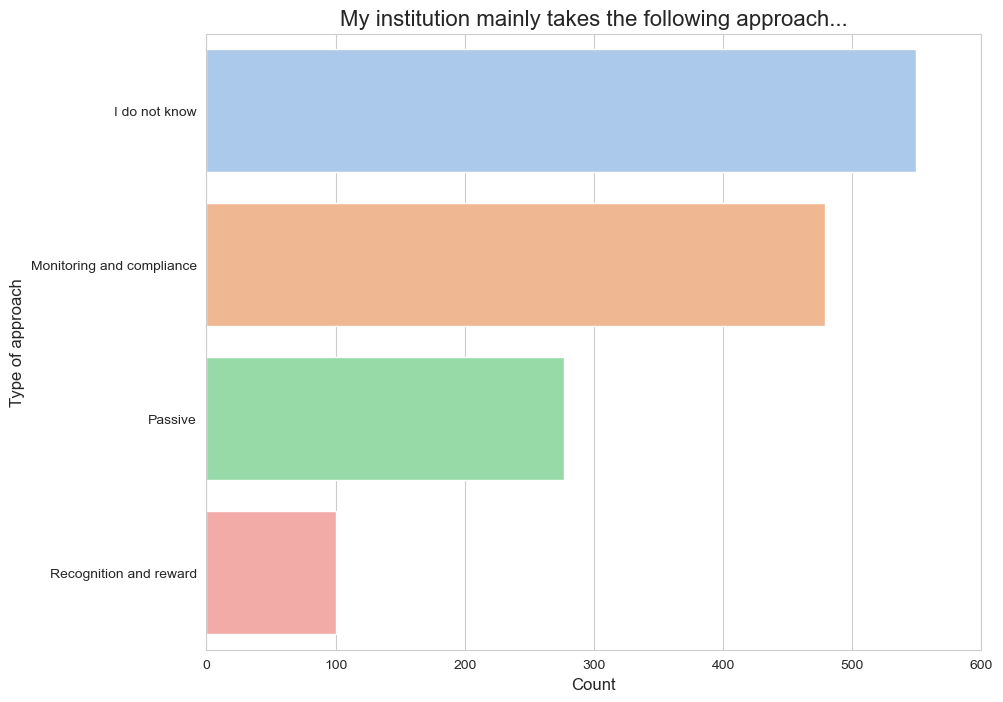

In [181]:
grouped_data = df.groupby('Q4.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q4.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)


#Save the plot
plt.xlim(0, 600)
plt.show()
#plt.savefig('../data/plots_test/defining_approach.png', bbox_inches='tight', dpi = 300)

In [182]:
#Normalise the count to represent answers in percent
(df['Q4.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                39.07%
Monitoring and compliance    34.09%
Passive                      19.72%
Recognition and reward        7.12%
Name: Q4.10, dtype: object

In [183]:
#Display how many particpants haven't given an answer
count = df["Q4.10"].isna().sum()
print(count, "participants have not answered.")

1162 participants have not answered.


### Q4.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [184]:
#Count all answers and list them descending
'N=' + (df['Q4.11'].value_counts(sort=True)).astype(str)

I do not know    N=648
Ok               N=424
Not very well    N=170
Very well        N=163
Name: Q4.11, dtype: object

In [185]:
#Display how many particpants haven't given an answer
count = df["Q4.11"].isna().sum()
print(count, "participants have not answered.")

1162 participants have not answered.


### Q4.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [186]:
#Count all answers and list them descending
'N=' + (df['Q4.12'].value_counts(sort=True)).astype(str)

-                                                                                                                                                                                                                                                       N=63
None                                                                                                                                                                                                                                                    N=53
no                                                                                                                                                                                                                                                      N=51
na                                                                                                                                                                                                                                               

### Q4.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [187]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q4.13'].value_counts(sort=True)

no                                                                                                75
No                                                                                                70
None                                                                                              61
-                                                                                                 61
none                                                                                              57
                                                                                                  ..
Now publish protocols for all studies and reviews and try to get postgrad supervisees to do so     1
??                                                                                                 1
This issue has ceased to be a scientific issue and has become ideological                          1
OK                                                                                         

## 5. Pre-registration

### Q5.1 Pre-registration of research protocols (may include registered reports) is something I think has a [low, medium, high] priority in my field of research:

In [188]:
#Count all answers and list them descending
df['Q5.1'].value_counts(sort=True)

Low                       463
High                      316
Medium                    295
I am not aware of this    286
Name: Q5.1, dtype: int64

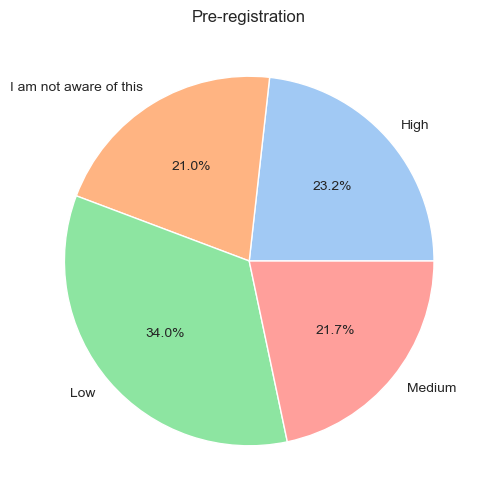

In [189]:
#Plot research methods

# Group the data by the column
grouped_data = df.groupby('Q5.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q5.1'], autopct='%1.1f%%')

# Add a title
plt.title('Pre-registration')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/prereg.png', bbox_inches='tight', dpi = 300, transparent=True)

In [190]:
#Display how many particpants haven't given an answer
count = df["Q5.1"].isna().sum()
print(count, "participants have not answered.")

1207 participants have not answered.


### Q5.2 I do this type of activity in my field of research:

In [191]:
print(df['Q5.2_1'].dtype)

object


In [192]:
df['Q5.2_1'] = pd.to_numeric(df['Q5.2_1'], errors='coerce').astype('Int64')

In [193]:
#Count all answers and list them
likert_data = df['Q5.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    521
1    192
2     79
3    106
4     94
5    119
6    156
Name: Q5.2_1, dtype: Int64


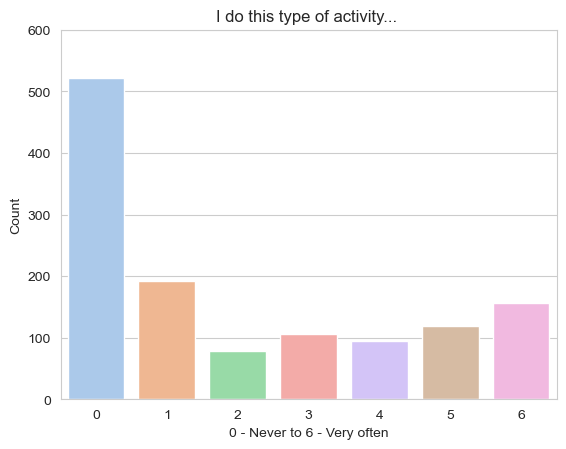

In [194]:
likert_data = df['Q5.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 600)
plt.show()
#plt.savefig('../data/plots_test/prereg_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [195]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean:f}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std:f}")
print(f"Interquartile Range: {iqr}")

Mean: 2.032360
Median: 1.0
Mode: 0
Standard Deviation: 2.234950
Interquartile Range: 4


In [196]:
#Display how many particpants haven't given an answer
count = df["Q5.2_1"].isna().sum()
print(count, "participants have not answered.")

1300 participants have not answered.


### Q5.3 For me, training in this topic is:

In [197]:
print(df['Q5.3_1'].dtype)

object


In [198]:
df['Q5.3_1'] = pd.to_numeric(df['Q5.3_1'], errors='coerce').astype('Int64')

In [199]:
#Count all answers and list them
likert_data = df['Q5.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    382
1    163
2    106
3    215
4    134
5    118
6    177
Name: Q5.3_1, dtype: Int64


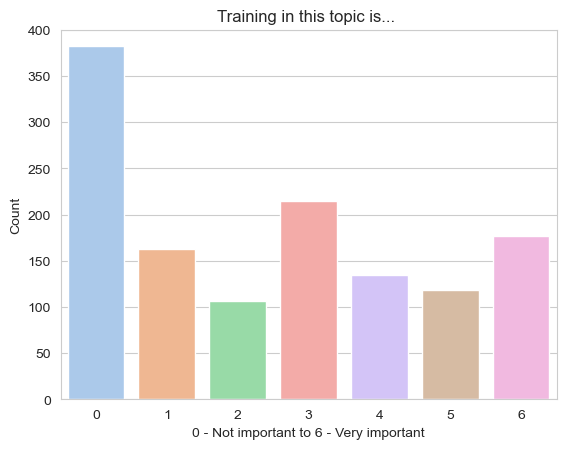

In [200]:
likert_data = df['Q5.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 400)
plt.show()
#plt.savefig('../data/plots_test/prereg_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [201]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.4772200772200774
Median: 2.0
Mode: 0
Standard Deviation: 2.1606781650990983
Interquartile Range: 4


In [202]:
#Display how many particpants haven't given an answer
count = df["Q5.3_1"].isna().sum()
print(count, "participants have not answered.")

1272 participants have not answered.


### Q5.4 I have looked for training and support in this topic at my institution:

In [203]:
#Count all answers and list them descending
'N=' + (df['Q5.4'].value_counts(sort=True)).astype(str)

No                    N=1192
Yes                    N=130
Yes, but not found      N=37
Name: Q5.4, dtype: object

In [204]:
#Display how many particpants haven't given an answer
count = df["Q5.4"].isna().sum()
print(count, "participants have not answered.")

1208 participants have not answered.


### Q5.5 (if Q5.4 was yes) Training at my institution is:

In [205]:
#Show type of df column
print(df['Q5.5_1'].dtype)

object


In [206]:
df['Q5.5_1'] = pd.to_numeric(df['Q5.5_1'], errors='coerce').astype('Int64')
likert_data = df['Q5.5_1']

In [207]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.354838709677419
Median: 5.0
Mode: 6
Standard Deviation: 1.6139309602661567
Interquartile Range: 3


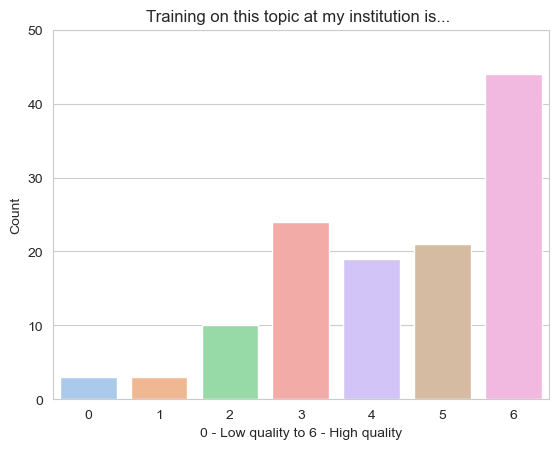

In [208]:
likert_data = df['Q5.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=True)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 50)
plt.show()
#plt.savefig('../data/plots_test/prereg_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [209]:
#Display how many particpants haven't given an answer
count = df["Q5.5_1"].isna().sum()
print(count, "participants have not answered.")

2443 participants have not answered.


### Q5.6 Training in this topic at my institution:

In [210]:
#Count all answers and list them descending
'N=' + (df['Q5.6'].value_counts(sort=True)).astype(str)

At the right level                 N=37
Frequent,At the right level        N=23
Infrequent                         N=23
Frequent                           N=20
Infrequent,At too basic a level     N=8
Infrequent,At the right level       N=7
At too complex a level              N=4
At too basic a level                N=3
Frequent,At too basic a level       N=2
Name: Q5.6, dtype: object

In [211]:
#Normalise the count to represent answers in percent
(df['Q5.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                 29.13%
Frequent,At the right level        18.11%
Infrequent                         18.11%
Frequent                           15.75%
Infrequent,At too basic a level      6.3%
Infrequent,At the right level       5.51%
At too complex a level              3.15%
At too basic a level                2.36%
Frequent,At too basic a level       1.57%
Name: Q5.6, dtype: object

In [212]:
#Display how many particpants haven't given an answer
count = df["Q5.6"].isna().sum()
print(count, "participants have not answered.")

2440 participants have not answered.


### Q5.7 The help at my institution on this topic is mainly:

In [213]:
#Count all answers and list them descending
'N=' + (df['Q5.7'].value_counts(sort=True)).astype(str)

Good                                                        N=29
Available                                                   N=16
Good,At the right level,Available                           N=13
At the right level                                          N=12
Good,Available                                              N=11
Non-existent                                                N=10
I do not know                                                N=6
Too basic                                                    N=5
Good,Too basic                                               N=3
At the right level,Available                                 N=3
Good,At the right level                                      N=3
Hard to access                                               N=3
Hard to access,I do not know                                 N=3
Good,At the right level,Available,Other. Please explain:     N=2
Available,Other. Please explain:                             N=2
Too basic,Available,Other

In [214]:
#Normalise the count to represent answers in percent
(df['Q5.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        22.83%
Available                                                    12.6%
Good,At the right level,Available                           10.24%
At the right level                                           9.45%
Good,Available                                               8.66%
Non-existent                                                 7.87%
I do not know                                                4.72%
Too basic                                                    3.94%
Good,Too basic                                               2.36%
At the right level,Available                                 2.36%
Good,At the right level                                      2.36%
Hard to access                                               2.36%
Hard to access,I do not know                                 2.36%
Good,At the right level,Available,Other. Please explain:     1.57%
Available,Other. Please explain:                             1

In [215]:
#Display how many particpants haven't given an answer
count = df["Q5.7"].isna().sum()
print(count, "participants have not answered.")

2440 participants have not answered.


### Q5.7_TEXT

In [216]:
#Count all answers and list them descending
df['Q5.7_8_TEXT'].value_counts(sort=True)

Very variable, for some years it was a big problem, now it is getting much better                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       1
Excellent                                                                                                                                                                                                                                                     

### Q5.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [217]:
#Count all answers and list them descending
df['Q5.8'].value_counts(sort=True)

No     1254
Yes      99
Name: Q5.8, dtype: int64

### Q5.9 Where have you looked for training and support?

In [218]:
#Count all answers and list them descending
'N=' + (df['Q5.9'].value_counts(sort=True)).astype(str)

online                                 N=6
OSF                                    N=4
Internet                               N=3
Twitter                                N=2
RQA                                    N=2
                                      ... 
UKRN, OSF website                      N=1
UKRN                                   N=1
OSF and publisher's websites           N=1
Other HEIs, peer support, coaching     N=1
The As predicted websites              N=1
Name: Q5.9, Length: 83, dtype: object

### Q5.10 My institution takes mainly the following approach to this topic:

In [219]:
#Count all answers and list them descending
'N=' + (df['Q5.10'].value_counts(sort=True)).astype(str)

I do not know                N=862
Passive                      N=245
Monitoring and compliance    N=158
Recognition and reward        N=74
Name: Q5.10, dtype: object

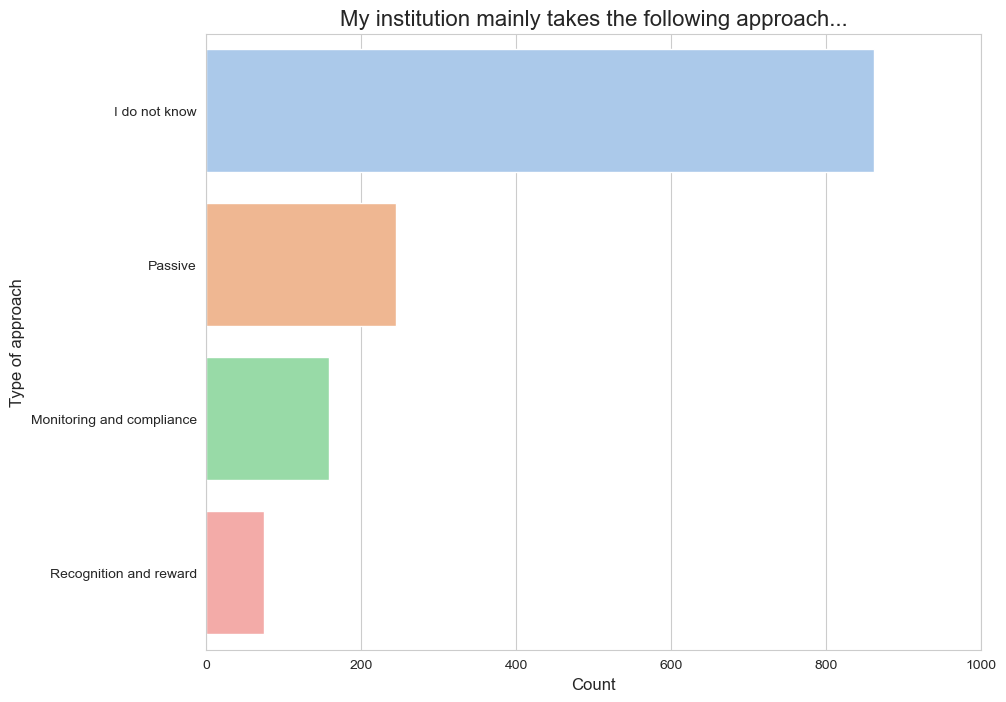

In [220]:
grouped_data = df.groupby('Q5.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q5.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

#Save the plot
plt.xlim(0, 1000)
plt.show()
#plt.savefig('../data/plots_test/prereg_approach.png', bbox_inches='tight', dpi = 300)

In [221]:
#Normalise the count to represent answers in percent
(df['Q5.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                64.38%
Passive                       18.3%
Monitoring and compliance     11.8%
Recognition and reward        5.53%
Name: Q5.10, dtype: object

In [222]:
#Display how many particpants haven't given an answer
count = df["Q5.10"].isna().sum()
print(count, "participants have not answered.")

1228 participants have not answered.


### Q5.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [223]:
#Count all answers and list them descending
'N=' + (df['Q5.11'].value_counts(sort=True)).astype(str)

I do not know    N=927
Ok               N=210
Not very well    N=118
Very well         N=84
Name: Q5.11, dtype: object

In [224]:
#Display how many particpants haven't given an answer
count = df["Q4.11"].isna().sum()
print(count, "participants have not answered.")

1162 participants have not answered.


### Q5.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [225]:
#Count all answers and list them descending
df['Q5.12'].value_counts(sort=True)

-                                                                                                                                                                                         58
None                                                                                                                                                                                      51
na                                                                                                                                                                                        46
no                                                                                                                                                                                        44
none                                                                                                                                                                                      39
                                                       

### Q5.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [226]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q5.13'].value_counts(sort=True)

no                                                                                                                                                                                                                                    59
None                                                                                                                                                                                                                                  56
No                                                                                                                                                                                                                                    55
-                                                                                                                                                                                                                                     52
na                                                                  

## 6. Open Source Software created by others

### Q6.1 Using open source software created by others is something I think has a [low, medium, high] priority in my field of research:

In [227]:
#Count all answers and list them descending
df['Q6.1'].value_counts(sort=True)

High                      540
Medium                    364
Low                       267
I am not aware of this    146
Name: Q6.1, dtype: int64

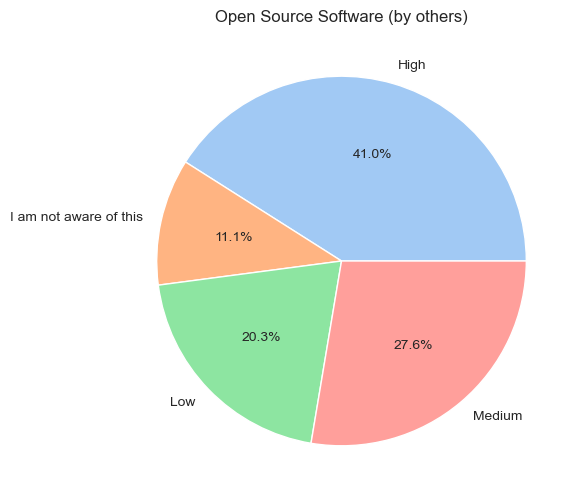

In [228]:
#Plot research methods

# Group the data by the column
grouped_data = df.groupby('Q6.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q6.1'], autopct='%1.1f%%')

# Add a title
plt.title('Open Source Software (by others)')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/opensource_others.png', bbox_inches='tight', dpi = 300, transparent=True)

In [229]:
#Display how many particpants haven't given an answer
count = df["Q6.1"].isna().sum()
print(count, "participants have not answered.")

1250 participants have not answered.


### Q6.2 I do this type of activity in my field of research:

In [230]:
print(df['Q6.2_1'].dtype)

object


In [231]:
df['Q6.2_1'] = pd.to_numeric(df['Q6.2_1'], errors='coerce').astype('Int64')

In [232]:
#Count all answers and list them
likert_data = df['Q6.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    294
1    161
2     98
3    157
4    127
5    131
6    348
Name: Q6.2_1, dtype: Int64


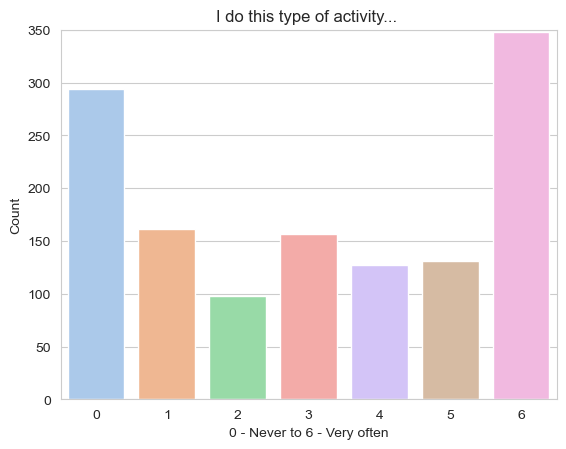

In [233]:
likert_data = df['Q6.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 350)
plt.show()
#plt.savefig('../data/plots_test/OSothers_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [234]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.099544072948328
Median: 3.0
Mode: 6
Standard Deviation: 2.3330913786918117
Interquartile Range: 5


In [235]:
#Display how many particpants haven't given an answer
count = df["Q6.2_1"].isna().sum()
print(count, "participants have not answered.")

1251 participants have not answered.


### Q6.3 For me, training in this topic is:

In [236]:
print(df['Q6.3_1'].dtype)

object


In [237]:
df['Q6.3_1'] = pd.to_numeric(df['Q6.3_1'], errors='coerce').astype('Int64')

In [238]:
#Count all answers and list them
likert_data = df['Q6.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    267
1    160
2    107
3    214
4    169
5    139
6    260
Name: Q6.3_1, dtype: Int64


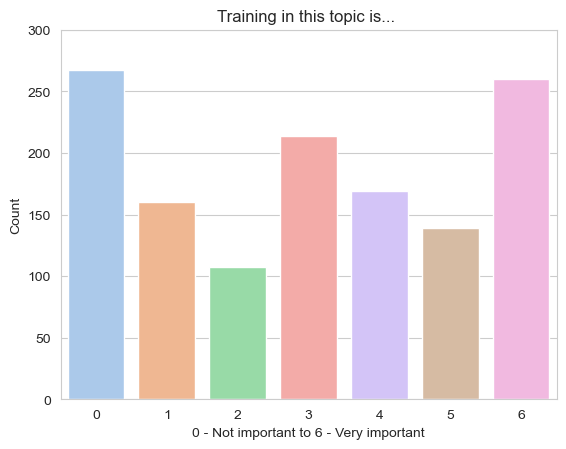

In [239]:
likert_data = df['Q6.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/OSothers_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [240]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.9992401215805473
Median: 3.0
Mode: 0
Standard Deviation: 2.1739906079812203
Interquartile Range: 4


In [241]:
#Display how many particpants haven't given an answer
count = df["Q6.3_1"].isna().sum()
print(count, "participants have not answered.")

1251 participants have not answered.


### Q6.4 I have looked for training and support in this topic at my institution:

In [242]:
#Count all answers and list them descending
'N=' + (df['Q6.4'].value_counts(sort=True)).astype(str)

No                    N=1024
Yes                    N=243
Yes, but not found      N=50
Name: Q6.4, dtype: object

In [243]:
#Display how many particpants haven't given an answer
count = df["Q6.4"].isna().sum()
print(count, "participants have not answered.")

1250 participants have not answered.


### Q6.5 (if Q6.4 was yes) Training at my institution is:

In [244]:
#Show type of df column
print(df['Q6.5_1'].dtype)

object


In [245]:
df['Q6.5_1'] = pd.to_numeric(df['Q6.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q6.5_1']

In [246]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode()

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.9338842975206614
Median: 4.0
Mode: 0    3
1    5
Name: Q6.5_1, dtype: Int64
Standard Deviation: 1.6635488595572274
Interquartile Range: 2


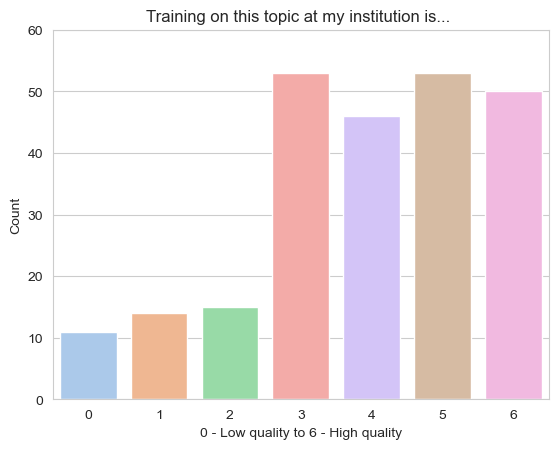

In [247]:
likert_data = df['Q6.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 60)
plt.show()
#plt.savefig('../data/plots_test/OSothers_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [248]:
#Display how many particpants haven't given an answer
count = df["Q6.5_1"].isna().sum()
print(count, "participants have not answered.")

2325 participants have not answered.


### Q6.6 Training in this topic at my institution:

In [249]:
#Count all answers and list them descending
'N=' + (df['Q6.6'].value_counts(sort=True)).astype(str)

Infrequent                                                        N=53
At the right level                                                N=52
Frequent                                                          N=38
Frequent,At the right level                                       N=34
At too basic a level                                              N=17
Infrequent,At the right level                                     N=16
Infrequent,At too basic a level                                   N=11
Frequent,At too basic a level                                      N=5
At too complex a level                                             N=4
Infrequent,At too complex a level                                  N=4
Infrequent,At too complex a level,At too basic a level             N=3
Frequent,At too complex a level                                    N=2
At too complex a level,At too basic a level                        N=2
At too complex a level,At the right level,At too basic a level     N=1
Name: 

In [250]:
#Normalise the count to represent answers in percent
(df['Q6.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Infrequent                                                         21.9%
At the right level                                                21.49%
Frequent                                                           15.7%
Frequent,At the right level                                       14.05%
At too basic a level                                               7.02%
Infrequent,At the right level                                      6.61%
Infrequent,At too basic a level                                    4.55%
Frequent,At too basic a level                                      2.07%
At too complex a level                                             1.65%
Infrequent,At too complex a level                                  1.65%
Infrequent,At too complex a level,At too basic a level             1.24%
Frequent,At too complex a level                                    0.83%
At too complex a level,At too basic a level                        0.83%
At too complex a level,At the right level,At too ba

In [251]:
#Display how many particpants haven't given an answer
count = df["Q6.6"].isna().sum()
print(count, "participants have not answered.")

2325 participants have not answered.


### Q6.7 The help at my institution on this topic is mainly:

In [252]:
#Count all answers and list them descending
'N=' + (df['Q6.7'].value_counts(sort=True)).astype(str)

Good                                                        N=55
Available                                                   N=26
At the right level                                          N=22
I do not know                                               N=19
Hard to access                                              N=18
Too basic                                                   N=17
Good,At the right level,Available                           N=17
Good,Available                                              N=14
Non-existent                                                N=12
At the right level,Available                                 N=8
Too basic,Hard to access                                     N=4
Too basic,Available                                          N=3
Good,Hard to access                                          N=3
Good,At the right level                                      N=3
Other. Please explain:                                       N=2
Non-existent,Hard to acce

In [253]:
#Normalise the count to represent answers in percent
(df['Q6.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        22.73%
Available                                                   10.74%
At the right level                                           9.09%
I do not know                                                7.85%
Hard to access                                               7.44%
Too basic                                                    7.02%
Good,At the right level,Available                            7.02%
Good,Available                                               5.79%
Non-existent                                                 4.96%
At the right level,Available                                 3.31%
Too basic,Hard to access                                     1.65%
Too basic,Available                                          1.24%
Good,Hard to access                                          1.24%
Good,At the right level                                      1.24%
Other. Please explain:                                       0

In [254]:
#Display how many particpants haven't given an answer
count = df["Q6.7"].isna().sum()
print(count, "participants have not answered.")

2325 participants have not answered.


### Q6.7_TEXT

In [255]:
#Count all answers and list them descending
df['Q6.7_8_TEXT'].value_counts(sort=True)

Some open source software has a lot of training and others have little to no training.                                            1
you don't know who to contact for help for specific things                                                                        1
Personal responsibility rests with individual researchers                                                                         1
Excellent                                                                                                                         1
Too complex                                                                                                                       1
It's a while since i sought support                                                                                               1
Training in specific area was unavailable                                                                                         1
more frequent training opportunities would be good                          

### Q6.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [256]:
#Count all answers and list them descending
df['Q6.8'].value_counts(sort=True)

No     1043
Yes     272
Name: Q6.8, dtype: int64

### Q6.9 Where have you looked for training and support?

In [257]:
#Count all answers and list them descending
df['Q6.9'].value_counts(sort=True)

online                                         22
Online                                         12
Internet                                        7
youtube                                         2
online courses                                  2
                                               ..
Internet, web searches, other practitioners     1
ISD                                             1
relevant websites; expert colleagues            1
internet, collaborators                         1
other university websites                       1
Name: Q6.9, Length: 222, dtype: int64

### Q6.10 My institution takes mainly the following approach to this topic:

In [258]:
#Count all answers and list them descending
'N=' + (df['Q6.10'].value_counts(sort=True)).astype(str)

I do not know                N=793
Passive                      N=342
Monitoring and compliance    N=109
Recognition and reward        N=64
Name: Q6.10, dtype: object

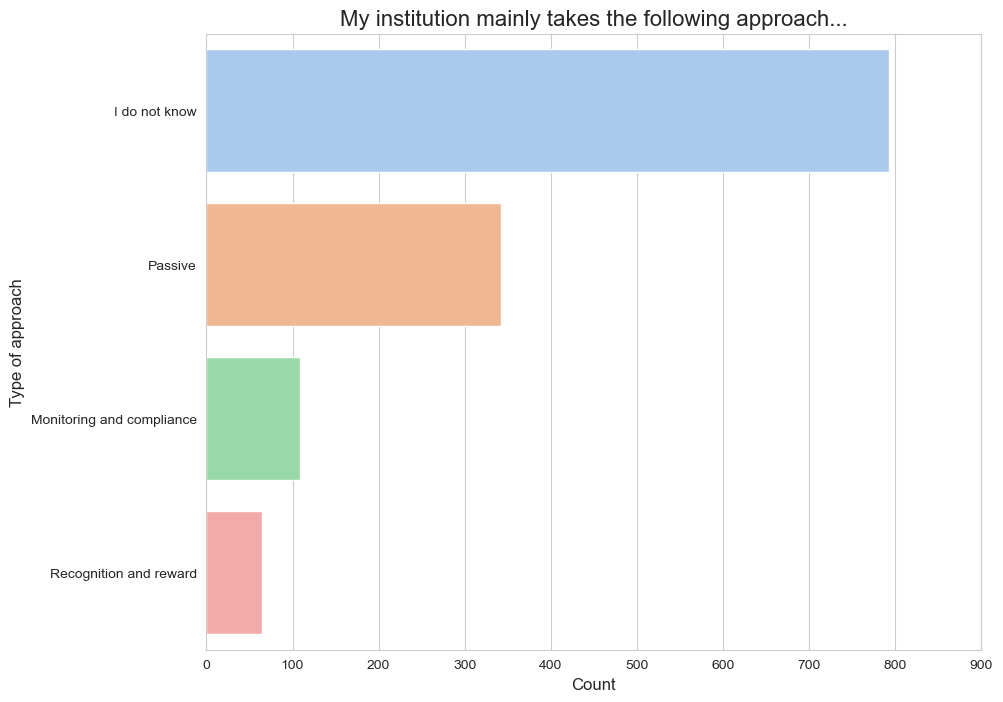

In [259]:
grouped_data = df.groupby('Q6.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q6.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)
          

#Show the plot
plt.xlim(0, 900)
plt.show()
#plt.savefig('../data/plots_test/OSothers_approach.png', bbox_inches='tight', dpi = 300)

In [260]:
#Normalise the count to represent answers in percent
(df['Q6.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                60.63%
Passive                      26.15%
Monitoring and compliance     8.33%
Recognition and reward        4.89%
Name: Q6.10, dtype: object

In [261]:
#Display how many particpants haven't given an answer
count = df["Q6.10"].isna().sum()
print(count, "participants have not answered.")

1259 participants have not answered.


### Q6.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [262]:
#Count all answers and list them descending
'N=' + (df['Q6.11'].value_counts(sort=True)).astype(str)

I do not know    N=870
Ok               N=234
Not very well    N=138
Very well         N=66
Name: Q6.11, dtype: object

In [263]:
#Display how many particpants haven't given an answer
count = df["Q6.11"].isna().sum()
print(count, "participants have not answered.")

1259 participants have not answered.


### Q6.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [264]:
#Count all answers and list them descending
df['Q6.12'].value_counts(sort=True)

-                                                                                                                                 66
None                                                                                                                              58
na                                                                                                                                49
no                                                                                                                                44
No                                                                                                                                43
                                                                                                                                  ..
there is always a fear that is won't be GDPR compliant and I think people lean away from using anything that is not 'standard'     1
I rely on software - really important                                

### Q6.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [265]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q6.13'].value_counts(sort=True)

no                                                                                                                                                                                                                                                                                                                     65
-                                                                                                                                                                                                                                                                                                                      64
No                                                                                                                                                                                                                                                                                                                     64
None                                                      

## 7. Creating own Open Source Software

### Q7.1 Creating my own open source software/analysis code to share with others is something I think has a [low, medium, high] priority in my field of research:

In [266]:
#Count all answers and list them descending
df['Q7.1'].value_counts(sort=True)

Low                       477
High                      302
Medium                    293
I am not aware of this    208
Name: Q7.1, dtype: int64

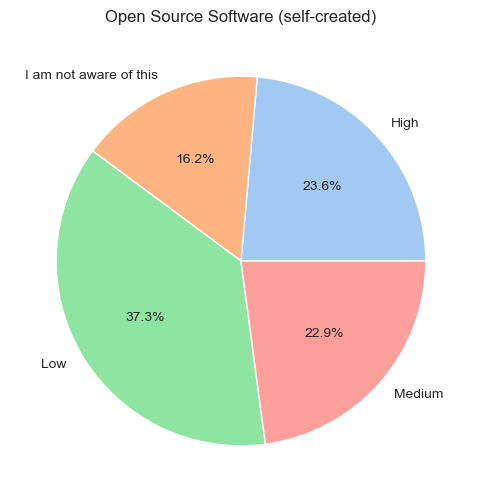

In [267]:
#Plot research methods

# Group the data by the column
grouped_data = df.groupby('Q7.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q7.1'], autopct='%1.1f%%')

# Add a title
plt.title('Open Source Software (self-created)')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/opensource_self.png', bbox_inches='tight', dpi = 300, transparent=True)

In [268]:
#Display how many particpants haven't given an answer
count = df["Q7.1"].isna().sum()
print(count, "participants have not answered.")

1287 participants have not answered.


### Q7.2 I do this type of activity in my field of research:

In [269]:
print(df['Q7.2_1'].dtype)

object


In [270]:
df['Q7.2_1'] = pd.to_numeric(df['Q7.2_1'], errors='coerce').astype('Int64')

In [271]:
#Count all answers and list them
likert_data = df['Q7.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    601
1    187
2     78
3    102
4     88
5     65
6    158
Name: Q7.2_1, dtype: Int64


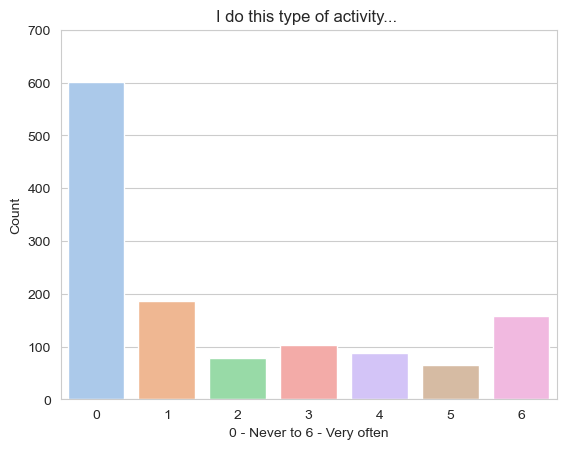

In [272]:
likert_data = df['Q7.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 700)
plt.show()
#plt.savefig('../data/plots_test/OSself_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [273]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 1.7779515246286162
Median: 1.0
Mode: 0
Standard Deviation: 2.183832010031801
Interquartile Range: 3


In [274]:
#Display how many particpants haven't given an answer
count = df["Q7.2_1"].isna().sum()
print(count, "participants have not answered.")

1288 participants have not answered.


### Q7.3 For me, training in this topic is:

In [275]:
print(df['Q7.3_1'].dtype)

object


In [276]:
df['Q7.3_1'] = pd.to_numeric(df['Q7.3_1'], errors='coerce').astype('Int64')

In [277]:
#Count all answers and list them
likert_data = df['Q7.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    476
1    173
2     82
3    151
4    133
5     98
6    166
Name: Q7.3_1, dtype: Int64


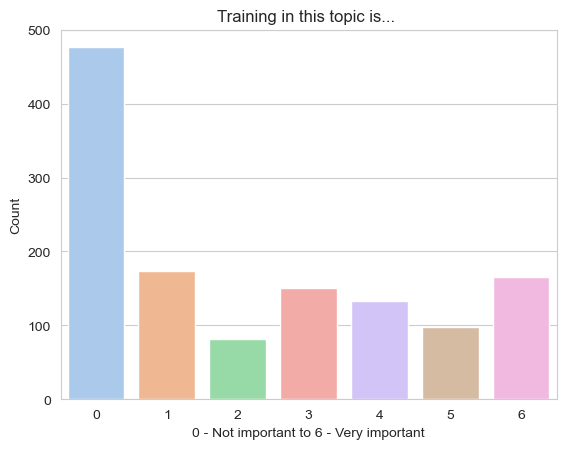

In [278]:
likert_data = df['Q7.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 500)
plt.show()
#plt.savefig('../data/plots_test/OSself_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [279]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.1954652071931196
Median: 1.0
Mode: 0
Standard Deviation: 2.2112837847466937
Interquartile Range: 4


In [280]:
#Display how many particpants haven't given an answer
count = df["Q7.3_1"].isna().sum()
print(count, "participants have not answered.")

1288 participants have not answered.


### Q7.4 I have looked for training and support in this topic at my institution:

In [281]:
#Count all answers and list them descending
'N=' + (df['Q7.4'].value_counts(sort=True)).astype(str)

No                    N=1119
Yes                    N=129
Yes, but not found      N=32
Name: Q7.4, dtype: object

In [282]:
#Display how many particpants haven't given an answer
count = df["Q7.4"].isna().sum()
print(count, "participants have not answered.")

1287 participants have not answered.


### Q7.5 (if Q7.4 was yes) Training at my institution is:

In [283]:
#Show type of df column
print(df['Q7.5_1'].dtype)

object


In [284]:
df['Q7.5_1'] = pd.to_numeric(df['Q7.5_1'], errors='coerce').astype('Int64')
likert_data = df['Q7.5_1']

In [285]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.890625
Median: 4.0
Mode: 4
Standard Deviation: 1.5885137658364716
Interquartile Range: 2


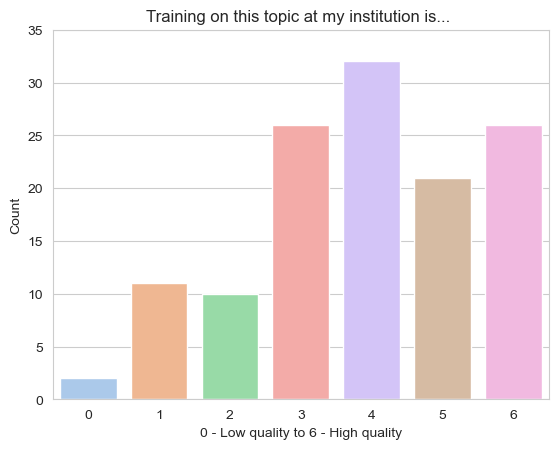

In [286]:
likert_data = df['Q7.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 35)
plt.show()
#plt.savefig('../data/plots_test/OSself_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [287]:
#Display how many particpants haven't given an answer
count = df["Q7.5_1"].isna().sum()
print(count, "participants have not answered.")

2439 participants have not answered.


### Q7.6 Training in this topic at my institution:

In [288]:
#Count all answers and list them descending
'N=' + (df['Q7.6'].value_counts(sort=True)).astype(str)

Infrequent                                                                   N=34
Frequent,At the right level                                                  N=22
At the right level                                                           N=20
Frequent                                                                     N=15
Infrequent,At the right level                                                 N=9
Infrequent,At too basic a level                                               N=7
At too basic a level                                                          N=7
Infrequent,At too complex a level                                             N=5
Frequent,At too basic a level                                                 N=2
At too complex a level                                                        N=2
Infrequent,At too complex a level,At the right level,At too basic a level     N=1
At too complex a level,At the right level                                     N=1
Infrequent,At th

In [289]:
#Normalise the count to represent answers in percent
(df['Q7.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Infrequent                                                                   26.36%
Frequent,At the right level                                                  17.05%
At the right level                                                            15.5%
Frequent                                                                     11.63%
Infrequent,At the right level                                                 6.98%
Infrequent,At too basic a level                                               5.43%
At too basic a level                                                          5.43%
Infrequent,At too complex a level                                             3.88%
Frequent,At too basic a level                                                 1.55%
At too complex a level                                                        1.55%
Infrequent,At too complex a level,At the right level,At too basic a level     0.78%
At too complex a level,At the right level                                   

In [290]:
#Display how many particpants haven't given an answer
count = df["Q7.6"].isna().sum()
print(count, "participants have not answered.")

2438 participants have not answered.


### Q7.7 The help at my institution on this topic is mainly:

In [291]:
#Count all answers and list them descending
'N=' + (df['Q7.7'].value_counts(sort=True)).astype(str)

Good                                                   N=28
Available                                              N=13
Good,At the right level,Available                      N=13
Good,Available                                         N=13
I do not know                                          N=11
Non-existent                                            N=9
Hard to access                                          N=9
Too basic                                               N=8
At the right level,Available                            N=6
At the right level                                      N=6
Good,At the right level                                 N=3
Too basic,Hard to access                                N=2
Hard to access,I do not know,Other. Please explain:     N=1
Good,Other. Please explain:                             N=1
Other. Please explain:                                  N=1
Non-existent,At the right level,Available               N=1
Good,Hard to access                     

In [292]:
#Normalise the count to represent answers in percent
(df['Q7.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                   21.71%
Available                                              10.08%
Good,At the right level,Available                      10.08%
Good,Available                                         10.08%
I do not know                                           8.53%
Non-existent                                            6.98%
Hard to access                                          6.98%
Too basic                                                6.2%
At the right level,Available                            4.65%
At the right level                                      4.65%
Good,At the right level                                 2.33%
Too basic,Hard to access                                1.55%
Hard to access,I do not know,Other. Please explain:     0.78%
Good,Other. Please explain:                             0.78%
Other. Please explain:                                  0.78%
Non-existent,At the right level,Available               0.78%
Good,Har

In [293]:
#Display how many particpants haven't given an answer
count = df["Q7.7"].isna().sum()
print(count, "participants have not answered.")

2438 participants have not answered.


### Q7.7_TEXT

In [294]:
#Count all answers and list them descending
df['Q7.7_8_TEXT'].value_counts(sort=True)

I think there is some embedded in open software training but it's variable and I don't really know much    1
There could be more                                                                                        1
This is central to my discipline so we tend to trial and share amongst colleagues                          1
Name: Q7.7_8_TEXT, dtype: int64

### Q7.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [295]:
#Count all answers and list them descending
df['Q7.8'].value_counts(sort=True)

No     1125
Yes     152
Name: Q7.8, dtype: int64

### Q7.9 Where have you looked for training and support?

In [296]:
#Count all answers and list them descending
df['Q7.9'].value_counts(sort=True)

online                                                        13
Online                                                         8
Internet                                                       4
Online courses                                                 2
by practice                                                    1
                                                              ..
Online tutorials, blogs, YouTube, Twitter, Google              1
Codecademy, Coursera, Github                                   1
Many places, via Google                                        1
Online materials                                               1
google searches, other institutions, publishers guidelines     1
Name: Q7.9, Length: 125, dtype: int64

### Q7.10 My institution takes mainly the following approach to this topic:

In [297]:
#Count all answers and list them descending
'N=' + (df['Q7.10'].value_counts(sort=True)).astype(str)

I do not know                N=873
Passive                      N=264
Recognition and reward        N=73
Monitoring and compliance     N=57
Name: Q7.10, dtype: object

In [298]:
#Normalise the count to represent answers in percent
(df['Q7.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                 68.9%
Passive                      20.84%
Recognition and reward        5.76%
Monitoring and compliance      4.5%
Name: Q7.10, dtype: object

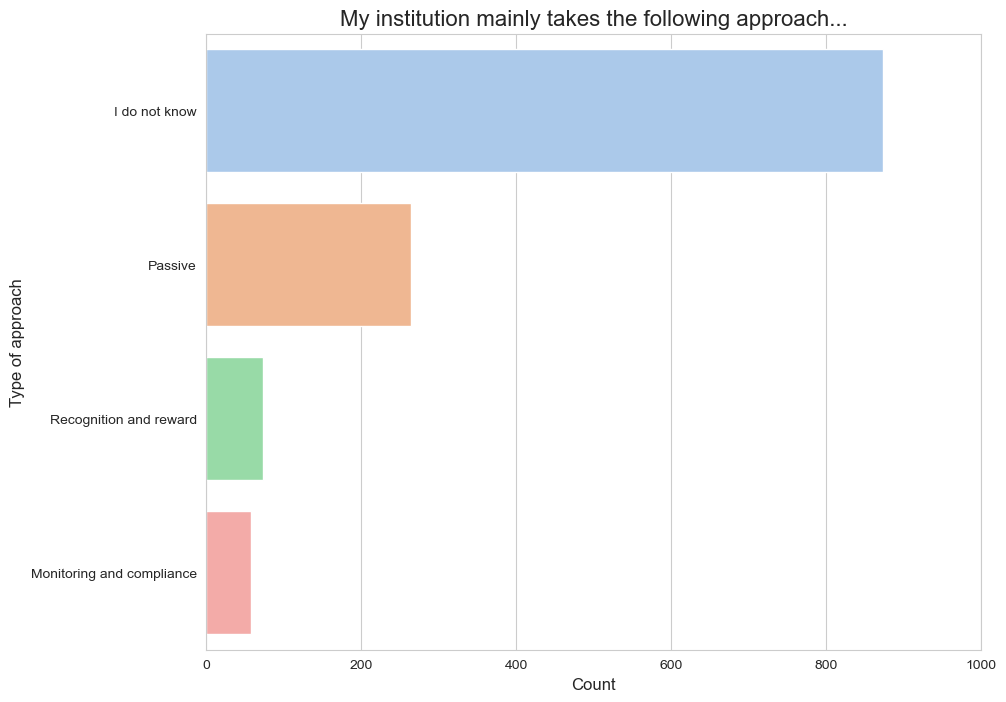

In [299]:
grouped_data = df.groupby('Q7.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q7.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)


#Show the plot
plt.xlim(0, 1000)
plt.show()
#plt.savefig('../data/plots_test/OSself_approach.png', bbox_inches='tight', dpi = 300)

In [300]:
#Display how many particpants haven't given an answer
count = df["Q7.10"].isna().sum()
print(count, "participants have not answered.")

1300 participants have not answered.


### Q7.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [301]:
#Count all answers and list them descending
'N=' + (df['Q7.11'].value_counts(sort=True)).astype(str)

I do not know    N=942
Ok               N=176
Not very well    N=102
Very well         N=46
Name: Q7.11, dtype: object

In [302]:
#Display how many particpants haven't given an answer
count = df["Q7.11"].isna().sum()
print(count, "participants have not answered.")

1301 participants have not answered.


### Q7.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [303]:
#Count all answers and list them descending
df['Q7.12'].value_counts(sort=True)

-                                                                                                                                                                           63
na                                                                                                                                                                          53
None                                                                                                                                                                        47
no                                                                                                                                                                          46
No                                                                                                                                                                          42
                                                                                                                             

### Q7.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [304]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q7.13'].value_counts(sort=True)

no                                                                                                                                                                             65
-                                                                                                                                                                              63
No                                                                                                                                                                             60
None                                                                                                                                                                           60
na                                                                                                                                                                             48
                                                                                                              

## 8. Version Control

### Q8.1 Version control of research products (e.g., data, code, any other materials used in or generated as part of the research process) is something I think have a [low, medium, high] priority in my field of research:

In [305]:
#Count all answers and list them descending
df['Q8.1'].value_counts(sort=True)

High                      472
Medium                    280
Low                       236
I am not aware of this    233
Name: Q8.1, dtype: int64

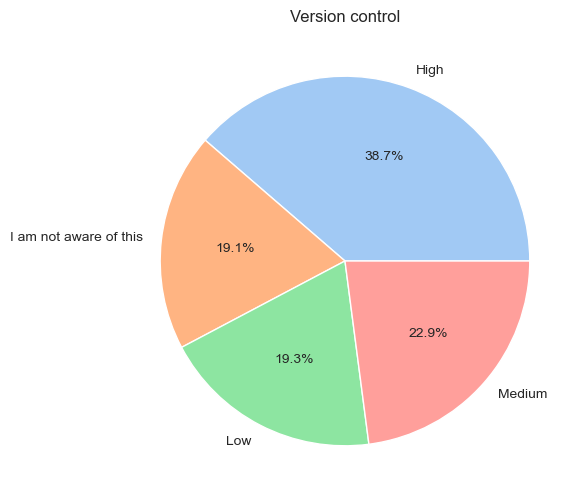

In [306]:
#Plot version control

# Group the data by the column
grouped_data = df.groupby('Q8.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q8.1'], autopct='%1.1f%%')

# Add a title
plt.title('Version control')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/version_control.png', bbox_inches='tight', dpi = 300, transparent=True)

In [307]:
#Display how many particpants haven't given an answer
count = df["Q8.1"].isna().sum()
print(count, "participants have not answered.")

1346 participants have not answered.


### Q8.2 I do this type of activity in my field of research:

In [308]:
print(df['Q8.2_1'].dtype)

object


In [309]:
df['Q8.2_1'] = pd.to_numeric(df['Q8.2_1'], errors='coerce').astype('Int64')

In [310]:
#Count all answers and list them
likert_data = df['Q8.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    340
1    134
2     87
3    127
4    121
5    132
6    280
Name: Q8.2_1, dtype: Int64


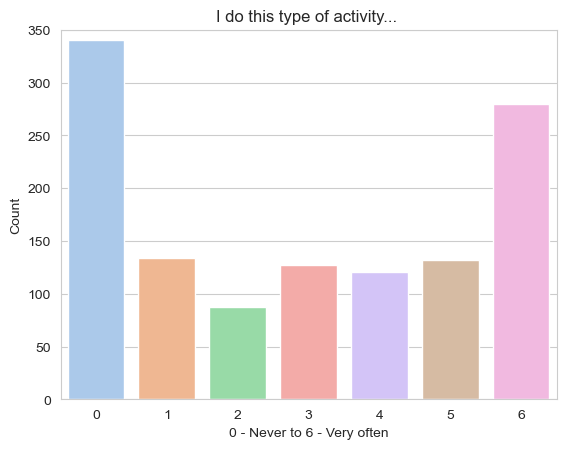

In [311]:
likert_data = df['Q8.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 350)
plt.show()
#plt.savefig('../data/plots_test/version_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [312]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.8771498771498774
Median: 3.0
Mode: 0
Standard Deviation: 2.366704231483458
Interquartile Range: 5


In [313]:
#Display how many particpants haven't given an answer
count = df["Q8.2_1"].isna().sum()
print(count, "participants have not answered.")

1346 participants have not answered.


### Q8.3 For me, training in this topic is:

In [314]:
print(df['Q8.3_1'].dtype)

object


In [315]:
df['Q8.3_1'] = pd.to_numeric(df['Q8.3_1'], errors='coerce').astype('Int64')

In [316]:
#Count all answers and list them
likert_data = df['Q8.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    323
1    134
2    115
3    183
4    119
5    129
6    218
Name: Q8.3_1, dtype: Int64


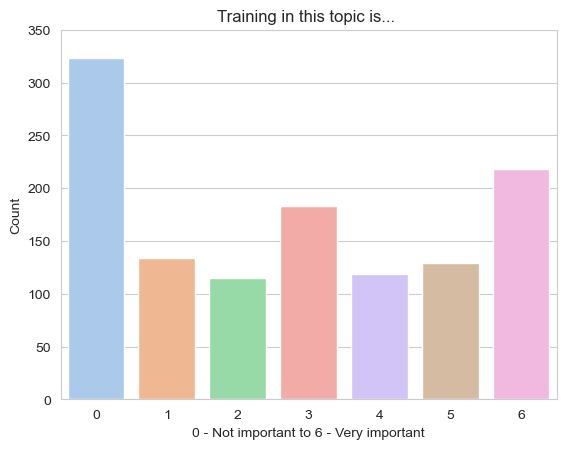

In [317]:
likert_data = df['Q8.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 350)
plt.show()
#plt.savefig('../data/plots_test/version_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [318]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.737100737100737
Median: 3.0
Mode: 0
Standard Deviation: 2.230674627170609
Interquartile Range: 5


In [319]:
#Display how many particpants haven't given an answer
count = df["Q8.3_1"].isna().sum()
print(count, "participants have not answered.")

1346 participants have not answered.


### Q8.4 I have looked for training and support in this topic at my institution:

In [320]:
#Count all answers and list them descending
df['Q8.4'].value_counts(sort=True)

No                    1045
Yes                    136
Yes, but not found      40
Name: Q8.4, dtype: int64

In [321]:
#Display how many particpants haven't given an answer
count = df["Q8.4"].isna().sum()
print(count, "participants have not answered.")

1346 participants have not answered.


### Q8.5 (if Q8.4 was yes) Training at my institution is:

In [322]:
#Show type of df column
print(df['Q8.5_1'].dtype)

object


In [323]:
df['Q8.5_1'] = pd.to_numeric(df['Q8.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q8.5_1']

In [324]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.903703703703704
Median: 4.0
Mode: 4
Standard Deviation: 1.6922742538841968
Interquartile Range: 2


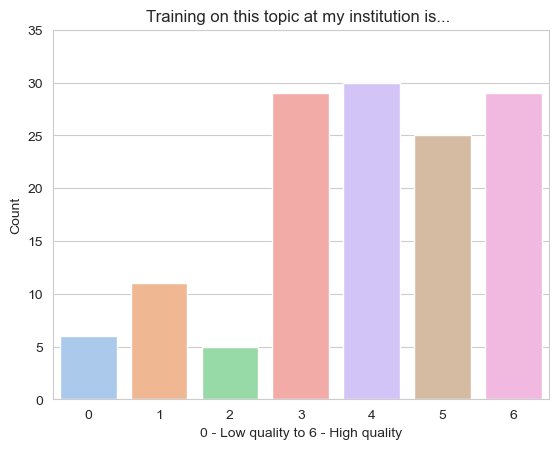

In [325]:
likert_data = df['Q8.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 35)
plt.show()
#plt.savefig('../data/plots_test/version_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [326]:
#Display how many particpants haven't given an answer
count = df["Q8.5_1"].isna().sum()
print(count, "participants have not answered.")

2432 participants have not answered.


### Q8.6 Training in this topic at my institution:

In [327]:
#Count all answers and list them descending
'N=' + (df['Q8.6'].value_counts(sort=True)).astype(str)

At the right level                                        N=28
Infrequent                                                N=28
Frequent,At the right level                               N=23
Frequent                                                  N=20
Infrequent,At the right level                             N=11
At too basic a level                                       N=9
Infrequent,At too basic a level                            N=8
Infrequent,At too complex a level                          N=3
At too complex a level                                     N=2
Infrequent,At the right level,At too basic a level         N=1
Frequent,At too basic a level                              N=1
Infrequent,At too complex a level,At too basic a level     N=1
At the right level,At too basic a level                    N=1
Name: Q8.6, dtype: object

In [328]:
#Normalise the count to represent answers in percent
(df['Q8.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                                        20.59%
Infrequent                                                20.59%
Frequent,At the right level                               16.91%
Frequent                                                  14.71%
Infrequent,At the right level                              8.09%
At too basic a level                                       6.62%
Infrequent,At too basic a level                            5.88%
Infrequent,At too complex a level                          2.21%
At too complex a level                                     1.47%
Infrequent,At the right level,At too basic a level         0.74%
Frequent,At too basic a level                              0.74%
Infrequent,At too complex a level,At too basic a level     0.74%
At the right level,At too basic a level                    0.74%
Name: Q8.6, dtype: object

In [329]:
#Display how many particpants haven't given an answer
count = df["Q8.6"].isna().sum()
print(count, "participants have not answered.")

2431 participants have not answered.


### Q8.7 The help at my institution on this topic is mainly:

In [330]:
#Count all answers and list them descending
'N=' + (df['Q8.7'].value_counts(sort=True)).astype(str)

Good                                               N=32
Available                                          N=22
Good,At the right level,Available                  N=14
Good,Available                                     N=12
I do not know                                      N=11
Non-existent                                       N=10
At the right level                                  N=8
Too basic                                           N=6
Hard to access                                      N=5
Other. Please explain:                              N=3
Non-existent,Hard to access                         N=2
Too basic,Hard to access                            N=2
Too basic,Available                                 N=2
Good,At the right level                             N=2
Available,Hard to access                            N=1
Good,Available,Other. Please explain:               N=1
Good,Other. Please explain:                         N=1
Too basic,Hard to access,Other. Please explain: 

In [331]:
#Normalise the count to represent answers in percent
(df['Q8.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                               23.53%
Available                                          16.18%
Good,At the right level,Available                  10.29%
Good,Available                                      8.82%
I do not know                                       8.09%
Non-existent                                        7.35%
At the right level                                  5.88%
Too basic                                           4.41%
Hard to access                                      3.68%
Other. Please explain:                              2.21%
Non-existent,Hard to access                         1.47%
Too basic,Hard to access                            1.47%
Too basic,Available                                 1.47%
Good,At the right level                             1.47%
Available,Hard to access                            0.74%
Good,Available,Other. Please explain:               0.74%
Good,Other. Please explain:                         0.74%
Too basic,Hard

In [332]:
#Display how many particpants haven't given an answer
count = df["Q8.7"].isna().sum()
print(count, "participants have not answered.")

2431 participants have not answered.


### Q8.7_TEXT

In [333]:
#Count all answers and list them descending
df['Q8.7_8_TEXT'].value_counts(sort=True)

Overwhelming, and at the same time not enough                                                                                                 1
Covered a bit in our unit's SOPs, but no where else                                                                                           1
License support                                                                                                                               1
The training is good, but is not required nor well-publicised.                                                                                1
Training is available but requires a time commitment (4h+) which is hard to find sometimes. Self-directed online training would be useful.    1
some online documentation, quicly out of date                                                                                                 1
Name: Q8.7_8_TEXT, dtype: int64

### Q8.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [334]:
#Count all answers and list them descending
df['Q8.8'].value_counts(sort=True)

No     1077
Yes     144
Name: Q8.8, dtype: int64

### Q8.9 Where have you looked for training and support?

In [335]:
#Count all answers and list them descending
df['Q8.9'].value_counts(sort=True)

online                                                                               13
Online                                                                               13
Internet                                                                              4
NIHR                                                                                  3
Online resources                                                                      3
                                                                                     ..
Own knowledge, employer, academic networks                                            1
Books (github books)                                                                  1
Online providers                                                                      1
coursera                                                                              1
Online via YouTube and following reputable guidelines (e.g., PRISMA and Cochrane)     1
Name: Q8.9, Length: 107, dtype: 

### Q8.10 My institution takes mainly the following approach to this topic:

In [336]:
#Count all answers and list them descending
'N=' + (df['Q8.10'].value_counts(sort=True)).astype(str)

I do not know                N=796
Passive                      N=272
Monitoring and compliance    N=117
Recognition and reward        N=29
Name: Q8.10, dtype: object

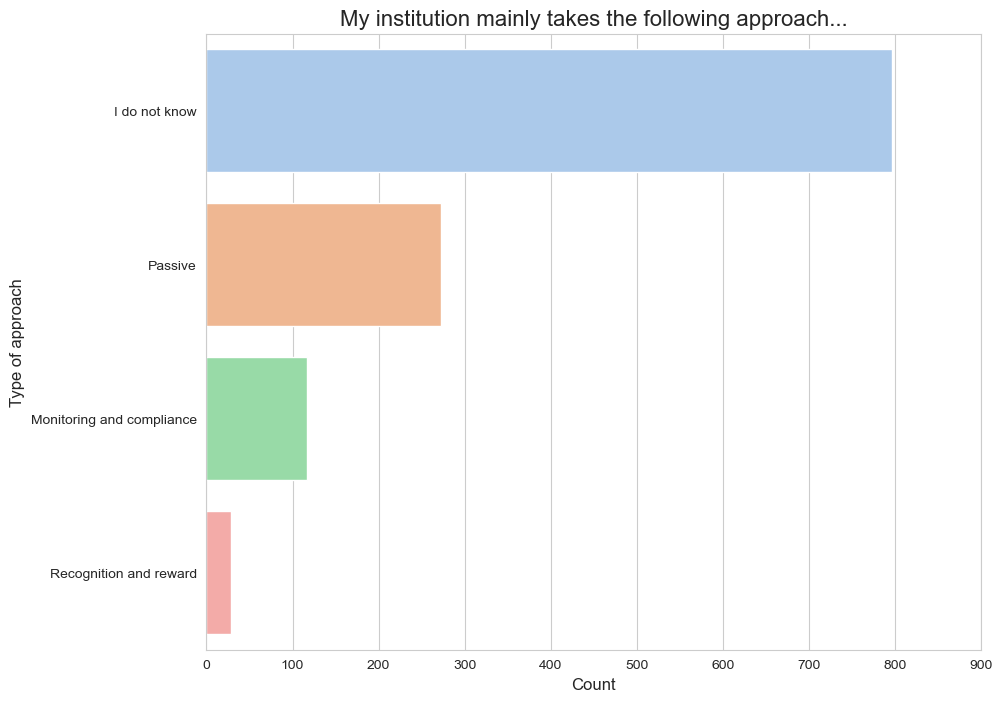

In [337]:
grouped_data = df.groupby('Q8.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q8.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)


#Show the plot
plt.xlim(0, 900)
plt.show()
#plt.savefig('../data/plots_test/version_approach.png', bbox_inches='tight', dpi = 300)

In [338]:
#Normalise the count to represent answers in percent
(df['Q8.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                65.57%
Passive                      22.41%
Monitoring and compliance     9.64%
Recognition and reward        2.39%
Name: Q8.10, dtype: object

In [339]:
#Display how many particpants haven't given an answer
count = df["Q8.10"].isna().sum()
print(count, "participants have not answered.")

1353 participants have not answered.


### Q8.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [340]:
#Count all answers and list them descending
'N=' + (df['Q8.11'].value_counts(sort=True)).astype(str)

I do not know    N=865
Ok               N=191
Not very well    N=102
Very well         N=56
Name: Q8.11, dtype: object

In [341]:
#Display how many particpants haven't given an answer
count = df["Q8.11"].isna().sum()
print(count, "participants have not answered.")

1353 participants have not answered.


### Q8.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [342]:
#Count all answers and list them descending
df['Q8.12'].value_counts(sort=True)

-                                                                                                                                          67
None                                                                                                                                       57
na                                                                                                                                         47
no                                                                                                                                         46
No                                                                                                                                         38
                                                                                                                                           ..
Version control important but not well applied, especially in collaborations                                                                1
No exp

### Q8.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [343]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q9.13'].value_counts(sort=True)

-                                                                                                                                                                       60
no                                                                                                                                                                      59
None                                                                                                                                                                    48
No                                                                                                                                                                      48
na                                                                                                                                                                      45
                                                                                                                                                 

## 9. Own Data Analysis Computationally Reproducible

### Q9.1 My own data analysis is computationally reproducible and this is something I think has a [low, medium, high] priority in my field of research:

In [344]:
#Count all answers and list them descending
df['Q9.1'].value_counts(sort=True)

High                      623
Medium                    208
Low                       191
I am not aware of this    158
Name: Q9.1, dtype: int64

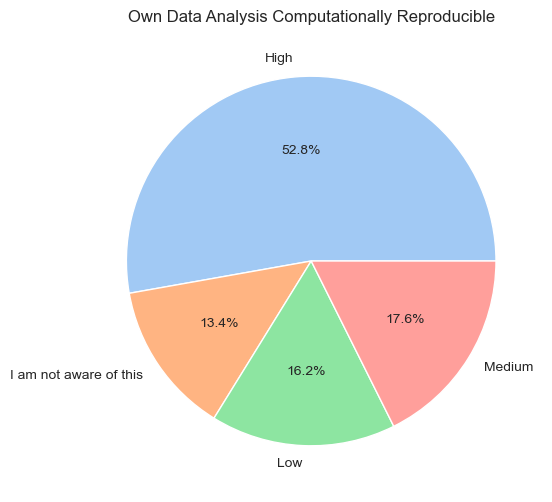

In [345]:
# Group the data by the column
grouped_data = df.groupby('Q9.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q9.1'], autopct='%1.1f%%')

# Add a title
plt.title('Own Data Analysis Computationally Reproducible')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/owndatarepro_control.png', bbox_inches='tight', dpi = 300, transparent=True)

In [346]:
#Display how many particpants haven't given an answer
count = df["Q9.1"].isna().sum()
print(count, "participants have not answered.")

1387 participants have not answered.


### Q9.2 I do this type of activity in my field of research:

In [347]:
print(df['Q9.2_1'].dtype)

object


In [348]:
df['Q9.2_1'] = pd.to_numeric(df['Q9.2_1'], errors='coerce').astype('Int64')

In [349]:
#Count all answers and list them
likert_data = df['Q9.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    262
1     98
2     67
3    116
4    116
5    173
6    339
Name: Q9.2_1, dtype: Int64


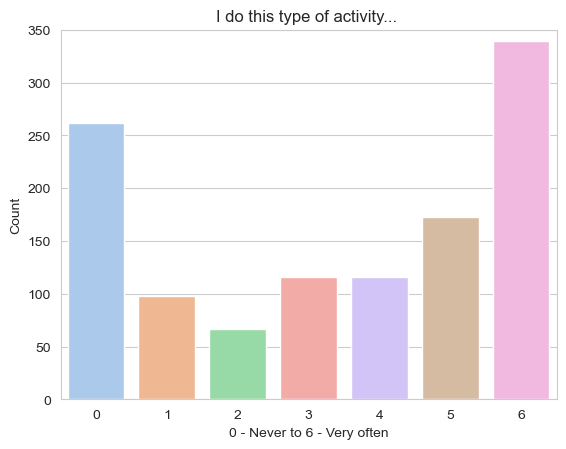

In [350]:
likert_data = df['Q9.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

#Display the plot
plt.ylim(0, 350)
plt.show()
#plt.savefig('../data/plots_test/owndatarepro_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [351]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.367207514944492
Median: 4.0
Mode: 6
Standard Deviation: 2.360302162420393
Interquartile Range: 5


In [352]:
#Display how many particpants haven't given an answer
count = df["Q9.2_1"].isna().sum()
print(count, "participants have not answered.")

1396 participants have not answered.


### Q9.3 For me, training in this topic is:

In [353]:
print(df['Q9.3_1'].dtype)

object


In [354]:
df['Q9.3_1'] = pd.to_numeric(df['Q9.3_1'], errors='coerce').astype('Int64')

In [355]:
#Count all answers and list them
likert_data = df['Q9.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    273
1     96
2     69
3    149
4    150
5    150
6    284
Name: Q9.3_1, dtype: Int64


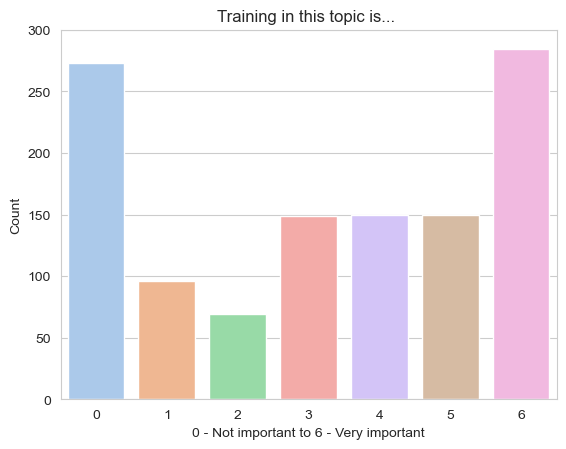

In [356]:
likert_data = df['Q9.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/owndatarepro_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [357]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.189581554227156
Median: 3.0
Mode: 6
Standard Deviation: 2.2971392269891444
Interquartile Range: 4


In [358]:
#Display how many particpants haven't given an answer
count = df["Q9.3_1"].isna().sum()
print(count, "participants have not answered.")

1396 participants have not answered.


### Q9.4 I have looked for training and support in this topic at my institution:

In [359]:
#Count all answers and list them descending
'N=' + (df['Q9.4'].value_counts(sort=True)).astype(str)

No                    N=1016
Yes                    N=125
Yes, but not found      N=39
Name: Q9.4, dtype: object

In [360]:
#Display how many particpants haven't given an answer
count = df["Q9.4"].isna().sum()
print(count, "participants have not answered.")

1387 participants have not answered.


### Q9.5 (if Q9.4 was yes) Training at my institution is:

In [361]:
#Show type of df column
print(df['Q9.5_1'].dtype)

object


In [362]:
df['Q9.5_1'] = pd.to_numeric(df['Q9.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q9.5_1']

In [363]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.392
Median: 5.0
Mode: 5
Standard Deviation: 1.5234510907168801
Interquartile Range: 3


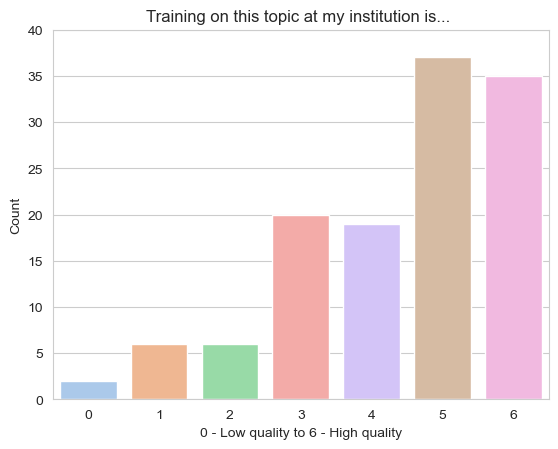

In [364]:
likert_data = df['Q9.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 40)
plt.show()
#plt.savefig('../data/plots_test/owndatarepro_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [365]:
#Display how many particpants haven't given an answer
count = df["Q9.5_1"].isna().sum()
print(count, "participants have not answered.")

2442 participants have not answered.


### Q9.6 Training in this topic at my institution:

In [366]:
#Count all answers and list them descending
'N=' + (df['Q9.6'].value_counts(sort=True)).astype(str)

At the right level                                                                    N=30
Infrequent                                                                            N=26
Frequent                                                                              N=17
Frequent,At the right level                                                           N=17
Infrequent,At the right level                                                         N=12
At too basic a level                                                                   N=8
Infrequent,At too basic a level                                                        N=7
At too complex a level                                                                 N=4
Infrequent,At too complex a level                                                      N=2
Frequent,Infrequent,At too complex a level,At the right level,At too basic a level     N=1
Frequent,Infrequent,At the right level                                                 N=1

In [367]:
#Normalise the count to represent answers in percent
(df['Q9.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                                                                    24.0%
Infrequent                                                                            20.8%
Frequent                                                                              13.6%
Frequent,At the right level                                                           13.6%
Infrequent,At the right level                                                          9.6%
At too basic a level                                                                   6.4%
Infrequent,At too basic a level                                                        5.6%
At too complex a level                                                                 3.2%
Infrequent,At too complex a level                                                      1.6%
Frequent,Infrequent,At too complex a level,At the right level,At too basic a level     0.8%
Frequent,Infrequent,At the right level                                          

In [368]:
#Display how many particpants haven't given an answer
count = df["Q9.6"].isna().sum()
print(count, "participants have not answered.")

2442 participants have not answered.


### Q9.7 The help at my institution on this topic is mainly:

In [369]:
#Count all answers and list them descending
'N=' + (df['Q9.7'].value_counts(sort=True)).astype(str)

Good                                                                                     N=36
Available                                                                                N=20
Good,At the right level,Available                                                        N=15
I do not know                                                                             N=8
Too basic                                                                                 N=8
Good,Available                                                                            N=8
Hard to access                                                                            N=7
At the right level                                                                        N=5
Non-existent                                                                              N=5
Good,At the right level                                                                   N=3
Good,Available,Other. Please explain:                       

In [370]:
#Normalise the count to represent answers in percent
(df['Q9.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                                                     28.8%
Available                                                                                16.0%
Good,At the right level,Available                                                        12.0%
I do not know                                                                             6.4%
Too basic                                                                                 6.4%
Good,Available                                                                            6.4%
Hard to access                                                                            5.6%
At the right level                                                                        4.0%
Non-existent                                                                              4.0%
Good,At the right level                                                                   2.4%
Good,Available,Other. Please explain:             

In [371]:
#Display how many particpants haven't given an answer
count = df["Q9.7"].isna().sum()
print(count, "participants have not answered.")

2442 participants have not answered.


### Q9.7_TEXT

In [372]:
#Count all answers and list them descending
df['Q9.7_8_TEXT'].value_counts(sort=True)

You really are stupid. This survey is so flawed it is beyond belief.    1
Excellent                                                               1
Time and organisational constraints                                     1
available as part of certain MSc modules                                1
Training is good but not required nor well-publicised.                  1
Dependent on the availability of my supervisors.                        1
Name: Q9.7_8_TEXT, dtype: int64

### Q9.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [373]:
#Count all answers and list them descending
df['Q9.8'].value_counts(sort=True)

No     1047
Yes     132
Name: Q9.8, dtype: int64

### Q9.9 Where have you looked for training and support?

In [374]:
#Count all answers and list them descending
df['Q9.9'].value_counts(sort=True)

online                                                9
Online                                                7
Internet                                              4
Alan Turing Institute                                 2
Online resources                                      2
                                                     ..
During my MSc before joining UCL, we covered this.    1
Online self study                                     1
Own knowledge and networks                            1
Commercial providers                                  1
Other universities                                    1
Name: Q9.9, Length: 110, dtype: int64

### Q9.10 My institution takes mainly the following approach to this topic:

In [375]:
#Count all answers and list them descending
'N=' + (df['Q9.10'].value_counts(sort=True)).astype(str)

I do not know                N=738
Passive                      N=270
Monitoring and compliance    N=112
Recognition and reward        N=56
Name: Q9.10, dtype: object

In [376]:
#Normalise the count to represent answers in percent
(df['Q9.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                62.76%
Passive                      22.96%
Monitoring and compliance     9.52%
Recognition and reward        4.76%
Name: Q9.10, dtype: object

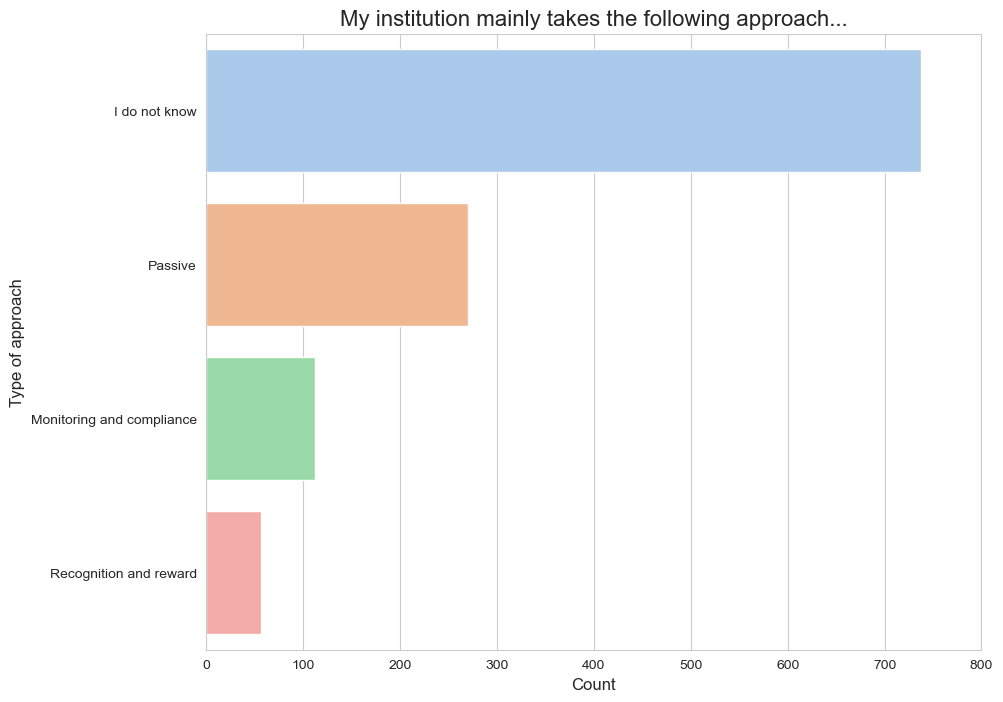

In [377]:
grouped_data = df.groupby('Q9.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q9.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
plt.xlim(0, 800)
plt.show()
#plt.savefig('../data/plots_test/owndatarepro_approach.png', bbox_inches='tight', dpi = 300)

In [378]:
#Display how many particpants haven't given an answer
count = df["Q9.10"].isna().sum()
print(count, "participants have not answered.")

1391 participants have not answered.


### Q9.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [379]:
#Count all answers and list them descending
'N=' + (df['Q9.11'].value_counts(sort=True)).astype(str)

I do not know    N=800
Ok               N=198
Not very well    N=107
Very well         N=70
Name: Q9.11, dtype: object

In [380]:
#Display how many particpants haven't given an answer
count = df["Q9.11"].isna().sum()
print(count, "participants have not answered.")

1392 participants have not answered.


### Q9.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [381]:
#Count all answers and list them descending
df['Q9.12'].value_counts(sort=True)

-                                                                                                                                    64
None                                                                                                                                 50
na                                                                                                                                   44
no                                                                                                                                   42
none                                                                                                                                 35
                                                                                                                                     ..
I guess most analysis would share code if asked but don't do so as a matter of course                                                 1
important issue                                 

### Q9.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [382]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q9.13'].value_counts(sort=True)

-                                                                                                                                                                       60
no                                                                                                                                                                      59
None                                                                                                                                                                    48
No                                                                                                                                                                      48
na                                                                                                                                                                      45
                                                                                                                                                 

## 10. Preparing according to FAIR Principles

### Q10.1 Preparing my own data, code, or other evidence according to FAIR principles is something I think has a [low, medium, high] priority in my field of research:

In [383]:
#Count all answers and list them descending
df['Q10.1'].value_counts(sort=True)

High                      445
I am not aware of this    292
Medium                    276
Low                       135
Name: Q10.1, dtype: int64

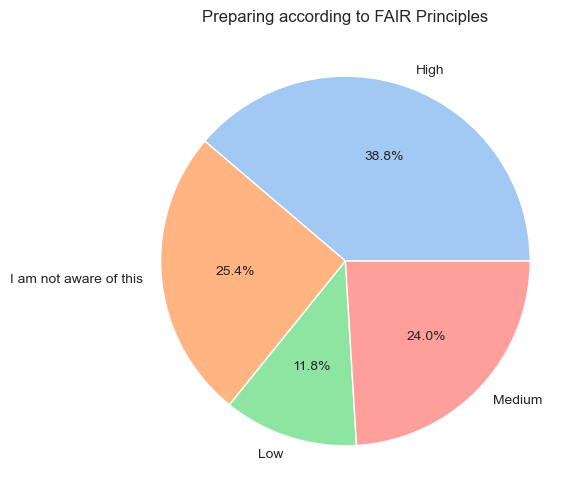

In [384]:
#Plot research methods

# Group the data by the column
grouped_data = df.groupby('Q10.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q10.1'], autopct='%1.1f%%')

# Add a title
plt.title('Preparing according to FAIR Principles')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/fair.png', bbox_inches='tight', dpi = 300, transparent=True)

In [385]:
#Display how many particpants haven't given an answer
count = df["Q10.1"].isna().sum()
print(count, "participants have not answered.")

1419 participants have not answered.


### Q10.2 I do this type of activity in my field of research:

In [386]:
print(df['Q10.2_1'].dtype)

object


In [387]:
df['Q10.2_1'] = pd.to_numeric(df['Q10.2_1'], errors='coerce').astype('Int64')

In [388]:
#Count all answers and list them
likert_data = df['Q10.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    290
1    101
2     74
3    142
4    161
5    144
6    209
Name: Q10.2_1, dtype: Int64


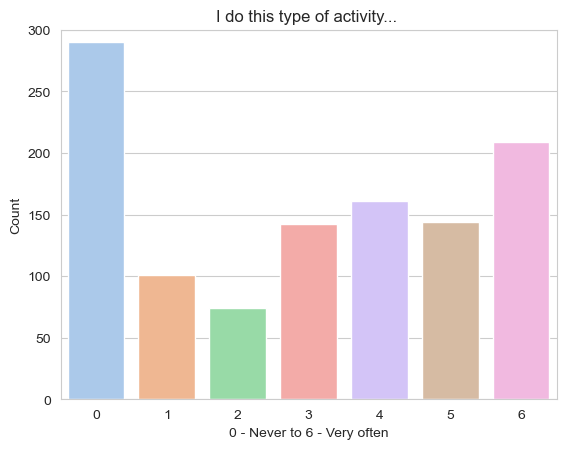

In [389]:
likert_data = df['Q10.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/FAIR_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [390]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.937555753791258
Median: 3.0
Mode: 0
Standard Deviation: 2.256266848525416
Interquartile Range: 5


In [391]:
#Display how many particpants haven't given an answer
count = df["Q10.2_1"].isna().sum()
print(count, "participants have not answered.")

1446 participants have not answered.


### Q10.3 For me, training in this topic is:

In [392]:
print(df['Q10.3_1'].dtype)

object


In [393]:
df['Q10.3_1'] = pd.to_numeric(df['Q10.3_1'], errors='coerce').astype('Int64')

In [394]:
#Count all answers and list them
likert_data = df['Q10.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    254
1     85
2     82
3    175
4    161
5    132
6    235
Name: Q10.3_1, dtype: Int64


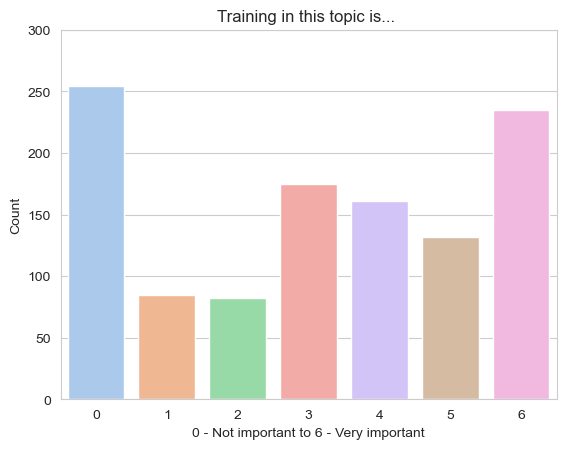

In [395]:
likert_data = df['Q10.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/FAIR_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [396]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.1032028469750887
Median: 3.0
Mode: 0
Standard Deviation: 2.213056953006233
Interquartile Range: 4


In [397]:
#Display how many particpants haven't given an answer
count = df["Q10.3_1"].isna().sum()
print(count, "participants have not answered.")

1443 participants have not answered.


### Q10.4 I have looked for training and support in this topic at my institution:

In [398]:
#Count all answers and list them descending
'N=' + (df['Q10.4'].value_counts(sort=True)).astype(str)

No                    N=963
Yes                   N=151
Yes, but not found     N=29
Name: Q10.4, dtype: object

In [399]:
#Display how many particpants haven't given an answer
count = df["Q10.4"].isna().sum()
print(count, "participants have not answered.")

1424 participants have not answered.


### Q10.5 (if Q10.4 was yes) Training at my institution is:

In [400]:
#Show type of df column
print(df['Q10.5_1'].dtype)

object


In [401]:
df['Q10.5_1'] = pd.to_numeric(df['Q10.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q10.5_1']

In [402]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.208053691275167
Median: 4.0
Mode: 5
Standard Deviation: 1.3520513333111948
Interquartile Range: 2


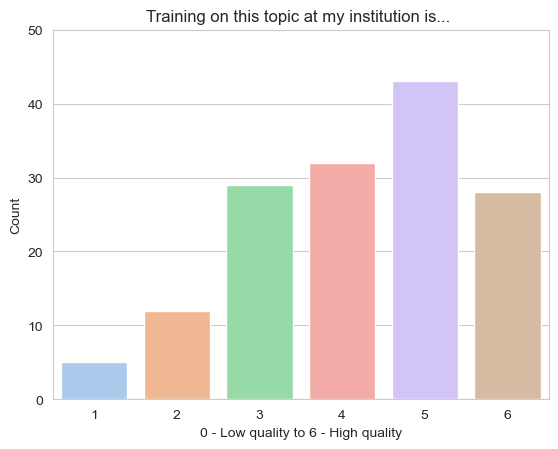

In [403]:
likert_data = df['Q10.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 50)
plt.show()
#plt.savefig('../data/plots_test/FAIR_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [404]:
#Display how many particpants haven't given an answer
count = df["Q10.5_1"].isna().sum()
print(count, "participants have not answered.")

2418 participants have not answered.


### Q10.6 Training in this topic at my institution:

In [405]:
#Count all answers and list them descending
'N=' + (df['Q10.6'].value_counts(sort=True)).astype(str)

Infrequent                                              N=39
At the right level                                      N=35
Frequent                                                N=22
Frequent,At the right level                             N=21
Infrequent,At the right level                           N=11
At too basic a level                                     N=8
Infrequent,At too basic a level                          N=5
Frequent,At too basic a level                            N=3
Infrequent,At too complex a level                        N=2
At too complex a level                                   N=2
Infrequent,At too complex a level,At the right level     N=1
At too complex a level,At too basic a level              N=1
Name: Q10.6, dtype: object

In [406]:
#Normalise the count to represent answers in percent
(df['Q10.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Infrequent                                               26.0%
At the right level                                      23.33%
Frequent                                                14.67%
Frequent,At the right level                              14.0%
Infrequent,At the right level                            7.33%
At too basic a level                                     5.33%
Infrequent,At too basic a level                          3.33%
Frequent,At too basic a level                             2.0%
Infrequent,At too complex a level                        1.33%
At too complex a level                                   1.33%
Infrequent,At too complex a level,At the right level     0.67%
At too complex a level,At too basic a level              0.67%
Name: Q10.6, dtype: object

In [407]:
#Display how many particpants haven't given an answer
count = df["Q10.6"].isna().sum()
print(count, "participants have not answered.")

2417 participants have not answered.


### Q10.7 The help at my institution on this topic is mainly:

In [408]:
#Count all answers and list them descending
'N=' + (df['Q10.7'].value_counts(sort=True)).astype(str)

Good                                                        N=38
Available                                                   N=15
Good,At the right level,Available                           N=15
Hard to access                                              N=14
At the right level                                          N=14
Good,At the right level                                     N=10
I do not know                                               N=10
Good,Available                                               N=7
At the right level,Available                                 N=5
Too basic                                                    N=4
Too basic,Available                                          N=3
Too basic,Hard to access                                     N=2
Other. Please explain:                                       N=2
Good,Non-existent                                            N=1
At the right level,Too basic,Available                       N=1
Available,I do not know  

In [409]:
#Normalise the count to represent answers in percent
(df['Q10.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        25.33%
Available                                                    10.0%
Good,At the right level,Available                            10.0%
Hard to access                                               9.33%
At the right level                                           9.33%
Good,At the right level                                      6.67%
I do not know                                                6.67%
Good,Available                                               4.67%
At the right level,Available                                 3.33%
Too basic                                                    2.67%
Too basic,Available                                           2.0%
Too basic,Hard to access                                     1.33%
Other. Please explain:                                       1.33%
Good,Non-existent                                            0.67%
At the right level,Too basic,Available                       0

In [410]:
#Display how many particpants haven't given an answer
count = df["Q10.7"].isna().sum()
print(count, "participants have not answered.")

2417 participants have not answered.


### Q10.7_TEXT

In [411]:
#Count all answers and list them descending
df['Q10.7_8_TEXT'].value_counts(sort=True)

Pgrs seem completely unaware if importance                                                                                                                                                           1
Not tailored to my discipline.                                                                                                                                                                       1
Excellent                                                                                                                                                                                            1
not at the right level                                                                                                                                                                               1
There is little appreciation that putting data into e.g. "OneNote" does not ensure ready access in 10 years time. Essentially zero awareness of meta data by most P.I.s, and still less interest.    1
Name:

### Q10.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [412]:
#Count all answers and list them descending
df['Q10.8'].value_counts(sort=True)

No     1034
Yes     108
Name: Q10.8, dtype: int64

### Q10.9 Where have you looked for training and support?

In [413]:
#Count all answers and list them descending
df['Q10.9'].value_counts(sort=True)

online                                               11
Online                                                5
Internet                                              4
HDR UK                                                2
Various                                               2
                                                     ..
in the country of data collection                     1
Online tutorials, blogs, YouTube, Twitter, Google     1
Cambridge University                                  1
online training                                       1
Open Research Module at the University of Surrey      1
Name: Q10.9, Length: 86, dtype: int64

### Q10.10 My institution takes mainly the following approach to this topic:

In [414]:
#Count all answers and list them descending
'N=' + (df['Q10.10'].value_counts(sort=True)).astype(str)

I do not know                N=719
Passive                      N=227
Monitoring and compliance    N=132
Recognition and reward        N=61
Name: Q10.10, dtype: object

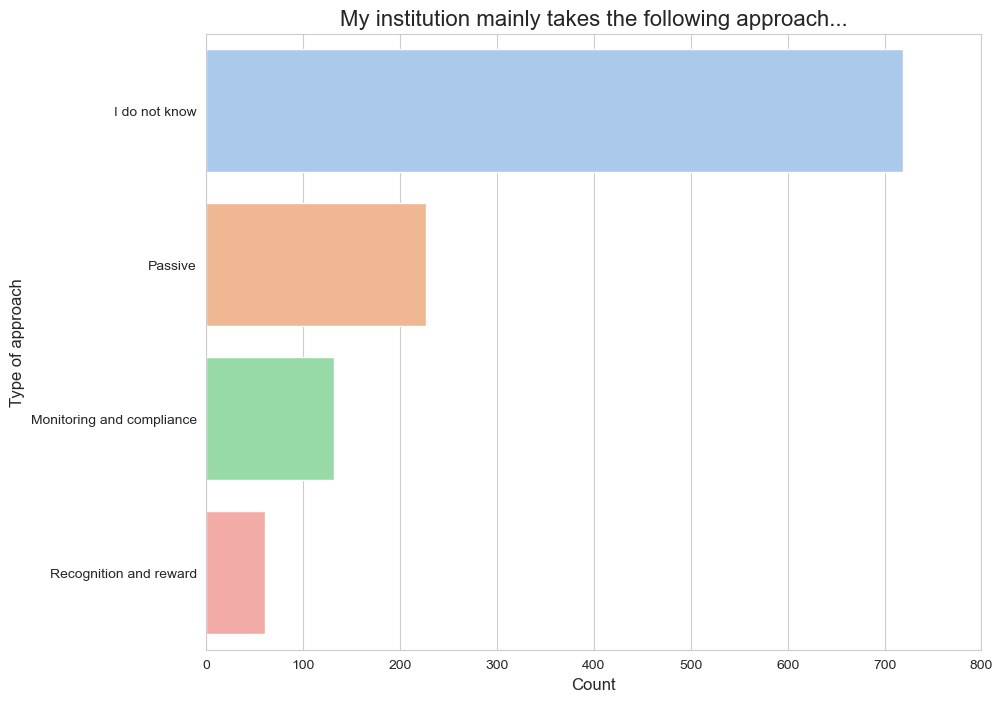

In [415]:
grouped_data = df.groupby('Q10.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q10.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
plt.xlim(0, 800)
plt.show()
#plt.savefig('../data/plots_test/fair_approach.png', bbox_inches='tight', dpi = 300)

In [416]:
#Normalise the count to represent answers in percent
(df['Q10.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                63.13%
Passive                      19.93%
Monitoring and compliance    11.59%
Recognition and reward        5.36%
Name: Q10.10, dtype: object

In [417]:
#Display how many particpants haven't given an answer
count = df["Q10.10"].isna().sum()
print(count, "participants have not answered.")

1428 participants have not answered.


### Q10.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [418]:
#Count all answers and list them descending
'N=' + (df['Q10.11'].value_counts(sort=True)).astype(str)

I do not know    N=777
Ok               N=201
Not very well    N=108
Very well         N=53
Name: Q10.11, dtype: object

In [419]:
#Display how many particpants haven't given an answer
count = df["Q10.11"].isna().sum()
print(count, "participants have not answered.")

1428 participants have not answered.


### Q10.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [420]:
#Count all answers and list them descending
df['Q10.12'].value_counts(sort=True)

-                                                                                                                                                                    63
no                                                                                                                                                                   45
None                                                                                                                                                                 44
na                                                                                                                                                                   43
No                                                                                                                                                                   33
                                                                                                                                                                

### Q10.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [421]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q10.13'].value_counts(sort=True)

-                                                                                                                                                                                                              56
no                                                                                                                                                                                                             54
No                                                                                                                                                                                                             51
None                                                                                                                                                                                                           44
none                                                                                                                                                            

## 11. Guidelines for Recognising Contributions

### Q11.1 Guidelines for recognising the specific substantive contribution of everyone involved in a research project is something I think has a [low, medium, high] priority in my field of research:

In [422]:
#Count all answers and list them descending
df['Q11.1'].value_counts(sort=True)

High                      539
Medium                    345
Low                       167
I am not aware of this     68
Name: Q11.1, dtype: int64

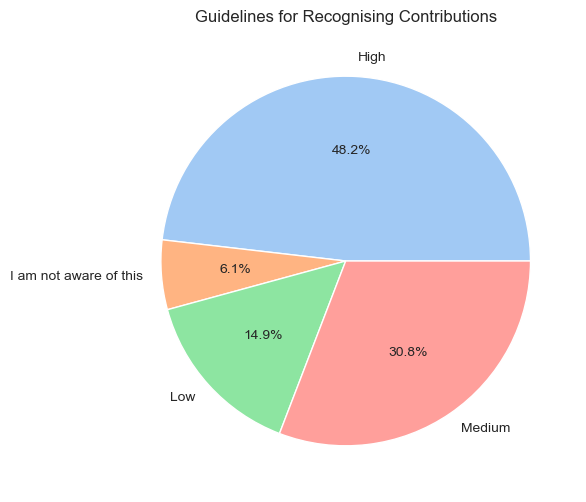

In [423]:
# Group the data by the column
grouped_data = df.groupby('Q11.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q11.1'], autopct='%1.1f%%')

# Add a title
plt.title('Guidelines for Recognising Contributions')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/contributions.png', bbox_inches='tight', dpi = 300, transparent=True)

In [424]:
#Display how many particpants haven't given an answer
count = df["Q11.1"].isna().sum()
print(count, "participants have not answered.")

1448 participants have not answered.


### Q11.2 I do this type of activity in my field of research:

In [425]:
print(df['Q11.2_1'].dtype)

object


In [426]:
df['Q11.2_1'] = pd.to_numeric(df['Q11.2_1'], errors='coerce').astype('Int64')

In [427]:
#Count all answers and list them
likert_data = df['Q11.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    112
1     82
2     85
3    161
4    163
5    172
6    333
Name: Q11.2_1, dtype: Int64


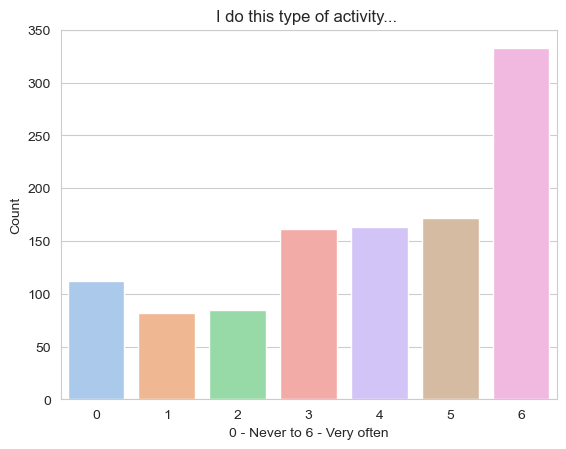

In [428]:
likert_data = df['Q11.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 350)
plt.show()
#plt.savefig('../data/plots_test/contributions_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [429]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.8312274368231045
Median: 4.0
Mode: 6
Standard Deviation: 2.016964978425966
Interquartile Range: 4


In [430]:
#Display how many particpants haven't given an answer
count = df["Q11.2_1"].isna().sum()
print(count, "participants have not answered.")

1459 participants have not answered.


### Q11.3 For me, training in this topic is:

In [431]:
print(df['Q11.3_1'].dtype)

object


In [432]:
df['Q11.3_1'] = pd.to_numeric(df['Q11.3_1'], errors='coerce').astype('Int64')

In [433]:
#Count all answers and list them
likert_data = df['Q11.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    158
1    137
2    115
3    184
4    150
5    134
6    227
Name: Q11.3_1, dtype: Int64


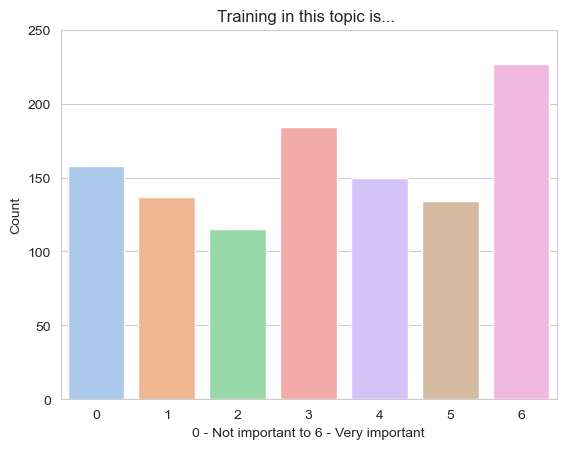

In [434]:
likert_data = df['Q11.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 250)
plt.show()
#plt.savefig('../data/plots_test/contributions_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [435]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.2135746606334843
Median: 3.0
Mode: 6
Standard Deviation: 2.077222133899077
Interquartile Range: 4


In [436]:
#Display how many particpants haven't given an answer
count = df["Q11.3_1"].isna().sum()
print(count, "participants have not answered.")

1462 participants have not answered.


### Q11.4 I have looked for training and support in this topic at my institution:

In [437]:
#Count all answers and list them descending
'N=' + (df['Q11.4'].value_counts(sort=True)).astype(str)

No                    N=976
Yes                    N=98
Yes, but not found     N=43
Name: Q11.4, dtype: object

In [438]:
#Display how many particpants haven't given an answer
count = df["Q11.4"].isna().sum()
print(count, "participants have not answered.")

1450 participants have not answered.


### Q11.5 (if Q11.4 was yes) Training at my institution is:

In [439]:
#Show type of df column
print(df['Q11.5_1'].dtype)

object


In [440]:
df['Q11.5_1'] = pd.to_numeric(df['Q11.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q11.5_1']

In [441]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.242105263157895
Median: 5.0
Mode: 6
Standard Deviation: 1.6676891227319282
Interquartile Range: 3


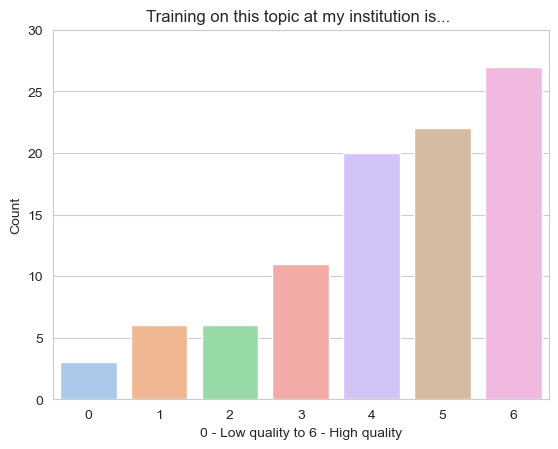

In [442]:
likert_data = df['Q11.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 30)
plt.show()
#plt.savefig('../data/plots_test/contributions_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [443]:
#Display how many particpants haven't given an answer
count = df["Q11.5_1"].isna().sum()
print(count, "participants have not answered.")

2472 participants have not answered.


### Q11.6 Training in this topic at my institution:

In [444]:
#Count all answers and list them descending
'N=' + (df['Q11.6'].value_counts(sort=True)).astype(str)

At the right level                 N=30
Infrequent                         N=25
Frequent                           N=15
Frequent,At the right level        N=14
Infrequent,At the right level       N=7
At too basic a level                N=3
Frequent,At too complex a level     N=1
Infrequent,At too basic a level     N=1
At too complex a level              N=1
Name: Q11.6, dtype: object

In [445]:
#Normalise the count to represent answers in percent
(df['Q11.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                 30.93%
Infrequent                         25.77%
Frequent                           15.46%
Frequent,At the right level        14.43%
Infrequent,At the right level       7.22%
At too basic a level                3.09%
Frequent,At too complex a level     1.03%
Infrequent,At too basic a level     1.03%
At too complex a level              1.03%
Name: Q11.6, dtype: object

In [446]:
#Display how many particpants haven't given an answer
count = df["Q11.6"].isna().sum()
print(count, "participants have not answered.")

2470 participants have not answered.


### Q11.7 The help at my institution on this topic is mainly:

In [447]:
#Count all answers and list them descending
'N=' + (df['Q11.7'].value_counts(sort=True)).astype(str)

Good                                                        N=31
Available                                                   N=15
Non-existent                                                 N=9
Good,At the right level,Available                            N=8
At the right level                                           N=7
Good,At the right level                                      N=6
Good,Available                                               N=5
Too basic                                                    N=4
Hard to access                                               N=3
Non-existent,Hard to access                                  N=2
At the right level,Available                                 N=2
I do not know                                                N=2
At the right level,Hard to access                            N=1
Good,At the right level,Available,Other. Please explain:     N=1
Good,Other. Please explain:                                  N=1
Other. Please explain:   

In [448]:
#Normalise the count to represent answers in percent
(df['Q11.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        31.63%
Available                                                   15.31%
Non-existent                                                 9.18%
Good,At the right level,Available                            8.16%
At the right level                                           7.14%
Good,At the right level                                      6.12%
Good,Available                                                5.1%
Too basic                                                    4.08%
Hard to access                                               3.06%
Non-existent,Hard to access                                  2.04%
At the right level,Available                                 2.04%
I do not know                                                2.04%
At the right level,Hard to access                            1.02%
Good,At the right level,Available,Other. Please explain:     1.02%
Good,Other. Please explain:                                  1

In [449]:
#Display how many particpants haven't given an answer
count = df["Q11.7"].isna().sum()
print(count, "participants have not answered.")

2469 participants have not answered.


### Q11.7_TEXT

In [450]:
#Count all answers and list them descending
df['Q11.7_8_TEXT'].value_counts(sort=True)

Excellent                                                                1
we received training from our PI which was very useful                   1
As a group of PIs we provide our own training on this to our students    1
Name: Q11.7_8_TEXT, dtype: int64

### Q11.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [451]:
#Count all answers and list them descending
df['Q11.8'].value_counts(sort=True)

No     1029
Yes      87
Name: Q11.8, dtype: int64

### Q11.9 Where have you looked for training and support?

In [452]:
#Count all answers and list them descending
df['Q11.9'].value_counts(sort=True)

online                                                                                                                                                                    5
Online                                                                                                                                                                    4
Internet                                                                                                                                                                  2
Online guidance                                                                                                                                                           2
For publishing purposes or conferences, using guidance from individual journals or event organisers.                                                                      1
                                                                                                                                            

### Q11.10 My institution takes mainly the following approach to this topic:

In [453]:
#Count all answers and list them descending
'N=' + (df['Q11.10'].value_counts(sort=True)).astype(str)

I do not know                N=627
Passive                      N=311
Monitoring and compliance    N=107
Recognition and reward        N=65
Name: Q11.10, dtype: object

In [454]:
#Normalise the count to represent answers in percent
(df['Q11.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                56.49%
Passive                      28.02%
Monitoring and compliance     9.64%
Recognition and reward        5.86%
Name: Q11.10, dtype: object

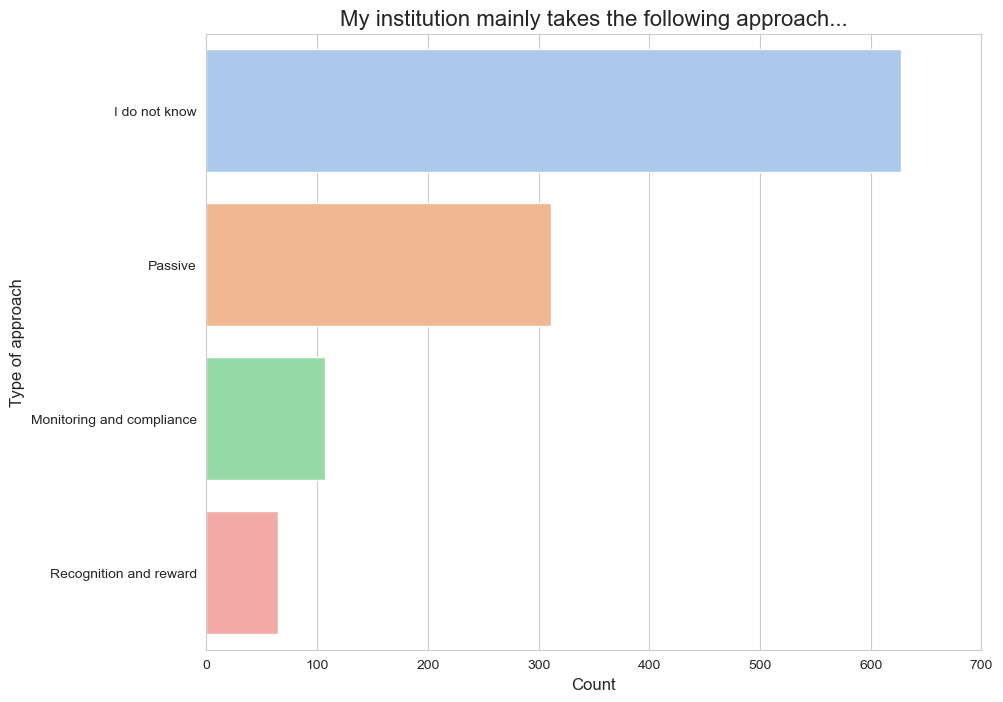

In [455]:
grouped_data = df.groupby('Q11.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q11.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
plt.xlim(0, 700)
plt.show()
#plt.savefig('../data/plots_test/contributions_approach.png', bbox_inches='tight', dpi = 300)

In [456]:
#Display how many particpants haven't given an answer
count = df["Q11.10"].isna().sum()
print(count, "participants have not answered.")

1457 participants have not answered.


### Q11.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [457]:
#Count all answers and list them descending
'N=' + (df['Q11.11'].value_counts(sort=True)).astype(str)

I do not know    N=686
Ok               N=209
Not very well    N=144
Very well         N=69
Name: Q11.11, dtype: object

In [458]:
#Display how many particpants haven't given an answer
count = df["Q11.11"].isna().sum()
print(count, "participants have not answered.")

1459 participants have not answered.


### Q11.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [459]:
#Count all answers and list them descending
df['Q11.12'].value_counts(sort=True)

-                                                                                                                                                                                                                                                                                                                                56
na                                                                                                                                                                                                                                                                                                                               42
None                                                                                                                                                                                                                                                                                                                             40
no                          

### Q11.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [460]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q11.13'].value_counts(sort=True)

-                                                                                                                                                                                                                                               52
None                                                                                                                                                                                                                                            44
No                                                                                                                                                                                                                                              43
no                                                                                                                                                                                                                                              43
na                          

## 12. Declaring Conflicts of Interest

### Q12.1 Declaring conflicts of interest is something I think has a [low, medium, high] priority in my field of research:

In [461]:
#Count all answers and list them descending
df['Q12.1'].value_counts(sort=True)

High                      727
Medium                    233
Low                       118
I am not aware of this     24
Name: Q12.1, dtype: int64

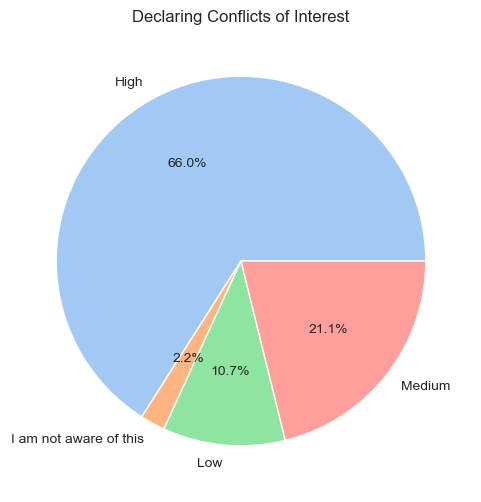

In [462]:
# Group the data by the column
grouped_data = df.groupby('Q12.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q12.1'], autopct='%1.1f%%')

# Add a title
plt.title('Declaring Conflicts of Interest')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/conflicts.png', bbox_inches='tight', dpi = 300, transparent=True)

In [463]:
#Display how many particpants haven't given an answer
count = df["Q12.1"].isna().sum()
print(count, "participants have not answered.")

1465 participants have not answered.


### Q12.2 I do this type of activity in my field of research:

In [464]:
print(df['Q12.2_1'].dtype)

object


In [465]:
df['Q12.2_1'] = pd.to_numeric(df['Q12.2_1'], errors='coerce').astype('Int64')

In [466]:
#Count all answers and list them
likert_data = df['Q12.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    130
1     87
2     55
3    105
4     91
5    124
6    499
Name: Q12.2_1, dtype: Int64


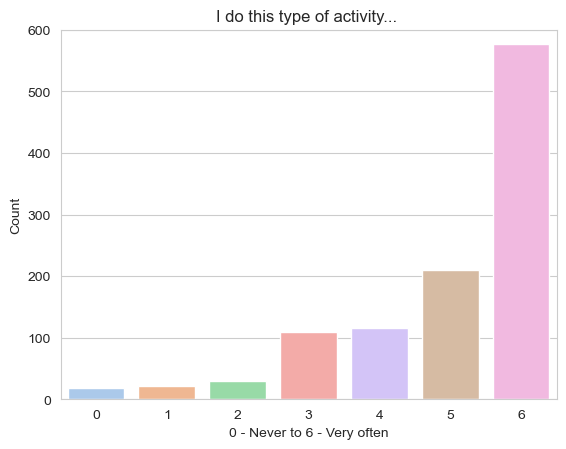

In [593]:
ikert_data = df['Q12.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 600)
plt.show()
#plt.savefig('../data/plots_test/conflicts_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [468]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.1154903758020165
Median: 5.0
Mode: 6
Standard Deviation: 2.203718336588726
Interquartile Range: 3


In [469]:
#Display how many particpants haven't given an answer
count = df["Q12.2_1"].isna().sum()
print(count, "participants have not answered.")

1476 participants have not answered.


### Q12.3 For me, training in this topic is:

In [470]:
print(df['Q12.3_1'].dtype)

object


In [471]:
df['Q12.3_1'] = pd.to_numeric(df['Q12.3_1'], errors='coerce').astype('Int64')

In [472]:
#Count all answers and list them
likert_data = df['Q12.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    160
1    136
2     92
3    217
4    144
5    102
6    235
Name: Q12.3_1, dtype: Int64


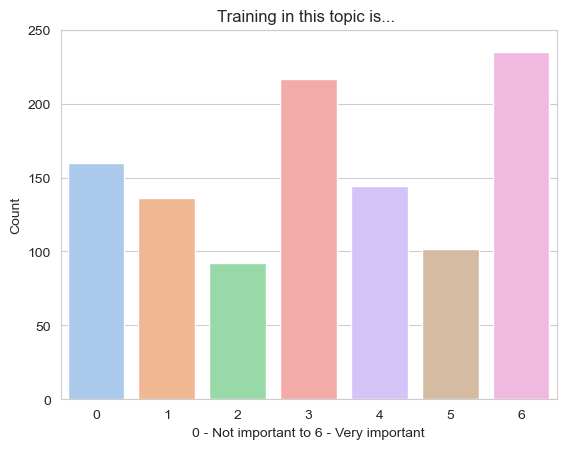

In [473]:
likert_data = df['Q12.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 250)
plt.show()
#plt.savefig('../data/plots_test/conflicts_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [474]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.192449355432781
Median: 3.0
Mode: 6
Standard Deviation: 2.081912025462306
Interquartile Range: 4


In [475]:
#Display how many particpants haven't given an answer
count = df["Q12.3_1"].isna().sum()
print(count, "participants have not answered.")

1481 participants have not answered.


### Q12.4 I have looked for training and support in this topic at my institution:

In [476]:
#Count all answers and list them descending
'N=' + (df['Q12.4'].value_counts(sort=True)).astype(str)

No                    N=906
Yes                   N=168
Yes, but not found     N=27
Name: Q12.4, dtype: object

In [477]:
#Display how many particpants haven't given an answer
count = df["Q12.4"].isna().sum()
print(count, "participants have not answered.")

1466 participants have not answered.


### Q12.5 (if Q12.4 was yes) Training at my institution is:

In [478]:
#Show type of df column
print(df['Q12.5_1'].dtype)

object


In [479]:
df['Q12.5_1'] = pd.to_numeric(df['Q12.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q12.5_1']

In [480]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.403614457831325
Median: 5.0
Mode: 6
Standard Deviation: 1.4269225867713318
Interquartile Range: 2


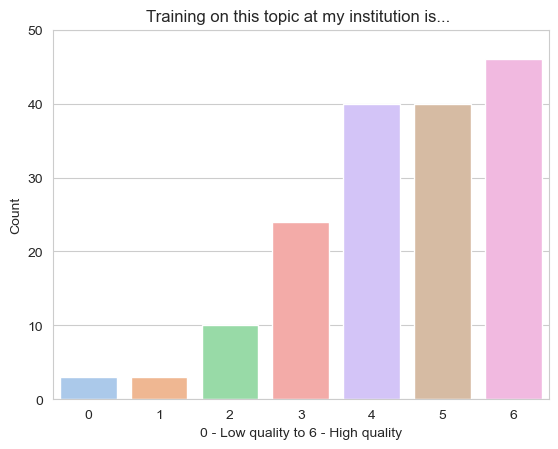

In [481]:
likert_data = df['Q12.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 50)
plt.show()
#plt.savefig('../data/plots_test/conflicts_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [482]:
#Display how many particpants haven't given an answer
count = df["Q12.5_1"].isna().sum()
print(count, "participants have not answered.")

2401 participants have not answered.


### Q12.6 Training in this topic at my institution:

In [483]:
#Count all answers and list them descending
'N=' + (df['Q12.6'].value_counts(sort=True)).astype(str)

At the right level                           N=67
Frequent,At the right level                  N=30
Frequent                                     N=25
Infrequent                                   N=24
Infrequent,At the right level                 N=9
At too basic a level                          N=5
Infrequent,At too basic a level               N=4
Frequent,At too basic a level                 N=1
Frequent,At too complex a level               N=1
At too complex a level,At the right level     N=1
Name: Q12.6, dtype: object

In [484]:
#Normalise the count to represent answers in percent
(df['Q12.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                           40.12%
Frequent,At the right level                  17.96%
Frequent                                     14.97%
Infrequent                                   14.37%
Infrequent,At the right level                 5.39%
At too basic a level                          2.99%
Infrequent,At too basic a level                2.4%
Frequent,At too basic a level                  0.6%
Frequent,At too complex a level                0.6%
At too complex a level,At the right level      0.6%
Name: Q12.6, dtype: object

In [485]:
#Display how many particpants haven't given an answer
count = df["Q12.6"].isna().sum()
print(count, "participants have not answered.")

2400 participants have not answered.


### Q12.7 The help at my institution on this topic is mainly:

In [486]:
#Count all answers and list them descending
'N=' + (df['Q12.7'].value_counts(sort=True)).astype(str)

Good                                                        N=56
Good,At the right level,Available                           N=21
At the right level                                          N=20
Available                                                   N=19
I do not know                                               N=12
Good,Available                                               N=9
At the right level,Available                                 N=6
Non-existent                                                 N=5
Too basic                                                    N=5
Good,At the right level                                      N=5
Hard to access                                               N=2
Other. Please explain:                                       N=2
Good,At the right level,Available,Other. Please explain:     N=1
Available,Other. Please explain:                             N=1
Good,Too basic,I do not know                                 N=1
Too basic,Available      

In [487]:
#Normalise the count to represent answers in percent
(df['Q12.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        33.73%
Good,At the right level,Available                           12.65%
At the right level                                          12.05%
Available                                                   11.45%
I do not know                                                7.23%
Good,Available                                               5.42%
At the right level,Available                                 3.61%
Non-existent                                                 3.01%
Too basic                                                    3.01%
Good,At the right level                                      3.01%
Hard to access                                                1.2%
Other. Please explain:                                        1.2%
Good,At the right level,Available,Other. Please explain:      0.6%
Available,Other. Please explain:                              0.6%
Good,Too basic,I do not know                                  

In [488]:
#Display how many particpants haven't given an answer
count = df["Q12.7"].isna().sum()
print(count, "participants have not answered.")

2401 participants have not answered.


### Q12.7_TEXT

In [489]:
#Count all answers and list them descending
df['Q12.7_8_TEXT'].value_counts(sort=True)

Excellent                                                                                                         1
Not tailored to my field                                                                                          1
The risk of litigation is perhaps why (unusually) COI is something given more emphasis at Institutional Level.    1
It varies depending on the specific example                                                                       1
Name: Q12.7_8_TEXT, dtype: int64

### Q12.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [490]:
#Count all answers and list them descending
df['Q12.8'].value_counts(sort=True)

No     1042
Yes      58
Name: Q12.8, dtype: int64

### Q12.9 Where have you looked for training and support?

In [491]:
#Count all answers and list them descending
df['Q12.9'].value_counts(sort=True)

Online                                                                                                                    2
Colleagues, blogs etc.                                                                                                    1
ASKED COLLEAGUES                                                                                                          1
Internet search on definitions                                                                                            1
On line                                                                                                                   1
journal editors, to check if I'm ok to review a paper if my professor has worked with some of the authors.                1
Third party - Epigeum's online courses                                                                                    1
In the submission guidelines for the journals we were submitting to                                                       1
reading 

### Q12.10 My institution takes mainly the following approach to this topic:

In [492]:
#Count all answers and list them descending
'N=' + (df['Q12.10'].value_counts(sort=True)).astype(str)

I do not know                N=540
Monitoring and compliance    N=322
Passive                      N=192
Recognition and reward        N=44
Name: Q12.10, dtype: object

In [493]:
#Normalise the count to represent answers in percent
(df['Q12.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                49.18%
Monitoring and compliance    29.33%
Passive                      17.49%
Recognition and reward        4.01%
Name: Q12.10, dtype: object

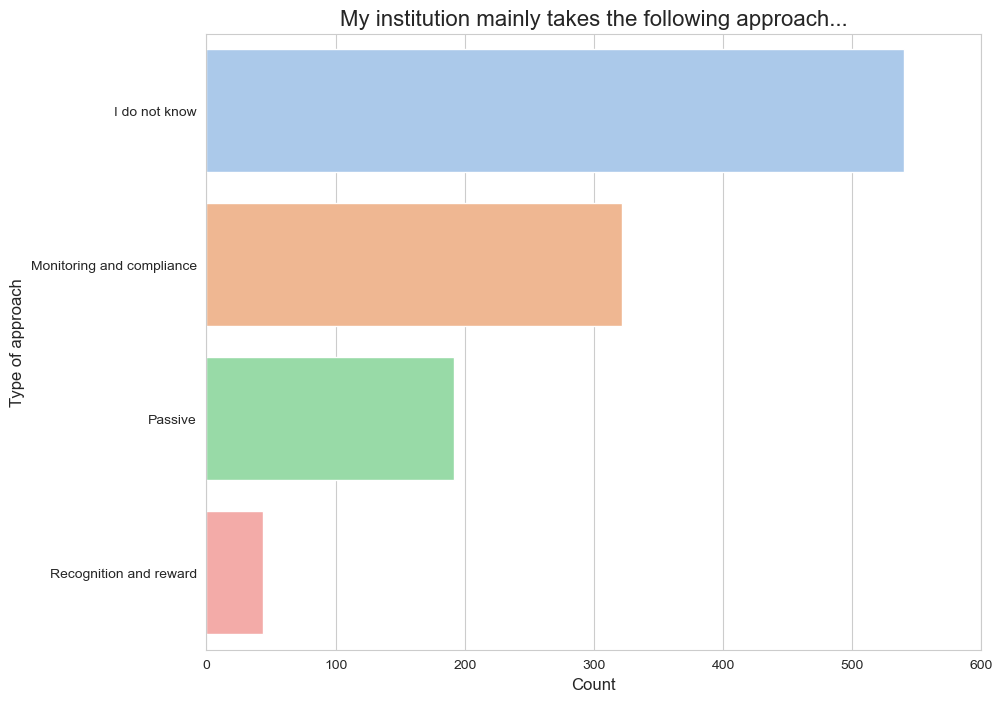

In [494]:
grouped_data = df.groupby('Q12.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q12.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
plt.xlim(0, 600)
plt.show()
#plt.savefig('../data/plots_test/conflicts_approach.png', bbox_inches='tight', dpi = 300)

In [495]:
#Display how many particpants haven't given an answer
count = df["Q12.10"].isna().sum()
print(count, "participants have not answered.")

1469 participants have not answered.


### Q12.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [496]:
#Count all answers and list them descending
'N=' + (df['Q12.11'].value_counts(sort=True)).astype(str)

I do not know    N=650
Ok               N=269
Very well        N=111
Not very well     N=67
Name: Q12.11, dtype: object

In [497]:
#Display how many particpants haven't given an answer
count = df["Q12.11"].isna().sum()
print(count, "participants have not answered.")

1470 participants have not answered.


### Q12.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [498]:
#Count all answers and list them descending
df['Q12.12'].value_counts(sort=True)

-                                                                                   64
None                                                                                49
na                                                                                  44
no                                                                                  42
none                                                                                39
                                                                                    ..
Key for clinical trials                                                              1
Not a risk for my research                                                           1
Essential for good governance                                                        1
System at my institution for declaring interests is clunky and difficult to use.     1
Not Sure                                                                             1
Name: Q12.12, Length: 291, dtype: int64

### Q12.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [499]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q12.13'].value_counts(sort=True)

-                                                                                                                                                                     59
None                                                                                                                                                                  47
No                                                                                                                                                                    47
no                                                                                                                                                                    46
none                                                                                                                                                                  45
                                                                                                                                                           

## 13. Pre-prints

### Q13.1 Publishing pre-prints is something I think has a [low, medium, high] priority in my field of research:

In [500]:
#Count all answers and list them descending
df['Q13.1'].value_counts(sort=True)

Medium                    375
High                      346
Low                       280
I am not aware of this     92
Name: Q13.1, dtype: int64

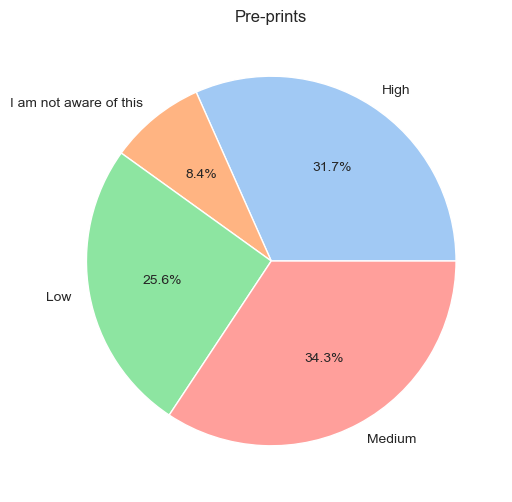

In [501]:
# Group the data by the column
grouped_data = df.groupby('Q13.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q13.1'], autopct='%1.1f%%')

# Add a title
plt.title('Pre-prints')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/preprints.png', bbox_inches='tight', dpi = 300, transparent=True)

In [502]:
#Display how many particpants haven't given an answer
count = df["Q13.1"].isna().sum()
print(count, "participants have not answered.")

1474 participants have not answered.


### Q13.2 I do this type of activity in my field of research:

In [503]:
print(df['Q13.2_1'].dtype)

object


In [504]:
df['Q13.2_1'] = pd.to_numeric(df['Q13.2_1'], errors='coerce').astype('Int64')

In [505]:
#Count all answers and list them
likert_data = df['Q13.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    294
1    139
2     90
3    124
4    115
5    105
6    216
Name: Q13.2_1, dtype: Int64


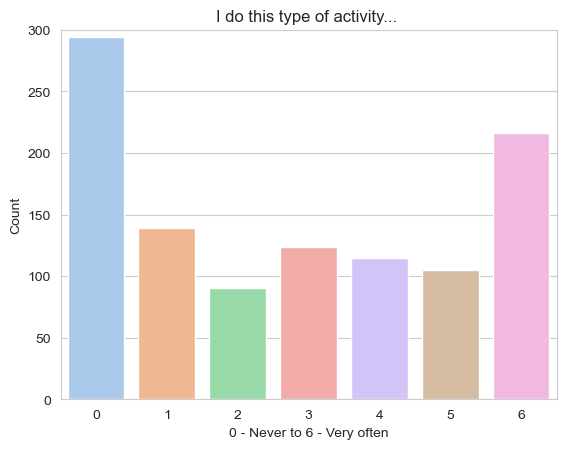

In [506]:
likert_data = df['Q13.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/preprints_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [507]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.7442289935364728
Median: 3.0
Mode: 0
Standard Deviation: 2.2952477286892665
Interquartile Range: 5


In [508]:
#Display how many particpants haven't given an answer
count = df["Q13.2_1"].isna().sum()
print(count, "participants have not answered.")

1484 participants have not answered.


### Q13.3 For me, training in this topic is:

In [509]:
print(df['Q13.3_1'].dtype)

object


In [510]:
df['Q13.3_1'] = pd.to_numeric(df['Q13.3_1'], errors='coerce').astype('Int64')

In [511]:
#Count all answers and list them
likert_data = df['Q13.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    281
1    174
2    124
3    188
4    122
5     70
6    119
Name: Q13.3_1, dtype: Int64


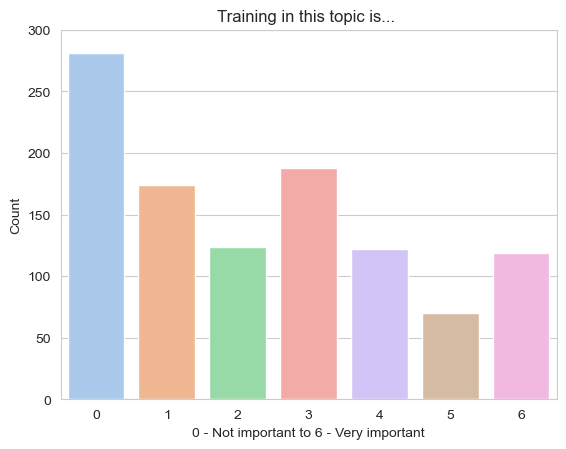

In [512]:
likert_data = df['Q13.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/preprints_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [513]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.354359925788497
Median: 2.0
Mode: 0
Standard Deviation: 2.0149475107495842
Interquartile Range: 4


In [514]:
#Display how many particpants haven't given an answer
count = df["Q13.3_1"].isna().sum()
print(count, "participants have not answered.")

1489 participants have not answered.


### Q13.4 I have looked for training and support in this topic at my institution:

In [515]:
#Count all answers and list them descending
'N=' + (df['Q13.4'].value_counts(sort=True)).astype(str)

No                    N=986
Yes                    N=80
Yes, but not found     N=28
Name: Q13.4, dtype: object

In [516]:
#Display how many particpants haven't given an answer
count = df["Q13.4"].isna().sum()
print(count, "participants have not answered.")

1473 participants have not answered.


### Q13.5 (if Q13.4 was yes) Training at my institution is:

In [517]:
#Show type of df column
print(df['Q13.5_1'].dtype)

object


In [518]:
df['Q13.5_1'] = pd.to_numeric(df['Q13.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q13.5_1']

In [519]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.911392405063291
Median: 4.0
Mode: 4
Standard Deviation: 1.5374794008853274
Interquartile Range: 2


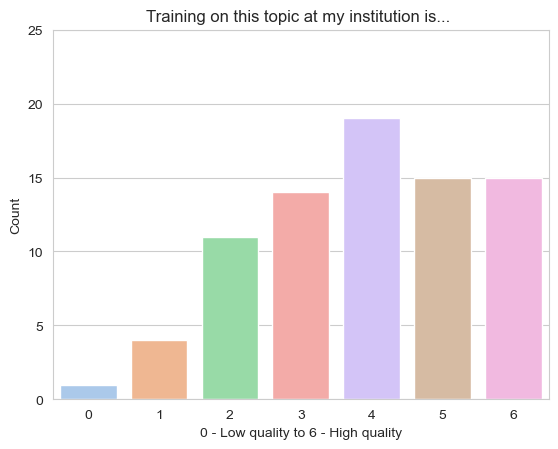

In [520]:
likert_data = df['Q13.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 25)
plt.show()
#plt.savefig('../data/plots_test/preprints_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [521]:
#Display how many particpants haven't given an answer
count = df["Q13.5_1"].isna().sum()
print(count, "participants have not answered.")

2488 participants have not answered.


### Q13.6 Training in this topic at my institution:

In [522]:
#Count all answers and list them descending
'N=' + (df['Q13.6'].value_counts(sort=True)).astype(str)

At the right level                 N=23
Infrequent                         N=21
Frequent,At the right level        N=12
Frequent                           N=10
Infrequent,At the right level       N=7
At too basic a level                N=5
Infrequent,At too basic a level     N=1
Name: Q13.6, dtype: object

In [523]:
#Normalise the count to represent answers in percent
(df['Q13.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                 29.11%
Infrequent                         26.58%
Frequent,At the right level        15.19%
Frequent                           12.66%
Infrequent,At the right level       8.86%
At too basic a level                6.33%
Infrequent,At too basic a level     1.27%
Name: Q13.6, dtype: object

In [524]:
#Display how many particpants haven't given an answer
count = df["Q13.6"].isna().sum()
print(count, "participants have not answered.")

2488 participants have not answered.


### Q13.7 The help at my institution on this topic is mainly:

In [525]:
#Count all answers and list them descending
'N=' + (df['Q13.7'].value_counts(sort=True)).astype(str)

Good                                 N=24
Available                            N=12
Good,At the right level,Available     N=9
At the right level                    N=8
Non-existent                          N=5
I do not know                         N=5
Too basic                             N=5
Hard to access                        N=4
Good,Available                        N=3
Too basic,Hard to access              N=2
At the right level,Hard to access     N=1
Good,At the right level               N=1
At the right level,Available          N=1
Name: Q13.7, dtype: object

In [526]:
#Normalise the count to represent answers in percent
(df['Q13.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                  30.0%
Available                             15.0%
Good,At the right level,Available    11.25%
At the right level                    10.0%
Non-existent                          6.25%
I do not know                         6.25%
Too basic                             6.25%
Hard to access                         5.0%
Good,Available                        3.75%
Too basic,Hard to access               2.5%
At the right level,Hard to access     1.25%
Good,At the right level               1.25%
At the right level,Available          1.25%
Name: Q13.7, dtype: object

In [527]:
#Display how many particpants haven't given an answer
count = df["Q13.7"].isna().sum()
print(count, "participants have not answered.")

2487 participants have not answered.


### Q13.7_TEXT

In [528]:
#Count all answers and list them descending
df['Q13.7_8_TEXT'].value_counts(sort=True)

Series([], Name: Q13.7_8_TEXT, dtype: int64)

### Q13.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [529]:
#Count all answers and list them descending
df['Q13.8'].value_counts(sort=True)

No     1020
Yes      72
Name: Q13.8, dtype: int64

### Q13.9 Where have you looked for training and support?

In [530]:
#Count all answers and list them descending
df['Q13.9'].value_counts(sort=True)

online                                                                                                                         5
Online                                                                                                                         5
arXiv                                                                                                                          2
previous institution                                                                                                           2
Searching for advice online                                                                                                    1
Preprint servers, guides by colleagues, elsewhere online                                                                       1
Online sessions through publishers                                                                                             1
ASAPBio                                                                                          

### Q13.10 My institution takes mainly the following approach to this topic:

In [531]:
#Count all answers and list them descending
'N=' + (df['Q13.10'].value_counts(sort=True)).astype(str)

I do not know                N=661
Passive                      N=270
Monitoring and compliance    N=100
Recognition and reward        N=62
Name: Q13.10, dtype: object

In [532]:
#Normalise the count to represent answers in percent
(df['Q13.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                60.48%
Passive                       24.7%
Monitoring and compliance     9.15%
Recognition and reward        5.67%
Name: Q13.10, dtype: object

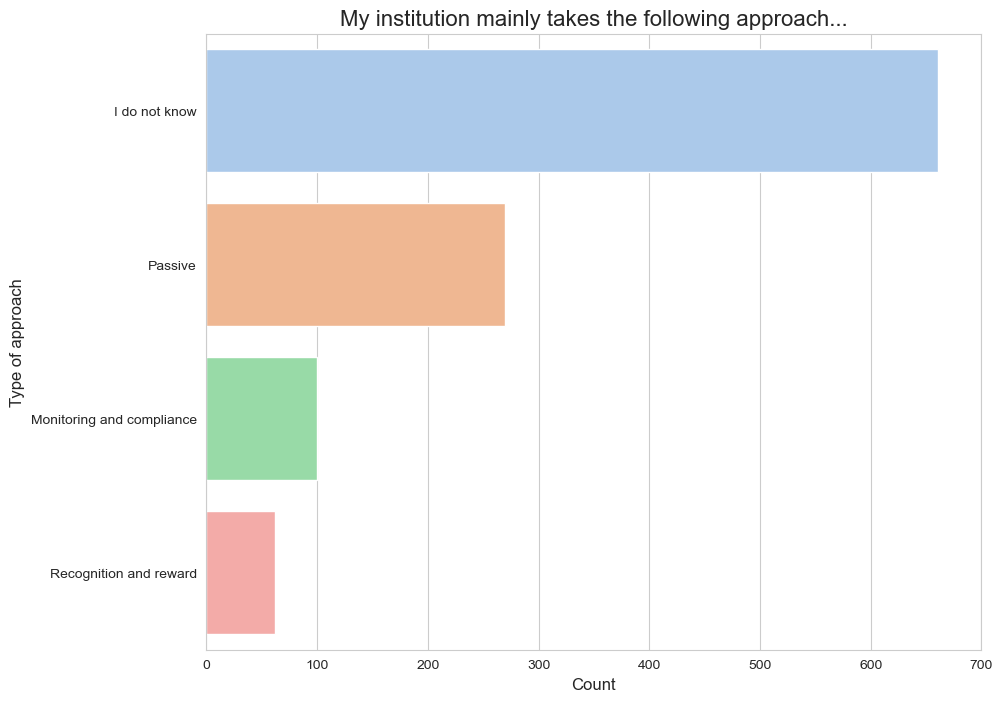

In [533]:
grouped_data = df.groupby('Q13.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q13.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
plt.xlim(0, 700)
plt.show()
#plt.savefig('../data/plots_test/preprints_approach.png', bbox_inches='tight', dpi = 300)

In [534]:
#Display how many particpants haven't given an answer
count = df["Q13.10"].isna().sum()
print(count, "participants have not answered.")

1474 participants have not answered.


### Q13.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [535]:
#Count all answers and list them descending
'N=' + (df['Q13.11'].value_counts(sort=True)).astype(str)

I do not know    N=739
Ok               N=196
Not very well     N=89
Very well         N=69
Name: Q13.11, dtype: object

In [536]:
#Display how many particpants haven't given an answer
count = df["Q13.11"].isna().sum()
print(count, "participants have not answered.")

1474 participants have not answered.


### Q13.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [537]:
#Count all answers and list them descending
df['Q13.12'].value_counts(sort=True)

-                                                                                                                                                                57
none                                                                                                                                                             42
na                                                                                                                                                               40
None                                                                                                                                                             39
no                                                                                                                                                               37
                                                                                                                                                                 ..
unclear question

### Q13.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [538]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q13.13'].value_counts(sort=True)

-                                                                                                                                                                                51
no                                                                                                                                                                               50
None                                                                                                                                                                             47
No                                                                                                                                                                               46
none                                                                                                                                                                             44
                                                                                                    

## 14. Open Access (OA) Publications

### Q14.1 Ensuring publications are Open Access (OA) is something I think has a [low, medium, high] priority in my field of research:

In [539]:
#Count all answers and list them descending
df['Q14.1'].value_counts(sort=True)

High                      795
Medium                    231
Low                        42
I am not aware of this     19
Name: Q14.1, dtype: int64

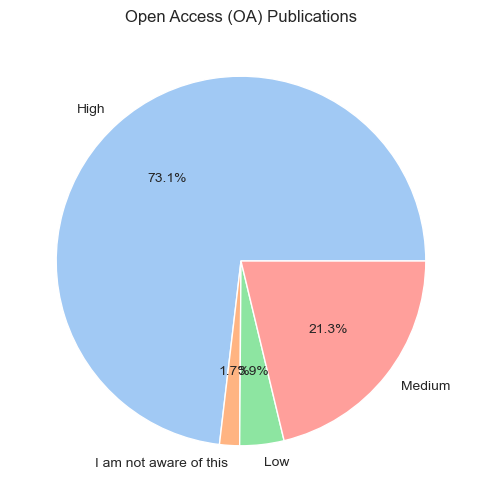

In [540]:
# Group the data by the column
grouped_data = df.groupby('Q14.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q14.1'], autopct='%1.1f%%')

# Add a title
plt.title('Open Access (OA) Publications')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/OA.png', bbox_inches='tight', dpi = 300, transparent=True)

In [541]:
#Display how many particpants haven't given an answer
count = df["Q14.1"].isna().sum()
print(count, "participants have not answered.")

1480 participants have not answered.


### Q14.2 I do this type of activity in my field of research:

In [542]:
print(df['Q14.2_1'].dtype)

object


In [543]:
df['Q14.2_1'] = pd.to_numeric(df['Q14.2_1'], errors='coerce').astype('Int64')

In [544]:
#Count all answers and list them
likert_data = df['Q14.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0     63
1     37
2     41
3    108
4    131
5    192
6    513
Name: Q14.2_1, dtype: Int64


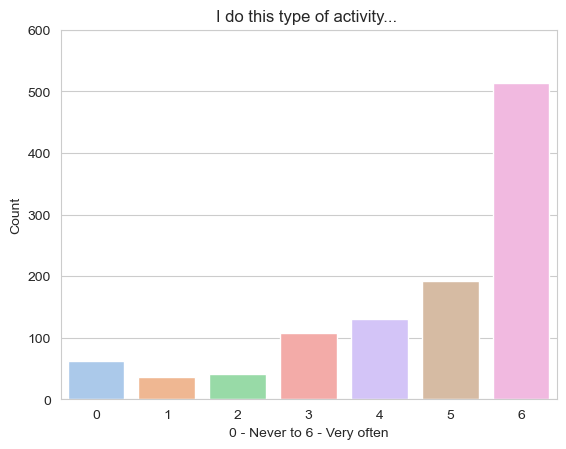

In [545]:
likert_data = df['Q14.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 600)
plt.show()
#plt.savefig('../data/plots_test/OA_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [546]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.612903225806452
Median: 5.0
Mode: 6
Standard Deviation: 1.783850099097587
Interquartile Range: 2


In [547]:
#Display how many particpants haven't given an answer
count = df["Q14.2_1"].isna().sum()
print(count, "participants have not answered.")

1482 participants have not answered.


### Q14.3 For me, training in this topic is:

In [548]:
print(df['Q14.3_1'].dtype)

object


In [549]:
df['Q14.3_1'] = pd.to_numeric(df['Q14.3_1'], errors='coerce').astype('Int64')

In [550]:
#Count all answers and list them
likert_data = df['Q14.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    134
1     97
2    102
3    181
4    161
5    126
6    275
Name: Q14.3_1, dtype: Int64


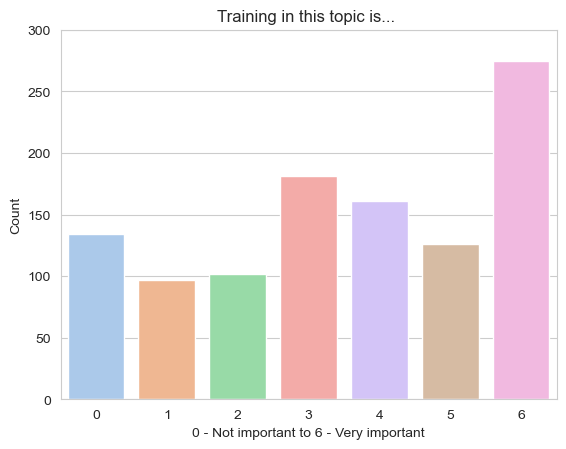

In [551]:
likert_data = df['Q14.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/OA_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [552]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.5018587360594795
Median: 4.0
Mode: 6
Standard Deviation: 2.0607057455622764
Interquartile Range: 4


In [553]:
#Display how many particpants haven't given an answer
count = df["Q14.3_1"].isna().sum()
print(count, "participants have not answered.")

1491 participants have not answered.


### Q14.4 I have looked for training and support in this topic at my institution:

In [554]:
#Count all answers and list them descending
'N=' + (df['Q14.4'].value_counts(sort=True)).astype(str)

No                    N=679
Yes                   N=378
Yes, but not found     N=29
Name: Q14.4, dtype: object

In [555]:
#Display how many particpants haven't given an answer
count = df["Q14.4"].isna().sum()
print(count, "participants have not answered.")

1481 participants have not answered.


### Q14.5 (if Q14.4 was yes) Training at my institution is:

In [556]:
#Show type of df column
print(df['Q14.5_1'].dtype)

object


In [557]:
df['Q14.5_1'] = pd.to_numeric(df['Q14.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q14.5_1']

In [558]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.176943699731903
Median: 4.0
Mode: 6
Standard Deviation: 1.5065463921725064
Interquartile Range: 3


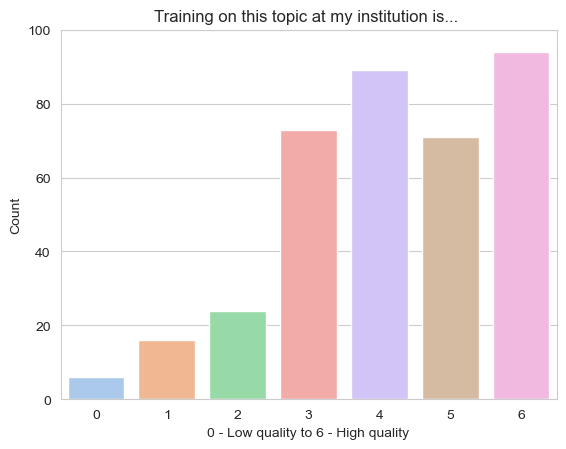

In [559]:
likert_data = df['Q14.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 100)
plt.show()
#plt.savefig('../data/plots_test/OA_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [560]:
#Display how many particpants haven't given an answer
count = df["Q14.5_1"].isna().sum()
print(count, "participants have not answered.")

2194 participants have not answered.


### Q14.6 Training in this topic at my institution:

In [561]:
#Count all answers and list them descending
'N=' + (df['Q14.6'].value_counts(sort=True)).astype(str)

At the right level                        N=141
Infrequent                                 N=65
Frequent,At the right level                N=65
Frequent                                   N=41
Infrequent,At the right level              N=30
At too basic a level                       N=11
Infrequent,At too basic a level            N=10
Infrequent,At too complex a level           N=6
At too complex a level                      N=6
Frequent,At too basic a level               N=1
Frequent,At too complex a level             N=1
Frequent,Infrequent,At the right level      N=1
Name: Q14.6, dtype: object

In [562]:
#Normalise the count to represent answers in percent
(df['Q14.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                         37.3%
Infrequent                                 17.2%
Frequent,At the right level                17.2%
Frequent                                  10.85%
Infrequent,At the right level              7.94%
At too basic a level                       2.91%
Infrequent,At too basic a level            2.65%
Infrequent,At too complex a level          1.59%
At too complex a level                     1.59%
Frequent,At too basic a level              0.26%
Frequent,At too complex a level            0.26%
Frequent,Infrequent,At the right level     0.26%
Name: Q14.6, dtype: object

In [563]:
#Display how many particpants haven't given an answer
count = df["Q14.6"].isna().sum()
print(count, "participants have not answered.")

2189 participants have not answered.


### Q14.7 The help at my institution on this topic is mainly:

In [564]:
#Count all answers and list them descending
'N=' + (df['Q14.7'].value_counts(sort=True)).astype(str)

Good                                                        N=129
Available                                                    N=47
Good,At the right level,Available                            N=37
At the right level                                           N=35
Good,Available                                               N=25
I do not know                                                N=17
Hard to access                                               N=17
At the right level,Available                                 N=13
Good,At the right level                                      N=12
Too basic                                                     N=8
Other. Please explain:                                        N=6
Non-existent                                                  N=5
Hard to access,Other. Please explain:                         N=4
Available,Hard to access                                      N=3
Good,At the right level,Available,Other. Please explain:      N=3
Good,Avail

In [565]:
#Normalise the count to represent answers in percent
(df['Q14.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        34.13%
Available                                                   12.43%
Good,At the right level,Available                            9.79%
At the right level                                           9.26%
Good,Available                                               6.61%
I do not know                                                 4.5%
Hard to access                                                4.5%
At the right level,Available                                 3.44%
Good,At the right level                                      3.17%
Too basic                                                    2.12%
Other. Please explain:                                       1.59%
Non-existent                                                 1.32%
Hard to access,Other. Please explain:                        1.06%
Available,Hard to access                                     0.79%
Good,At the right level,Available,Other. Please explain:     0

In [566]:
#Display how many particpants haven't given an answer
count = df["Q14.7"].isna().sum()
print(count, "participants have not answered.")

2189 participants have not answered.


### Q14.7_TEXT

In [567]:
#Count all answers and list them descending
df['Q14.7_8_TEXT'].value_counts(sort=True)

Financial assistance for fees may not be sufficient to facilitate this                                                                                                                                                                                                                            1
Complicated                                                                                                                                                                                                                                                                                       1
slow and confusing                                                                                                                                                                                                                                                                                1
Too complex                                                                                                                 

### Q14.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [568]:
#Count all answers and list them descending
df['Q14.8'].value_counts(sort=True)

No     991
Yes     93
Name: Q14.8, dtype: int64

### Q14.9 Where have you looked for training and support?

In [569]:
#Count all answers and list them descending
df['Q14.9'].value_counts(sort=True)

Online                                                     6
online                                                     5
Other HE institutions                                      2
Internet                                                   2
Trying to figure out REF 2027 approach to monographs...    1
                                                          ..
Publishers                                                 1
prior institution                                          1
google, twitter                                            1
At the university where I work full-time                   1
Previous institutions                                      1
Name: Q14.9, Length: 79, dtype: int64

### Q14.10 My institution takes mainly the following approach to this topic:

In [570]:
#Count all answers and list them descending
'N=' + (df['Q14.10'].value_counts(sort=True)).astype(str)

Monitoring and compliance    N=436
I do not know                N=360
Recognition and reward       N=157
Passive                      N=132
Name: Q14.10, dtype: object

In [571]:
#Normalise the count to represent answers in percent
(df['Q14.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Monitoring and compliance    40.18%
I do not know                33.18%
Recognition and reward       14.47%
Passive                      12.17%
Name: Q14.10, dtype: object

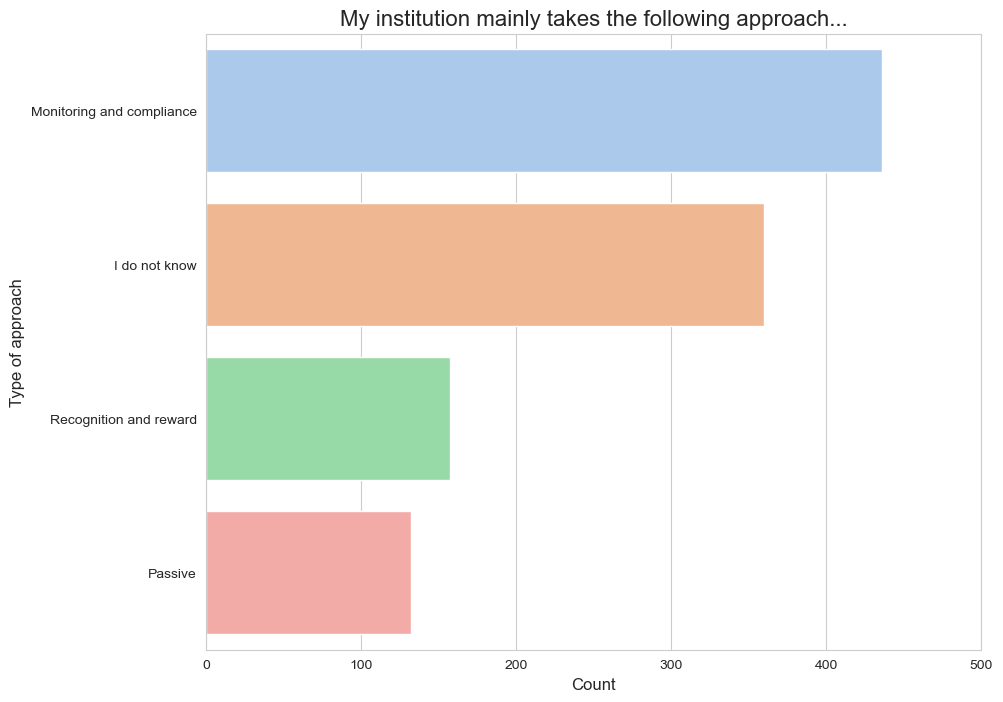

In [572]:
grouped_data = df.groupby('Q14.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q14.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
plt.xlim(0, 500)
plt.show()
#plt.savefig('../data/plots_test/OA_approach.png', bbox_inches='tight', dpi = 300)

In [573]:
#Display how many particpants haven't given an answer
count = df["Q14.10"].isna().sum()
print(count, "participants have not answered.")

1482 participants have not answered.


### Q14.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [574]:
#Count all answers and list them descending
'N=' + (df['Q14.11'].value_counts(sort=True)).astype(str)

I do not know    N=445
Ok               N=363
Very well        N=203
Not very well     N=73
Name: Q14.11, dtype: object

In [575]:
#Display how many particpants haven't given an answer
count = df["Q14.11"].isna().sum()
print(count, "participants have not answered.")

1483 participants have not answered.


### Q14.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [576]:
#Count all answers and list them descending
df['Q14.12'].value_counts(sort=True)

-                                                                                                                                          56
None                                                                                                                                       39
none                                                                                                                                       34
na                                                                                                                                         29
No                                                                                                                                         29
                                                                                                                                           ..
There are finance issues here although currently this is not a problem.                                                                     1
Funder

### Q14.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [577]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q14.13'].value_counts(sort=True)

-                                                                                                                                                                                                                                                                                                                                                                                                                                                                   55
None                                                                                                                                                                                                                                                                                                                                                                                                                                                                49
No                                                                                        

## Q15: On the following scale, how likely are you to recommend the adoption of open and transparent research practices to colleagues? - Would not recommend (0) - Would highly recommend (6)

In [578]:
#Show type of df column
print(df['Q15_1'].dtype)

object


In [579]:
df['Q15_1'] = pd.to_numeric(df['Q15_1'], errors='coerce').astype('Int64')

likert_data = df['Q15_1']

In [580]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.976894639556377
Median: 6.0
Mode: 6
Standard Deviation: 1.4280208793333966
Interquartile Range: 2


In [581]:
#Display how many particpants haven't given an answer
count = df["Q15_1"].isna().sum()
print(count, "participants have not answered.")

1485 participants have not answered.


## Q16: Having considered barriers above, which do you perceive to be as the greatest barrier to the uptake of open research practices in your field?

In [582]:
#Count all answers and list them descending
'N=' + (df['Q16'].value_counts(sort=True)).astype(str)

Lack of dedicated funding                                                                                               N=205
Lack of positive incentives                                                                                             N=166
Lack of time                                                                                                            N=165
Lack of information or training                                                                                         N=103
Other. Please explain:                                                                                                  N=101
Lack of mandates from funders, institutions or regulators                                                                N=91
The level of adoption of open research practices in my field is already sufficient                                       N=77
Lack of supporting infrastructure (e.g., sufficient storage for open data / publishing platform for open monographs)  

In [583]:
#Normalise the count to represent answers in percent
(df['Q16'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Lack of dedicated funding                                                                                               18.96%
Lack of positive incentives                                                                                             15.36%
Lack of time                                                                                                            15.26%
Lack of information or training                                                                                          9.53%
Other. Please explain:                                                                                                   9.34%
Lack of mandates from funders, institutions or regulators                                                                8.42%
The level of adoption of open research practices in my field is already sufficient                                       7.12%
Lack of supporting infrastructure (e.g., sufficient storage for open data / publishing platform for open monogr

In [584]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q16_11_TEXT'].value_counts(sort=True)

Lack of support from journals                                                                                                                                                                                                                                                                                                                      1
Lack of meaningful buy in. I couldn't select other options here but I would also say lack of time and incentives are relevant here                                                                                                                                                                                                                 1
Private ownership of data                                                                                                                                                                                                                                                                                                     

In [585]:
#Display how many particpants haven't given an answer
count = df["Q16"].isna().sum()
print(count, "participants have not answered.")

1486 participants have not answered.
